In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

goodapps = pd.read_csv(r"/Users/shravanamee/Desktop/Free-Trial-Conversion-New/infusionsoft-free-trial/src/data/goodapps.csv")
usagedata = pd.read_csv(r"/Users/shravanamee/Desktop/Free-Trial-Conversion-New/infusionsoft-free-trial/src/data/usagedataimpnumunique.csv")

In [79]:
goodapps.head()

Unnamed: 0 app_name          account_id opportunity_id  \
0       31178  6755074  001f100001QbUdWAAV            NaN   
1       26390  6778579  001f100001Q1XbpAAF            NaN   
2       27981  6778580  001f100001Q1XkxAAF            NaN   
3       28662  6778582  001f100001Q1XojAAF            NaN   
4       31176  6778977  001f100001Q1XwdAAF            NaN   

  opportunity_stage_name opportunity_owner_name opportunity_demo_date  \
0                    NaN                    NaN                   NaN   
1                    NaN                    NaN                   NaN   
2                    NaN                    NaN                   NaN   
3                    NaN                    NaN                   NaN   
4                    NaN                    NaN                   NaN   

   is_free_trial_initiated           trial_date          contact_id  \
0                     True  2018-06-15 07:02:15  003f10000247yBeAAI   
1                     True  2018-06-19 02:43:13  003f1000023w09UAAQ   
2                     True  2018-06-19 02:57:54  003f1000023w0IMAAY   
3                     True  2018-06-19 03:04:28  003f1000023w0M4AAI   
4                     True  2018-06-19 03:43:08  003f1000023w0TWAAY   

          ...          first_contact_on last_contact_on  \
0         ...                       NaN             NaN   
1         ...                       NaN             NaN   
2         ...                       NaN             NaN   
3         ...                       NaN             NaN   
4         ...                       NaN             NaN   

  in_trial_first_campaign_published_on in_trial_last_campaign_published_on  \
0                                  NaN                                 NaN   
1                                  NaN                                 NaN   
2                                  NaN                                 NaN   
3                                  NaN                                 NaN   
4                                  NaN                                 NaN   

   in_trial_count_of_published_campaigns  in_trial_first_campaign_launched_on  \
0                                    NaN                                  NaN   
1                                    NaN                                  NaN   
2                                    NaN                                  NaN   
3                                    NaN                                  NaN   
4                                    NaN                                  NaN   

   in_trial_last_campaign_launched_on  in_trial_count_of_launched_campaigns  \
0                                 NaN                                   NaN   
1                                 NaN                                   NaN   
2                                 NaN                                   NaN   
3                                 NaN                                   NaN   
4                                 NaN                                   NaN   

  Target       trial_end_date  
0      0  2018-06-28 07:02:15  
1      0  2018-07-02 02:43:13  
2      0  2018-07-02 02:57:54  
3      0  2018-07-02 03:04:28  
4      0  2018-07-02 03:43:08  

[5 rows x 49 columns]

In [80]:
goodapps.describe()

Unnamed: 0  count_of_active_users_in_last_6_months  \
count  23742.000000                            22121.000000   
mean   14647.945708                                0.057909   
std     8973.373829                                0.283738   
min        0.000000                                0.000000   
25%     7039.250000                                0.000000   
50%    14049.500000                                0.000000   
75%    21146.750000                                0.000000   
max    31369.000000                               11.000000   

       initial_mrr_post_promo  current_mrr  initial_mrr  \
count              286.000000   286.000000   286.000000   
mean               142.521224   113.805280   123.148252   
std                 89.350461   145.639628    91.972403   
min                  0.000000     0.000000     0.000000   
25%                 99.000000     0.000000    99.000000   
50%                 99.000000    99.000000    99.000000   
75%                162.742500   149.000000   129.000000   
max                599.000000  1215.000000   599.000000   

       in_trial_total_emails_sent  in_trial_count_of_logins  \
count                  137.000000              19299.000000   
mean                   163.978102                  2.990725   
std                    605.880187                 40.927994   
min                      1.000000                  0.000000   
25%                      2.000000                  1.000000   
50%                      5.000000                  1.000000   
75%                     19.000000                  2.000000   
max                   4950.000000               4660.000000   

       in_trial_count_of_contacts_added  \
count                      21434.000000   
mean                         126.087385   
std                         3988.366614   
min                            0.000000   
25%                            2.000000   
50%                            3.000000   
75%                            5.000000   
max                       500001.000000   

       in_trial_count_of_published_campaigns  \
count                            1134.000000   
mean                                1.589947   
std                                 4.789877   
min                                 0.000000   
25%                                 1.000000   
50%                                 1.000000   
75%                                 1.000000   
max                               144.000000   

       in_trial_count_of_launched_campaigns        Target  
count                           1134.000000  23742.000000  
mean                               0.016755      0.011625  
std                                0.147595      0.107193  
min                                0.000000      0.000000  
25%                                0.000000      0.000000  
50%                                0.000000      0.000000  
75%                                0.000000      0.000000  
max                                3.000000      1.000000

In [3]:
usagedata.head()

Unnamed: 0  appname  free_email  CONTACTS_ADDED_AUTO  CONTACTS_ADDED_OTHER  \
0           0  6755074        True                  0.0                   0.0   
1           1  6778579       False                  0.0                   0.0   
2           2  6778580        True                  0.0                   0.0   
3           3  6778582        True                  0.0                   0.0   
4           4  6778977       False                  0.0                   0.0   

   CONTACTS_UPDATED  CONTACT_GROUP_COUNT  FLOW_RECIPIENT_COUNT  \
0               0.0                  0.0                   0.0   
1               0.0                  0.0                   0.0   
2               0.0                  0.0                   0.0   
3               0.0                  0.0                   0.0   
4               0.0                  0.0                   0.0   

   GOAL_ACHIEVED_COUNT  LOGIN_COUNT         ...           invoice_created  \
0                  0.0          0.0         ...                       0.0   
1                  0.0          0.0         ...                       0.0   
2                  0.0          0.0         ...                       0.0   
3                  0.0          0.0         ...                       0.0   
4                  0.0          0.0         ...                       0.0   

   invoices_paid  lead_sources  merchant_account_created  \
0            0.0           0.0                       0.0   
1            0.0           0.0                       0.0   
2            0.0           0.0                       0.0   
3            0.0           0.0                       0.0   
4            0.0           0.0                       0.0   

   merchant_infu_created  num_integrations  num_invoice_promos  \
0                    0.0               0.0                 0.0   
1                    0.0               0.0                 0.0   
2                    0.0               0.0                 0.0   
3                    0.0               0.0                 0.0   
4                    0.0               0.0                 0.0   

   number_of_notes_created  number_of_tasks_created  total_processed_usd  
0                      0.0                      0.0                  0.0  
1                      0.0                      0.0                  0.0  
2                      0.0                      0.0                  0.0  
3                      0.0                      0.0                  0.0  
4                      0.0                      0.0                  0.0  

[5 rows x 63 columns]

In [4]:
goodapps['app_name'].nunique()

23681

In [5]:
usagedata['appname'].nunique()

23505

In [6]:
mergedata = pd.merge(usagedata,goodapps,how='left',left_on='appname',right_on='app_name')

In [7]:
mergedata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23505 entries, 0 to 23504
Columns: 112 entries, Unnamed: 0_x to trial_end_date
dtypes: bool(2), float64(69), int64(3), object(38)
memory usage: 20.0+ MB


In [8]:
mergedata.head()

Unnamed: 0_x  appname  free_email  CONTACTS_ADDED_AUTO  \
0             0  6755074        True                  0.0   
1             1  6778579       False                  0.0   
2             2  6778580        True                  0.0   
3             3  6778582        True                  0.0   
4             4  6778977       False                  0.0   

   CONTACTS_ADDED_OTHER  CONTACTS_UPDATED  CONTACT_GROUP_COUNT  \
0                   0.0               0.0                  0.0   
1                   0.0               0.0                  0.0   
2                   0.0               0.0                  0.0   
3                   0.0               0.0                  0.0   
4                   0.0               0.0                  0.0   

   FLOW_RECIPIENT_COUNT  GOAL_ACHIEVED_COUNT  LOGIN_COUNT  \
0                   0.0                  0.0          0.0   
1                   0.0                  0.0          0.0   
2                   0.0                  0.0          0.0   
3                   0.0                  0.0          0.0   
4                   0.0                  0.0          0.0   

          ...           first_contact_on  last_contact_on  \
0         ...                        NaN              NaN   
1         ...                        NaN              NaN   
2         ...                        NaN              NaN   
3         ...                        NaN              NaN   
4         ...                        NaN              NaN   

   in_trial_first_campaign_published_on  in_trial_last_campaign_published_on  \
0                                   NaN                                  NaN   
1                                   NaN                                  NaN   
2                                   NaN                                  NaN   
3                                   NaN                                  NaN   
4                                   NaN                                  NaN   

   in_trial_count_of_published_campaigns  in_trial_first_campaign_launched_on  \
0                                    NaN                                  NaN   
1                                    NaN                                  NaN   
2                                    NaN                                  NaN   
3                                    NaN                                  NaN   
4                                    NaN                                  NaN   

   in_trial_last_campaign_launched_on  in_trial_count_of_launched_campaigns  \
0                                 NaN                                   NaN   
1                                 NaN                                   NaN   
2                                 NaN                                   NaN   
3                                 NaN                                   NaN   
4                                 NaN                                   NaN   

   Target       trial_end_date  
0       0  2018-06-28 07:02:15  
1       0  2018-07-02 02:43:13  
2       0  2018-07-02 02:57:54  
3       0  2018-07-02 03:04:28  
4       0  2018-07-02 03:43:08  

[5 rows x 112 columns]

In [9]:
mergedata.drop(['Unnamed: 0_x'],axis=1,inplace=True)

In [10]:
dtypes = pd.DataFrame(mergedata.dtypes.rename('type')).reset_index().astype('str')

numeric = dtypes[(dtypes.type.isin(['int64', 'float64']))]['index'].values
categorical = dtypes[~(dtypes['index'].isin(numeric))]['index'].values

print(len(numeric),len(categorical))

71 40


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]), <a list of 20 Text xticklabel objects>)

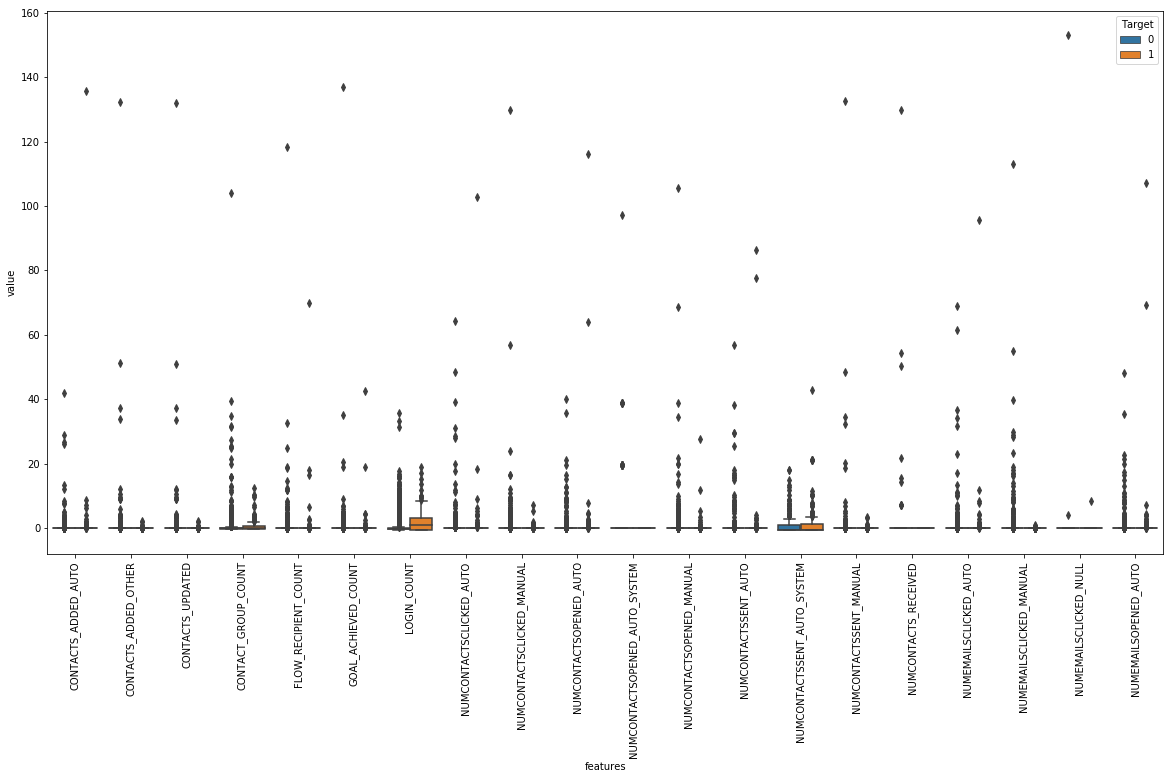

In [53]:
# first twenty features
data_dia = mergedata['Target']
data = mergedata[numeric]
data_n_2 = (data - data.mean()) / (data.std()) 
data = pd.concat([data_dia,data_n_2.iloc[:,0:20]],axis=1)
data = pd.melt(data,id_vars="Target",
                    var_name="features",
                    value_name='value')
plt.figure(figsize=(20,10))
sns.boxplot(x="features", y="value", hue="Target", data=data)
plt.xticks(rotation=90)

In [54]:
mergedata.describe()

CONTACTS_ADDED_AUTO  CONTACTS_ADDED_OTHER  CONTACTS_UPDATED  \
count         23505.000000          23505.000000      23505.000000   
mean              0.098939              8.048849          8.303496   
std               2.610921            290.378479        291.036849   
min               0.000000              0.000000          0.000000   
25%               0.000000              0.071429          0.142857   
50%               0.000000              0.071429          0.214286   
75%               0.000000              0.285714          0.357143   
max             354.166667          38461.538462      38461.615385   

       CONTACT_GROUP_COUNT  FLOW_RECIPIENT_COUNT  GOAL_ACHIEVED_COUNT  \
count         23505.000000          23505.000000         23505.000000   
mean              0.290132              0.219281             0.145402   
std               1.132640              8.751491             7.568599   
min               0.000000              0.000000             0.000000   
25%               0.071429              0.000000             0.000000   
50%               0.230769              0.000000             0.000000   
75%               0.357143              0.000000             0.000000   
max             118.285714           1036.357143          1036.642857   

        LOGIN_COUNT  NUMCONTACTSCLICKED_AUTO  NUMCONTACTSCLICKED_MANUAL  \
count  23505.000000              23505.00000               23505.000000   
mean       0.148390                  0.00722                   0.078817   
std        0.284357                  0.23807                   1.494787   
min        0.000000                  0.00000                   0.000000   
25%        0.071429                  0.00000                   0.000000   
50%        0.071429                  0.00000                   0.000000   
75%        0.142857                  0.00000                   0.000000   
max       10.285714                 24.50000                 194.142857   

       NUMCONTACTSOPENED_AUTO      ...       \
count            23505.000000      ...        
mean                 0.026665      ...        
std                  0.952043      ...        
min                  0.000000      ...        
25%                  0.000000      ...        
50%                  0.000000      ...        
75%                  0.000000      ...        
max                110.571429      ...        

       count_of_active_users_in_last_6_months  initial_mrr_post_promo  \
count                            21965.000000              278.000000   
mean                                 0.057774              141.543417   
std                                  0.283371               87.740317   
min                                  0.000000                0.000000   
25%                                  0.000000               99.000000   
50%                                  0.000000               99.000000   
75%                                  0.000000              162.742500   
max                                 11.000000              599.000000   

       current_mrr  initial_mrr  in_trial_total_emails_sent  \
count   278.000000   278.000000                  133.000000   
mean    112.245719   121.612950                  164.000000   
std     143.110370    90.206672                  614.400693   
min       0.000000     0.000000                    1.000000   
25%       0.000000    99.000000                    2.000000   
50%      99.000000    99.000000                    5.000000   
75%     149.000000   129.000000                   18.000000   
max    1215.000000   599.000000                 4950.000000   

       in_trial_count_of_logins  in_trial_count_of_contacts_added  \
count              19167.000000                      21288.000000   
mean                   2.969844                        126.768461   
std                   41.058795                       4002.007478   
min                    0.000000                          0.000000   
25%                    1.000000                

In [13]:
mergedata[mergedata['CONTACTS_ADDED_OTHER']>700]

appname  free_email  CONTACTS_ADDED_AUTO  CONTACTS_ADDED_OTHER  \
3270    do583       False             0.285714           3089.357143   
4871    fj473        True             0.000000            976.714286   
5703    gg606       False             0.000000          14868.285714   
5901    gm561        True             0.071429           2578.785714   
6662    hi454        True             0.000000          10847.071429   
6721    hj586       False             0.000000           1201.214286   
6839    hn461       False             0.000000           9809.928571   
6851    hn536       False             0.000000           1196.000000   
6918    hp490        True             0.000000           1014.142857   
9541    kl547       False             0.000000           1288.857143   
9647    ko522       False             0.000000           2609.071429   
10995   lz560        True             0.000000           2615.500000   
11583   mr439        True             0.000000          38461.538462   
12122   ng428        True             0.142857           2820.714286   
13286   oo566        True             0.000000            720.357143   
19279   vf540        True             0.000000           3555.928571   
19571   vo560       False             0.357143           1035.785714   
21136   xi466       False             0.000000            763.428571   
22532   yy411       False             0.000000            891.857143   
23114   zo537       False             0.214286           1751.857143   

       CONTACTS_UPDATED  CONTACT_GROUP_COUNT  FLOW_RECIPIENT_COUNT  \
3270        3089.714286             0.928571            103.642857   
4871         977.285714             0.642857              0.000000   
5703       14869.000000             1.071429              0.000000   
5901        2579.000000             0.142857              0.000000   
6662       10847.142857             0.285714              0.000000   
6721        1201.285714             0.428571              0.000000   
6839        9810.000000             0.214286              0.000000   
6851        1196.071429             0.714286              0.000000   
6918        1014.214286             0.214286              0.000000   
9541        1288.928571             0.285714              0.000000   
9647        2609.214286             0.642857              0.000000   
10995       2615.642857             0.357143              0.000000   
11583      38461.615385             0.076923              0.000000   
12122       2821.142857             0.214286              0.285714   
13286        720.428571             0.357143              0.000000   
19279       3556.214286             0.500000              0.000000   
19571       1036.285714             1.214286           1036.357143   
21136        763.500000             0.142857              0.000000   
22532        892.000000             0.142857              0.000000   
23114       3478.000000             1.285714              0.000000   

       GOAL_ACHIEVED_COUNT  LOGIN_COUNT  NUMCONTACTSCLICKED_AUTO  \
3270             51.857143     2.428571                 0.071429   
4871              0.000000     1.928571                 0.000000   
5703              0.000000     3.500000                 0.000000   
5901              0.000000     0.214286                 0.000000   
6662              0.000000     0.714286                 0.000000   
6721              0.000000     0.500000                 0.000000   
6839              0.000000     0.357143                 0.000000   
6851              0.000000     0.785714                 0.000000   
6918              0.000000     3.071429                 0.000000   
9541              0.000000     0.142857                 0.000000   
9647              0.000000     0.785714                 0.000000   
10995             0.000000     0.214286                 0.000000   
11583             0.000000     0.153846                 0.000000   
12122             0.071429     1.214286                 0.000000   
13

In [14]:
#mergedata2=mergedata[~(mergedata['CONTACTS_ADDED_OTHER']>700)]

In [15]:
#mergedata2.describe()

CONTACTS_ADDED_AUTO  CONTACTS_ADDED_OTHER  CONTACTS_UPDATED  \
count         23485.000000          23485.000000      23485.000000   
mean              0.098978              3.708401          3.889588   
std               2.612030             15.715779         15.705514   
min               0.000000              0.000000          0.000000   
25%               0.000000              0.071429          0.142857   
50%               0.000000              0.071429          0.214286   
75%               0.000000              0.285714          0.357143   
max             354.166667            663.142857        663.285714   

       CONTACT_GROUP_COUNT  FLOW_RECIPIENT_COUNT  GOAL_ACHIEVED_COUNT  \
count         23485.000000          23485.000000         23485.000000   
mean              0.289959              0.170914             0.099174   
std               1.133057              5.520916             3.386630   
min               0.000000              0.000000             0.000000   
25%               0.071429              0.000000             0.000000   
50%               0.230769              0.000000             0.000000   
75%               0.357143              0.000000             0.000000   
max             118.285714            612.785714           321.142857   

        LOGIN_COUNT  NUMCONTACTSCLICKED_AUTO  NUMCONTACTSCLICKED_MANUAL  \
count  23485.000000             23485.000000               23485.000000   
mean       0.147451                 0.007223                   0.063531   
std        0.279957                 0.238171                   0.527944   
min        0.000000                 0.000000                   0.000000   
25%        0.071429                 0.000000                   0.000000   
50%        0.071429                 0.000000                   0.000000   
75%        0.142857                 0.000000                   0.000000   
max       10.285714                24.500000                  35.571429   

       NUMCONTACTSOPENED_AUTO      ...       \
count            23485.000000      ...        
mean                 0.026673      ...        
std                  0.952446      ...        
min                  0.000000      ...        
25%                  0.000000      ...        
50%                  0.000000      ...        
75%                  0.000000      ...        
max                110.571429      ...        

       count_of_active_users_in_last_6_months  initial_mrr_post_promo  \
count                            21945.000000              278.000000   
mean                                 0.057371              141.543417   
std                                  0.282621               87.740317   
min                                  0.000000                0.000000   
25%                                  0.000000               99.000000   
50%                                  0.000000               99.000000   
75%                                  0.000000              162.742500   
max                                 11.000000              599.000000   

       current_mrr  initial_mrr  in_trial_total_emails_sent  \
count   278.000000   278.000000                  133.000000   
mean    112.245719   121.612950                  164.000000   
std     143.110370    90.206672                  614.400693   
min       0.000000     0.000000                    1.000000   
25%       0.000000    99.000000                    2.000000   
50%      99.000000    99.000000                    5.000000   
75%     149.000000   129.000000                   18.000000   
max    1215.000000   599.000000                 4950.000000   

       in_trial_count_of_logins  in_trial_count_of_contacts_added  \
count              19147.000000                      21268.000000   
mean                   2.953465                         62.227149   
std                   41.070712                        410.794106   
min                    0.000000                          0.000000   
25%                    1.000000                

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]), <a list of 20 Text xticklabel objects>)

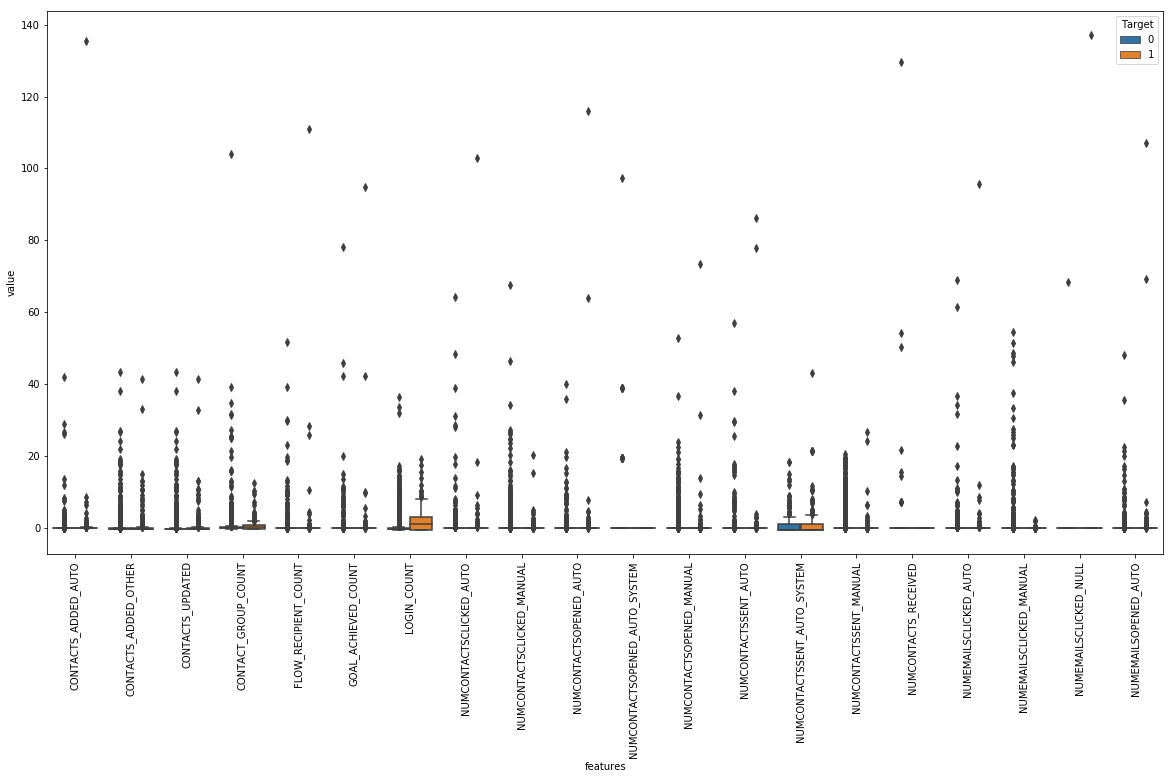

In [55]:
# first twenty features
# data_dia = mergedata2['Target']
# data = mergedata2[numeric]
# data_n_2 = (data - data.mean()) / (data.std()) 
# data = pd.concat([data_dia,data_n_2.iloc[:,0:20]],axis=1)
# data = pd.melt(data,id_vars="Target",
#                     var_name="features",
#                     value_name='value')
# plt.figure(figsize=(20,10))
# sns.boxplot(x="features", y="value", hue="Target", data=data)
# plt.xticks(rotation=90)

In [17]:
#mergedata2[mergedata2['NUMEMAILSCLICKED_MANUAL']>500]

appname  free_email  CONTACTS_ADDED_AUTO  CONTACTS_ADDED_OTHER  \
3620    dy479        True             0.000000              0.461538   
6335    gy480       False             0.000000              0.538462   
6337    gy482       False             0.000000              0.461538   
14506   px480       False             0.000000              0.384615   
17048   sr625       False             0.000000              0.071429   
17531   tg477       False             0.076923              0.538462   
22729   zd474        True             0.000000              0.285714   

       CONTACTS_UPDATED  CONTACT_GROUP_COUNT  FLOW_RECIPIENT_COUNT  \
3620           0.923077             0.076923                   0.0   
6335           0.307692             0.076923                   0.0   
6337           0.384615             0.076923                   0.0   
14506          0.384615             0.076923                   0.0   
17048          0.142857             0.357143                   0.0   
17531          0.769231             0.076923                   0.0   
22729          0.428571             0.285714                   0.0   

       GOAL_ACHIEVED_COUNT  LOGIN_COUNT  NUMCONTACTSCLICKED_AUTO  \
3620                   0.0     2.538462                      0.0   
6335                   0.0     0.076923                      0.0   
6337                   0.0     0.615385                      0.0   
14506                  0.0     0.307692                      0.0   
17048                  0.0     1.571429                      0.0   
17531                  0.0     0.846154                      0.0   
22729                  0.0     0.357143                      0.0   

              ...                  first_contact_on          last_contact_on  \
3620          ...           2018-06-02 11:16:24 UTC  2018-06-02 11:16:50 UTC   
6335          ...           2018-06-06 11:04:35 UTC  2018-06-06 11:05:10 UTC   
6337          ...           2018-06-08 11:04:52 UTC  2018-06-08 11:05:20 UTC   
14506         ...           2018-06-05 10:32:53 UTC  2018-06-05 10:33:29 UTC   
17048         ...           2018-11-28 17:26:05 UTC  2018-11-28 17:26:05 UTC   
17531         ...           2018-05-31 11:46:35 UTC  2018-06-10 12:12:17 UTC   
22729         ...           2018-05-26 22:00:12 UTC  2018-05-26 22:00:39 UTC   

       in_trial_first_campaign_published_on  \
3620                                    NaN   
6335                                    NaN   
6337                                    NaN   
14506                                   NaN   
17048                                   NaN   
17531                                   NaN   
22729                                   NaN   

       in_trial_last_campaign_published_on  \
3620                                   NaN   
6335                                   NaN   
6337                                   NaN   
14506                                  NaN   
17048                                  NaN   
17531                                  NaN   
22729                                  NaN   

       in_trial_count_of_published_campaigns  \
3620                                     NaN   
6335                                     NaN   
6337                                     NaN   
14506                                    NaN   
17048                                    NaN   
17531                                    NaN   
22729                                    NaN   

       in_trial_first_campaign_launched_on  \
3620                                   NaN   
6335                                   NaN   
6337                                   NaN   
14506                                  NaN   
17048                                  NaN   
17531                                  NaN   
22729                                  NaN   

       in_trial_last_campaign_launched_on  \
3620                                  NaN   
6335                                  NaN   
6337                                  NaN   
14

In [18]:
#mergedata2=mergedata2[~(mergedata2['NUMEMAILSCLICKED_MANUAL']>500)]

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]), <a list of 20 Text xticklabel objects>)

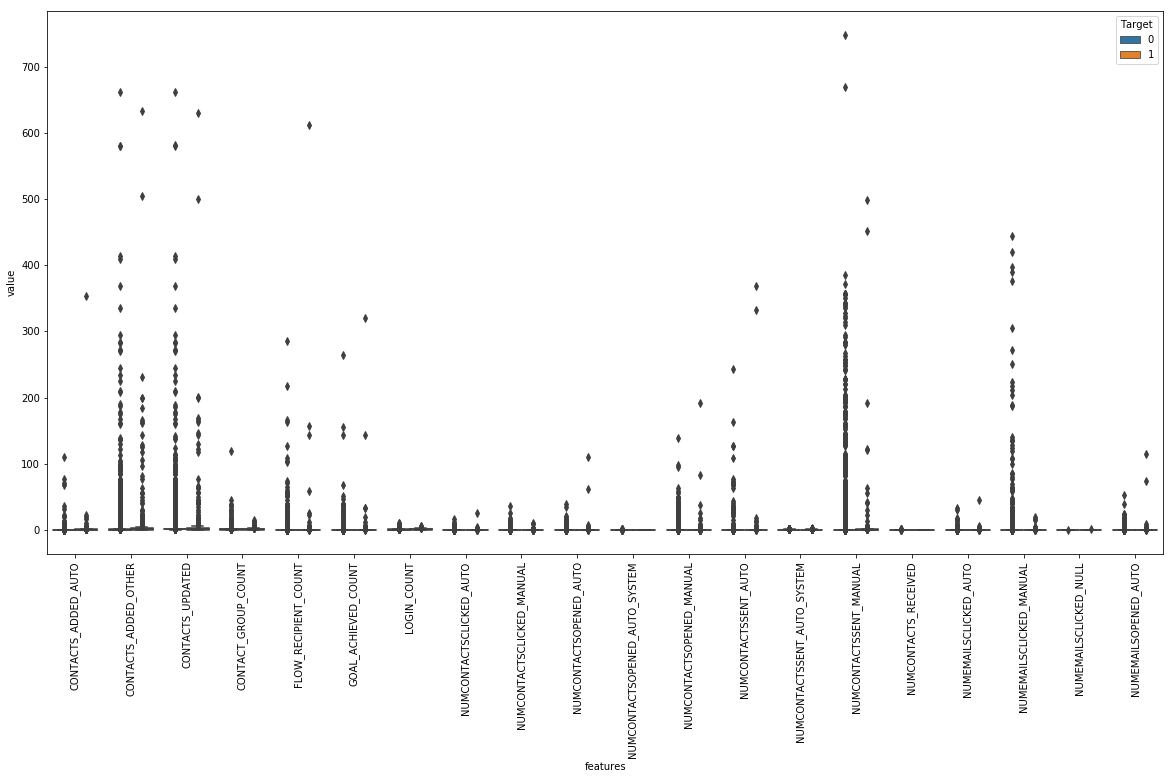

In [19]:
# first twenty features
# data_dia = mergedata2['Target']
# data = mergedata2[numeric]
# #data_n_2 = (data - data.mean()) / (data.std()) 
# data = pd.concat([data_dia,data.iloc[:,0:20]],axis=1)
# data = pd.melt(data,id_vars="Target",
#                     var_name="features",
#                     value_name='value')
# plt.figure(figsize=(20,10))
# sns.boxplot(x="features", y="value", hue="Target", data=data)
# plt.xticks(rotation=90)

In [20]:
#mergedata2[mergedata2['NUMCONTACTSSENT_MANUAL']>500]

appname  free_email  CONTACTS_ADDED_AUTO  CONTACTS_ADDED_OTHER  \
2602    cv635       False             0.000000            581.571429   
20339   wj635       False             0.071429            208.357143   

       CONTACTS_UPDATED  CONTACT_GROUP_COUNT  FLOW_RECIPIENT_COUNT  \
2602         581.642857             0.428571                   0.0   
20339        208.500000             3.642857                   0.0   

       GOAL_ACHIEVED_COUNT  LOGIN_COUNT  NUMCONTACTSCLICKED_AUTO  \
2602                   0.0     0.142857                      0.0   
20339                  0.0     0.500000                      0.0   

              ...                  first_contact_on          last_contact_on  \
2602          ...           2018-12-09 18:09:59 UTC  2018-12-09 18:15:28 UTC   
20339         ...           2018-12-09 23:30:20 UTC  2018-12-09 23:33:47 UTC   

       in_trial_first_campaign_published_on  \
2602                                    NaN   
20339                                   NaN   

       in_trial_last_campaign_published_on  \
2602                                   NaN   
20339                                  NaN   

       in_trial_count_of_published_campaigns  \
2602                                     NaN   
20339                                    NaN   

       in_trial_first_campaign_launched_on  \
2602                                   NaN   
20339                                  NaN   

       in_trial_last_campaign_launched_on  \
2602                                  NaN   
20339                                 NaN   

       in_trial_count_of_launched_campaigns  Target       trial_end_date  
2602                                    NaN       0  2018-12-22 21:54:26  
20339                                   NaN       0  2018-12-23 02:58:13  

[2 rows x 111 columns]

In [21]:
#mergedata2=mergedata2[~(mergedata2['NUMCONTACTSSENT_MANUAL']>500)]

In [22]:
#mergedata2.describe()

CONTACTS_ADDED_AUTO  CONTACTS_ADDED_OTHER  CONTACTS_UPDATED  \
count         23476.000000          23476.000000      23476.000000   
mean              0.099009              3.676057          3.857279   
std               2.612530             15.200897         15.190473   
min               0.000000              0.000000          0.000000   
25%               0.000000              0.071429          0.142857   
50%               0.000000              0.071429          0.214286   
75%               0.000000              0.285714          0.357143   
max             354.166667            663.142857        663.285714   

       CONTACT_GROUP_COUNT  FLOW_RECIPIENT_COUNT  GOAL_ACHIEVED_COUNT  \
count         23476.000000          23476.000000         23476.000000   
mean              0.289853              0.170980             0.099212   
std               1.133058              5.521973             3.387279   
min               0.000000              0.000000             0.000000   
25%               0.071429              0.000000             0.000000   
50%               0.230769              0.000000             0.000000   
75%               0.357143              0.000000             0.000000   
max             118.285714            612.785714           321.142857   

        LOGIN_COUNT  NUMCONTACTSCLICKED_AUTO  NUMCONTACTSCLICKED_MANUAL  \
count  23476.000000             23476.000000               23476.000000   
mean       0.147212                 0.007226                   0.062752   
std        0.279352                 0.238217                   0.525122   
min        0.000000                 0.000000                   0.000000   
25%        0.071429                 0.000000                   0.000000   
50%        0.071429                 0.000000                   0.000000   
75%        0.142857                 0.000000                   0.000000   
max       10.285714                24.500000                  35.571429   

       NUMCONTACTSOPENED_AUTO      ...       \
count            23476.000000      ...        
mean                 0.026683      ...        
std                  0.952628      ...        
min                  0.000000      ...        
25%                  0.000000      ...        
50%                  0.000000      ...        
75%                  0.000000      ...        
max                110.571429      ...        

       count_of_active_users_in_last_6_months  initial_mrr_post_promo  \
count                            21936.000000              278.000000   
mean                                 0.057394              141.543417   
std                                  0.282677               87.740317   
min                                  0.000000                0.000000   
25%                                  0.000000               99.000000   
50%                                  0.000000               99.000000   
75%                                  0.000000              162.742500   
max                                 11.000000              599.000000   

       current_mrr  initial_mrr  in_trial_total_emails_sent  \
count   278.000000   278.000000                  133.000000   
mean    112.245719   121.612950                  164.000000   
std     143.110370    90.206672                  614.400693   
min       0.000000     0.000000                    1.000000   
25%       0.000000    99.000000                    2.000000   
50%      99.000000    99.000000                    5.000000   
75%     149.000000   129.000000                   18.000000   
max    1215.000000   599.000000                 4950.000000   

       in_trial_count_of_logins  in_trial_count_of_contacts_added  \
count              19139.000000                      21259.000000   
mean                   2.949997                         61.848064   
std                   41.078080                        407.116346   
min                    0.000000                          0.000000   
25%                    1.000000                

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]), <a list of 20 Text xticklabel objects>)

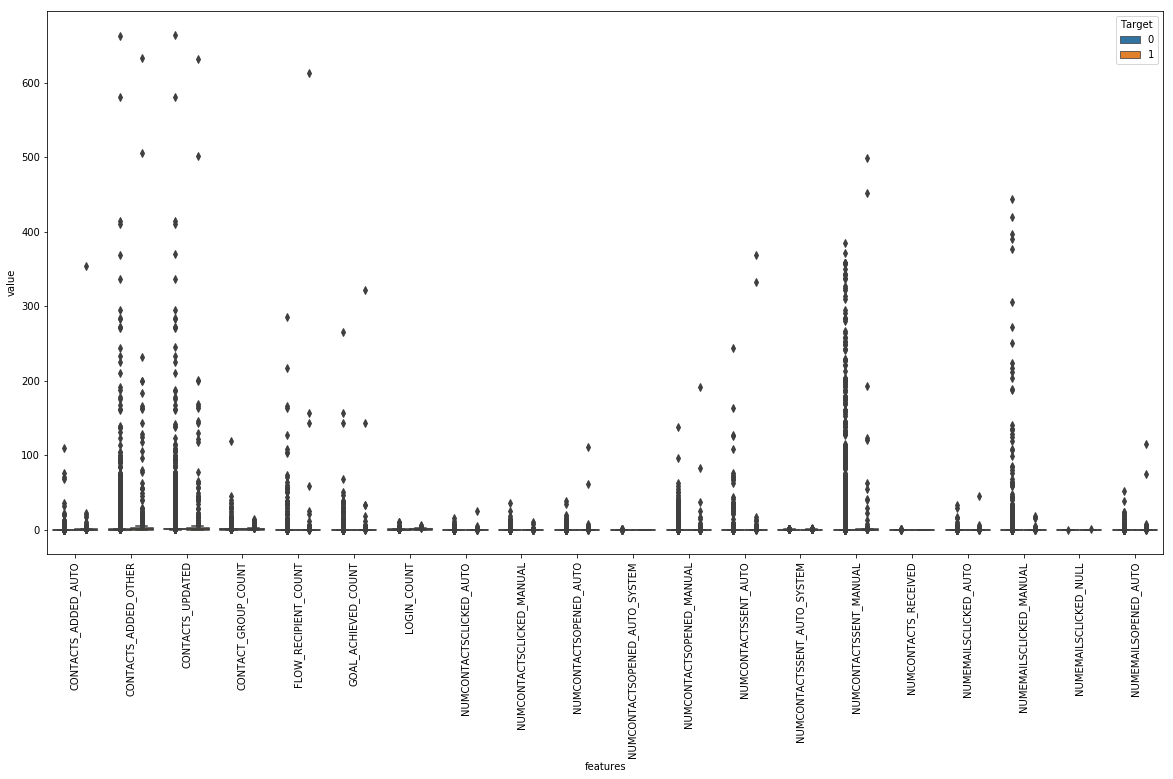

In [230]:
# first twenty features
# data_dia = mergedata2['Target']
# data = mergedata2[numeric]
# #data_n_2 = (data - data_n_2.mean()) / (data.std()) 
# data = pd.concat([data_dia,data.iloc[:,0:20]],axis=1)
# data = pd.melt(data,id_vars="Target",
#                     var_name="features",
#                     value_name='value')
# plt.figure(figsize=(20,10))
# sns.boxplot(x="features", y="value", hue="Target", data=data)
# plt.xticks(rotation=90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18]), <a list of 19 Text xticklabel objects>)

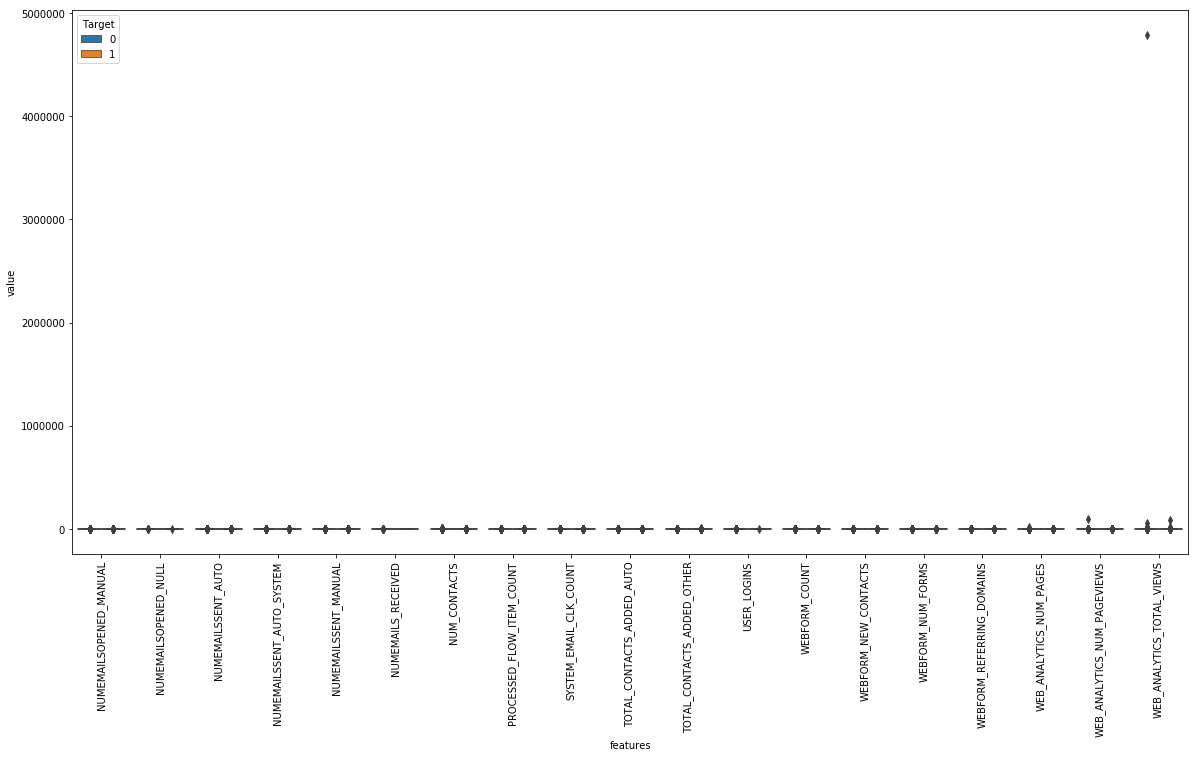

In [38]:
# data_dia = mergedata2['Target']
# data = mergedata2[numeric]
# #data_n_2 = (data - data_n_2.mean()) / (data.std()) 
# data = pd.concat([data_dia,data.iloc[:,21:40]],axis=1)
# data = pd.melt(data,id_vars="Target",
#                     var_name="features",
#                     value_name='value')
# plt.figure(figsize=(20,10))
# sns.boxplot(x="features", y="value", hue="Target", data=data)
# plt.xticks(rotation=90)

In [48]:
#mergedata2[mergedata2['WEB_ANALYTICS_TOTAL_VIEWS']>1000000]

appname  free_email  CONTACTS_ADDED_AUTO  CONTACTS_ADDED_OTHER  \
3076   dj494        True                  0.0              0.214286   

      CONTACTS_UPDATED  CONTACT_GROUP_COUNT  FLOW_RECIPIENT_COUNT  \
3076          0.285714             0.142857                   0.0   

      GOAL_ACHIEVED_COUNT  LOGIN_COUNT  NUMCONTACTSCLICKED_AUTO  \
3076                  0.0     0.214286                      0.0   

             ...                  first_contact_on          last_contact_on  \
3076         ...           2018-06-28 07:51:11 UTC  2018-07-12 06:08:40 UTC   

      in_trial_first_campaign_published_on  \
3076                                   NaN   

      in_trial_last_campaign_published_on  \
3076                                  NaN   

      in_trial_count_of_published_campaigns  \
3076                                    NaN   

      in_trial_first_campaign_launched_on  in_trial_last_campaign_launched_on  \
3076                                  NaN                                 NaN   

      in_trial_count_of_launched_campaigns  Target       trial_end_date  
3076                                   NaN       0  2018-07-11 07:51:21  

[1 rows x 111 columns]

In [56]:
mergedata[numeric[21:40]].describe()

NUMEMAILSOPENED_MANUAL  NUMEMAILSOPENED_NULL  NUMEMAILSSENT_AUTO  \
count            23505.000000          23505.000000        23505.000000   
mean                 0.467978              0.000723            0.153583   
std                  8.972148              0.086325            5.167746   
min                  0.000000              0.000000            0.000000   
25%                  0.000000              0.000000            0.000000   
50%                  0.000000              0.000000            0.000000   
75%                  0.000000              0.000000            0.000000   
max               1049.785714             13.071429          379.666667   

       NUMEMAILSSENT_AUTO_SYSTEM  NUMEMAILSSENT_MANUAL  NUMEMAILS_RECEIVED  \
count               23505.000000          23505.000000        23505.000000   
mean                    0.038409              8.038739            0.000480   
std                     0.335090            308.980725            0.038493   
min                     0.000000              0.000000            0.000000   
25%                     0.000000              0.000000            0.000000   
50%                     0.000000              0.000000            0.000000   
75%                     0.071429              0.000000            0.000000   
max                    34.714286          35676.214286            4.571429   

        NUM_CONTACTS  PROCESSED_FLOW_ITEM_COUNT  SYSTEM_EMAIL_CLK_COUNT  \
count   23505.000000               23505.000000            23505.000000   
mean       68.259837                   0.273201                0.754194   
std      2709.018109                   9.827081               23.361830   
min         0.000000                   0.000000                0.000000   
25%         1.857143                   0.000000                0.000000   
50%         2.642857                   0.000000                0.000000   
75%         3.714286                   0.000000                0.000000   
max    384616.230769                1036.857143             2638.571429   

       TOTAL_CONTACTS_ADDED_AUTO  TOTAL_CONTACTS_ADDED_OTHER   USER_LOGINS  \
count               23505.000000                23505.000000  23505.000000   
mean                    0.268041                   11.321056      0.090873   
std                     9.414803                  373.148431      0.101465   
min                     0.000000                    0.000000      0.000000   
25%                     0.000000                    0.142857      0.071429   
50%                     0.000000                    0.153846      0.071429   
75%                     0.000000                    0.428571      0.071429   
max                  1062.500000                38461.615385      1.500000   

       WEBFORM_COUNT  WEBFORM_NEW_CONTACTS  WEBFORM_NUM_FORMS  \
count   23505.000000          23505.000000       23505.000000   
mean        0.009794              0.006905           0.002062   
std         0.347884              0.309977           0.027052   
min         0.000000              0.000000           0.000000   
25%         0.000000              0.000000           0.000000   
50%         0.000000              0.000000           0.000000   
75%         0.000000              0.000000           0.000000   
max        30.307692             28.384615           1.928571   

       WEBFORM_REFERRING_DOMAINS  WEB_ANALYTICS_NUM_PAGES  \
count               23505.000000             23505.000000   
mean                    0.001975                 0.592309   
std                     0.025506                85.884329   
min                     0.000000                 0.000000   
25%                     0.000000                 0.000000   
50%                     0.000000                 0.000000   
75%                     0.000000                 0.000000   
max                     1.214286             13165.714286   

       WEB_ANALYTICS_NUM_PAGEVIEWS  WEB_ANALYTICS_TOTAL_VIEWS  
count                 23505.000000               

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18]), <a list of 19 Text xticklabel objects>)

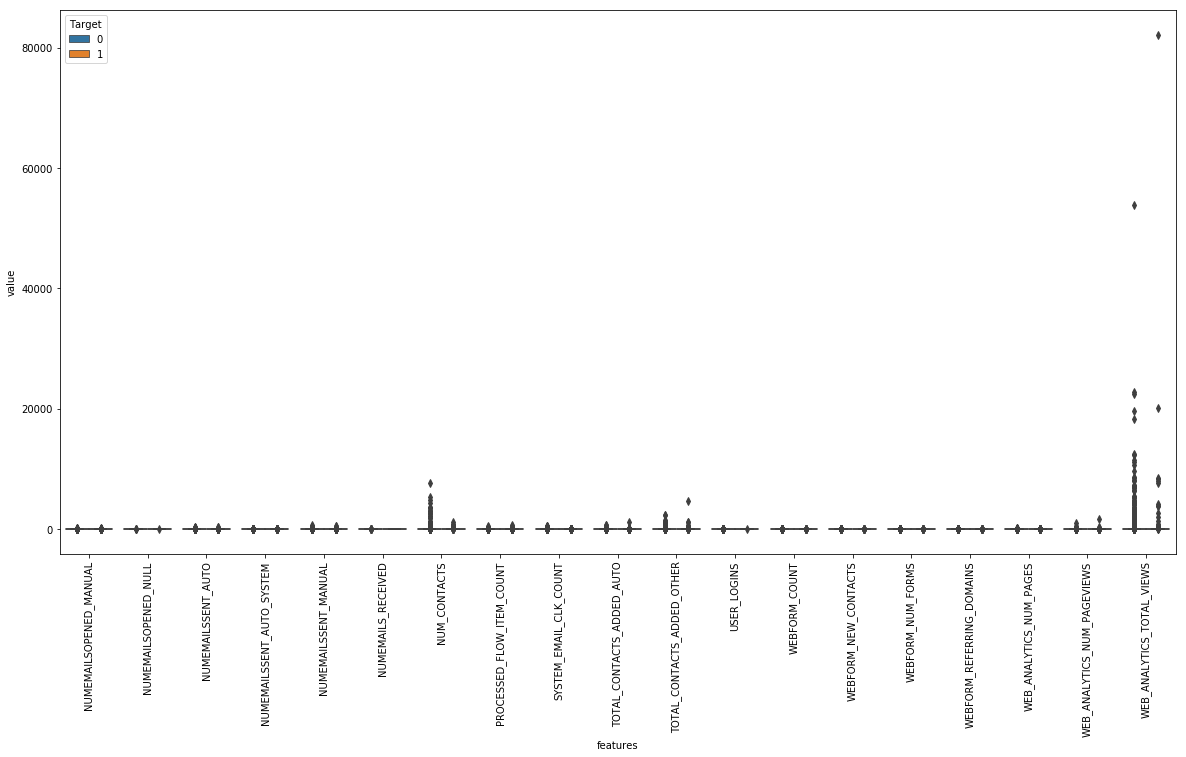

In [49]:
# data_dia = mergedata2['Target']
# data = mergedata2[~(mergedata2['WEB_ANALYTICS_TOTAL_VIEWS']>1000000)][numeric]
# #data_n_2 = (data - data_n_2.mean()) / (data.std()) 
# data = pd.concat([data_dia,data.iloc[:,21:40]],axis=1)
# data = pd.melt(data,id_vars="Target",
#                     var_name="features",
#                     value_name='value')
# plt.figure(figsize=(20,10))
# sns.boxplot(x="features", y="value", hue="Target", data=data)
# plt.xticks(rotation=90)

In [50]:
#mergedata2=mergedata2[~(mergedata2['WEB_ANALYTICS_TOTAL_VIEWS']>1000000)]

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18]), <a list of 19 Text xticklabel objects>)

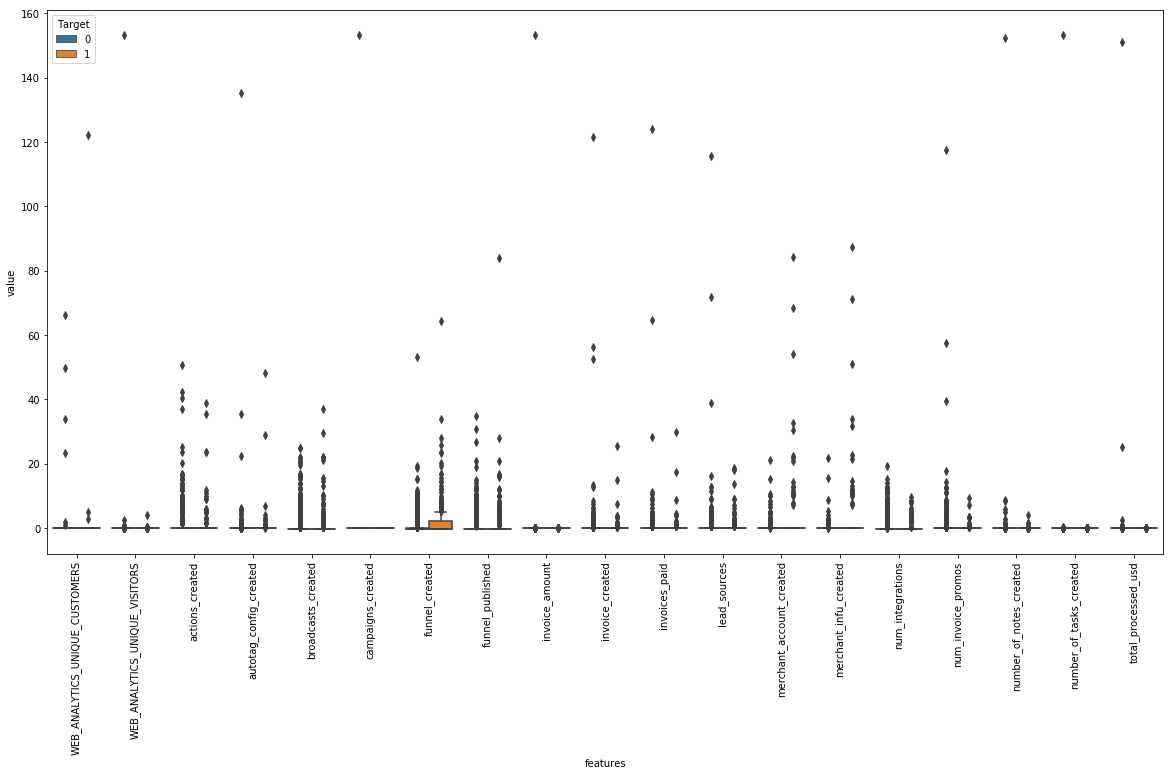

In [57]:
data_dia = mergedata['Target']
data = mergedata[numeric]
data_n_2 = (data - data.mean()) / (data.std()) 
data = pd.concat([data_dia,data_n_2.iloc[:,41:60]],axis=1)
data = pd.melt(data,id_vars="Target",
                    var_name="features",
                    value_name='value')
plt.figure(figsize=(20,10))
sns.boxplot(x="features", y="value", hue="Target", data=data)
plt.xticks(rotation=90)

<Figure size 1440x1440 with 0 Axes>

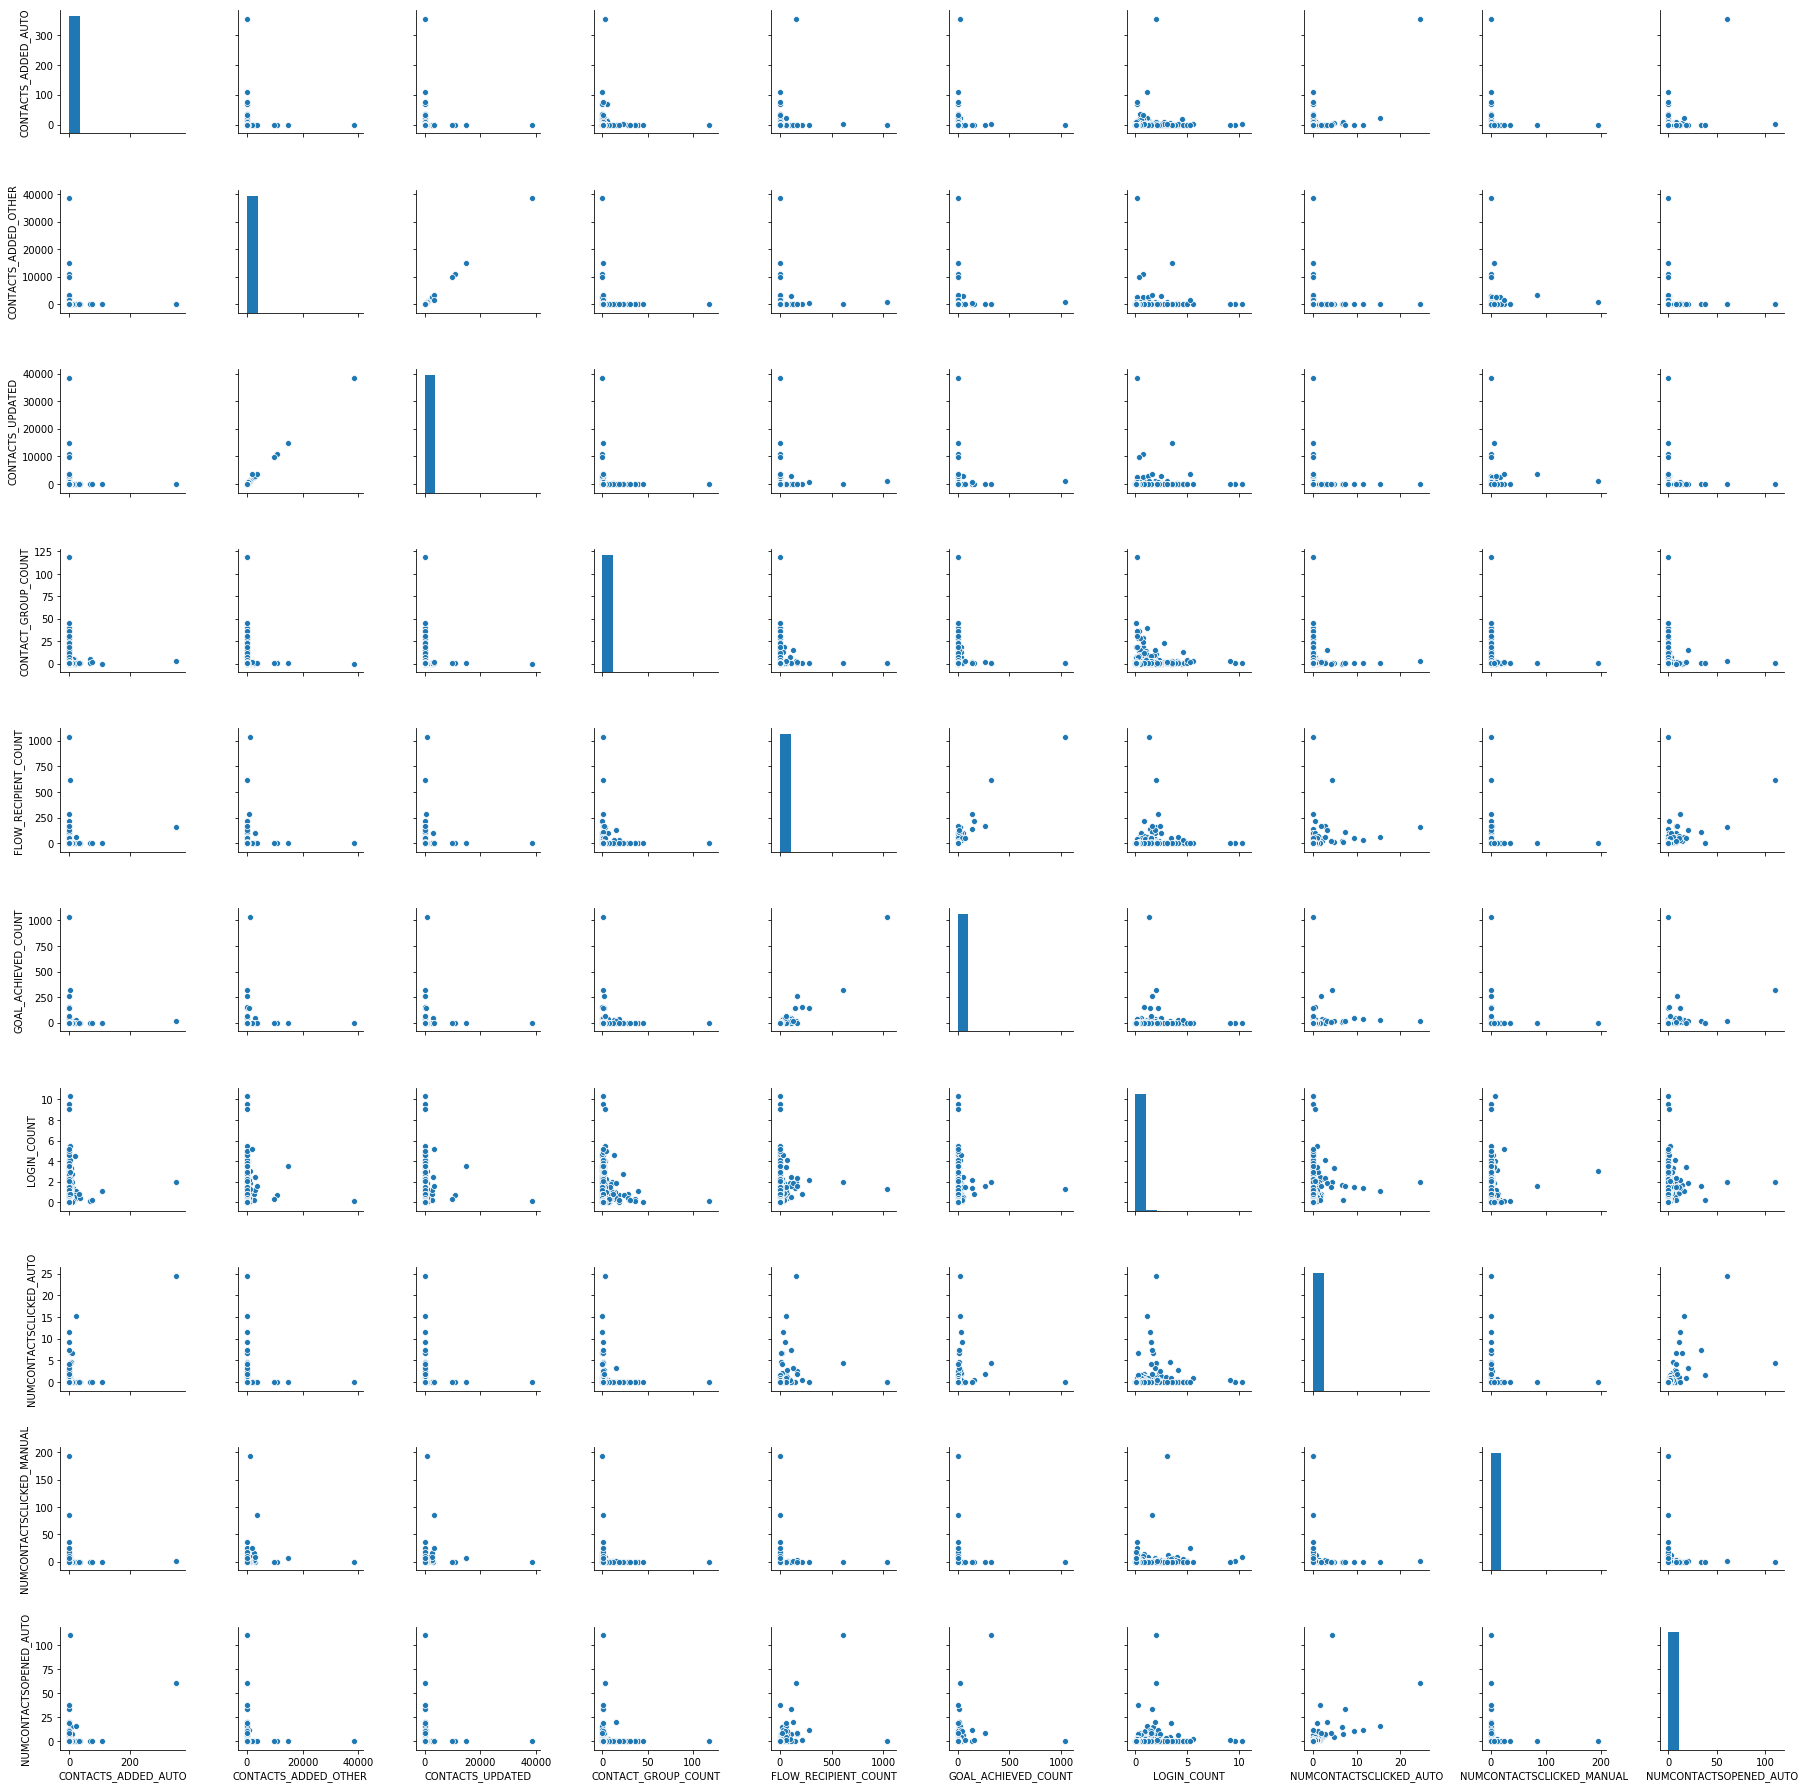

In [58]:
# first twenty features
data = mergedata[numeric[0:10]]
plt.figure(figsize=(20,20))
sns.pairplot(data)


<Figure size 1440x1440 with 0 Axes>

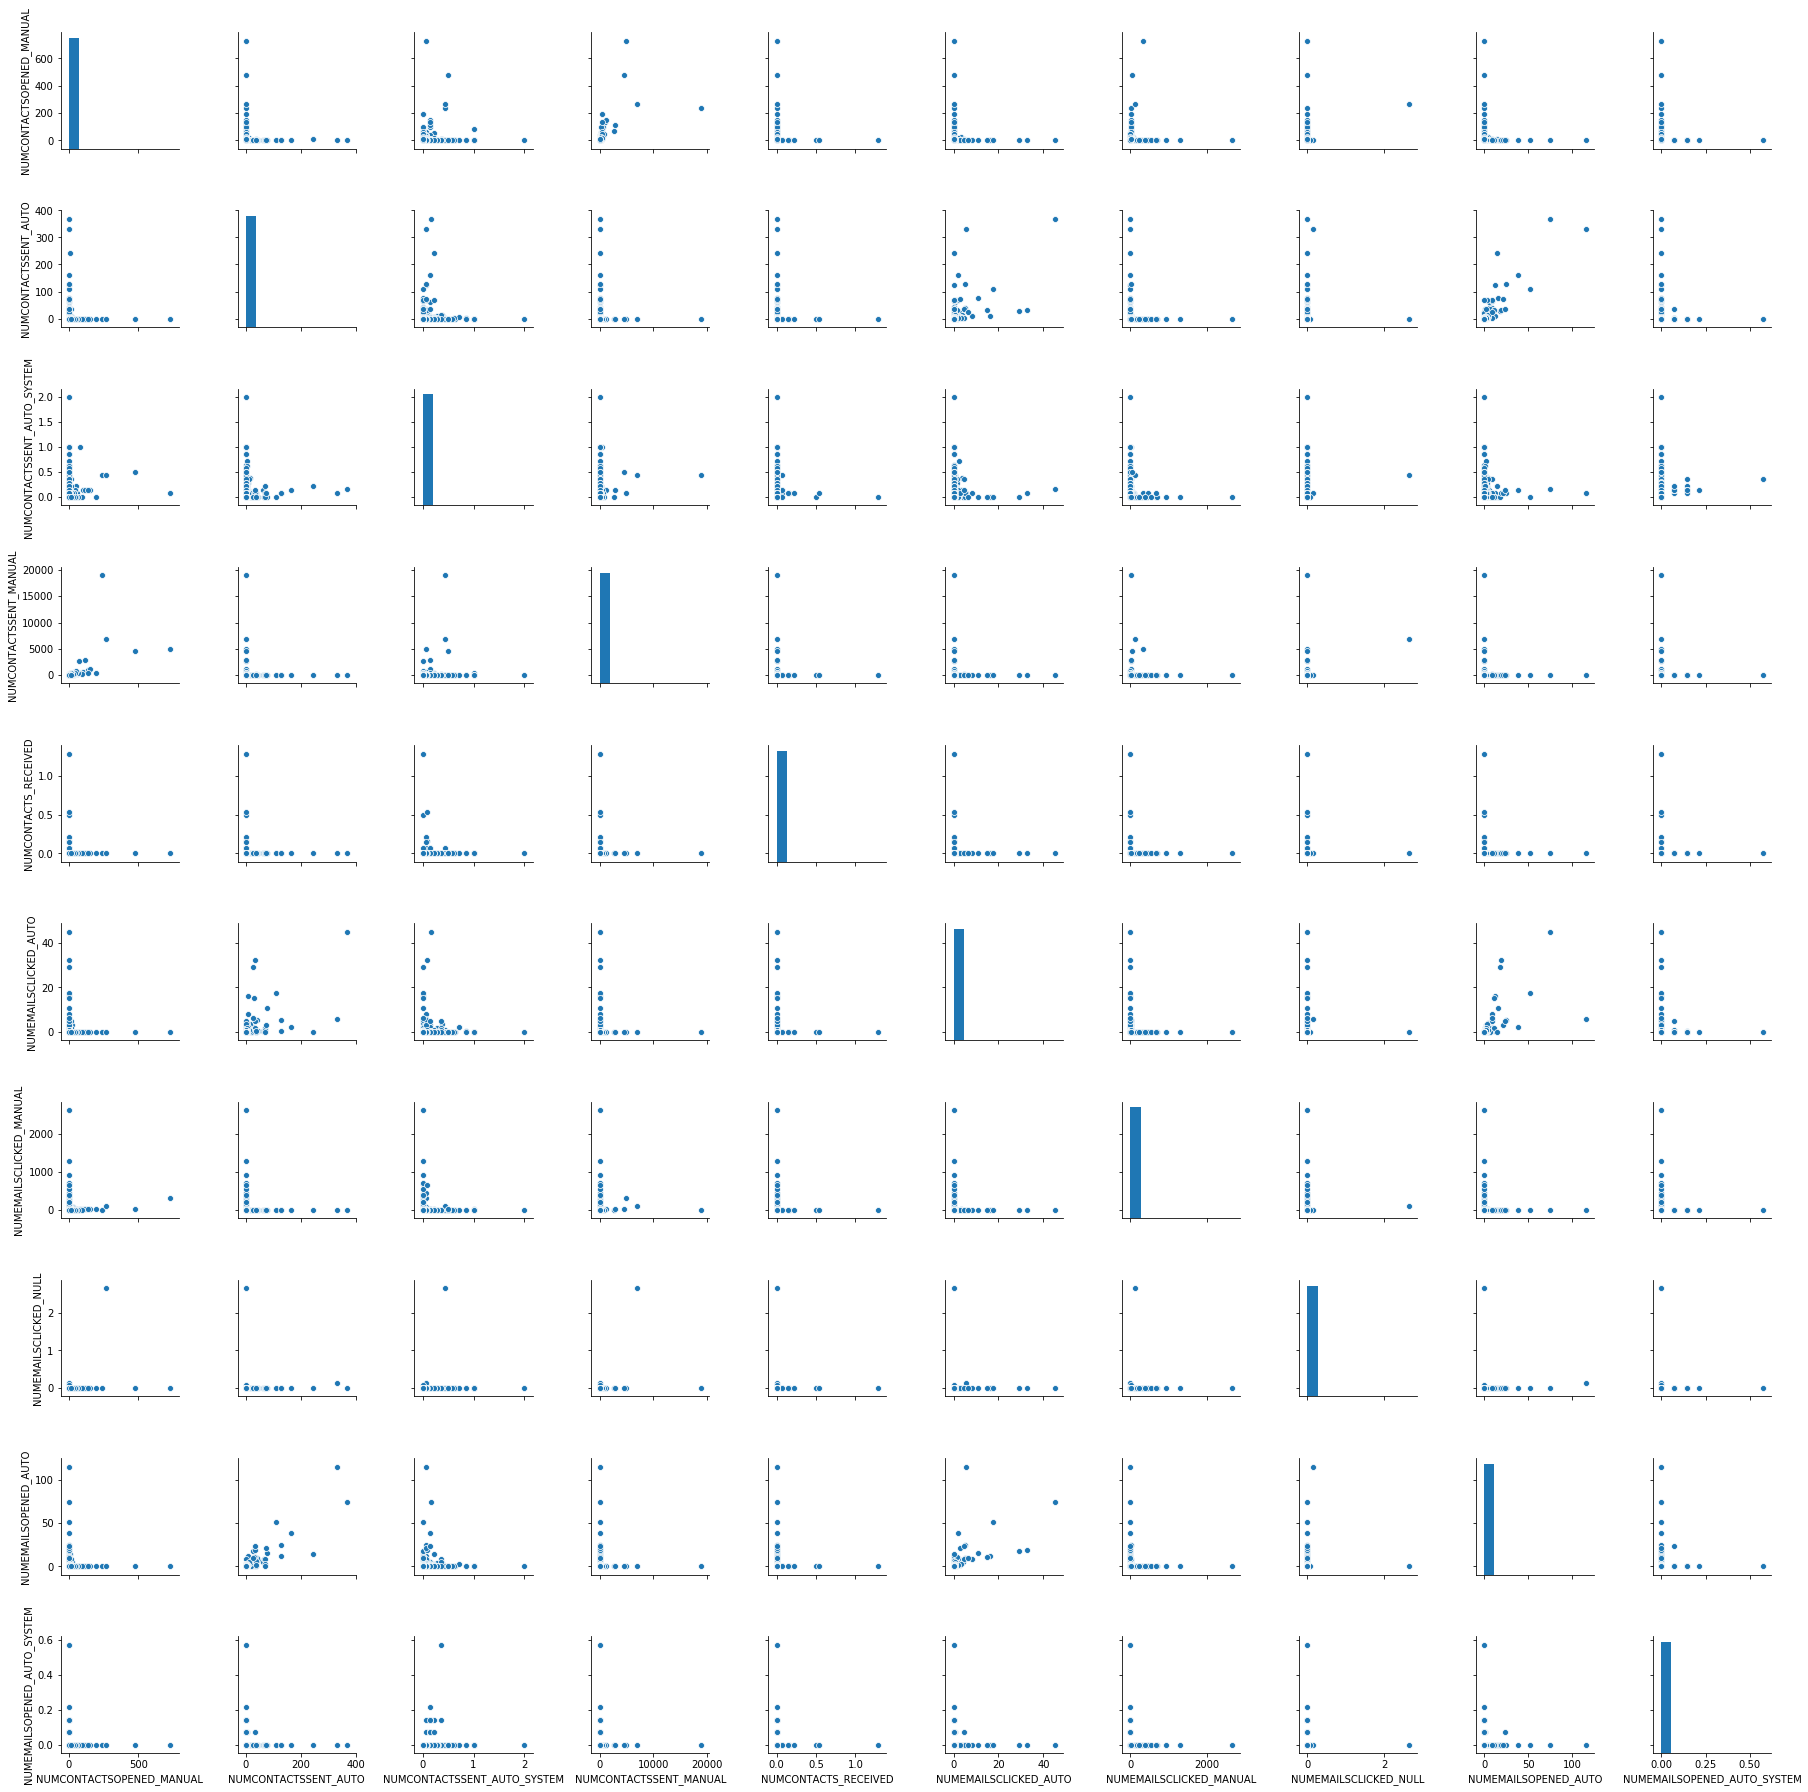

In [59]:
data = mergedata[numeric[11:21]]
plt.figure(figsize=(20,20))
sns.pairplot(data)

/Users/shravanamee/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3267: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  exec(code_obj, self.user_global_ns, self.user_ns)


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a25b6d320>,
      dtype=object)

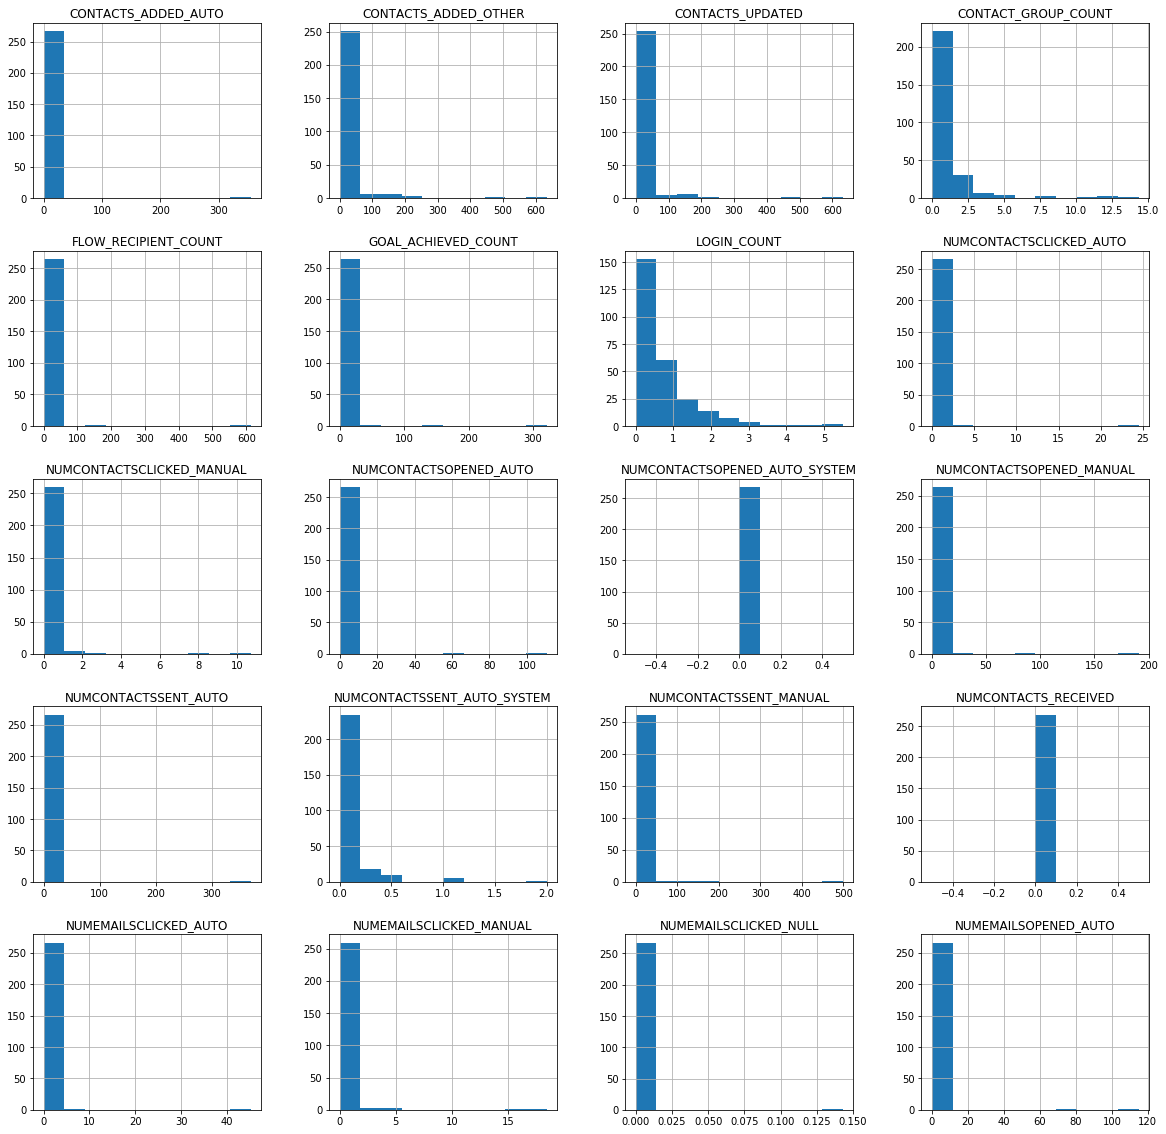

In [60]:
fig = plt.figure(figsize = (20,20))
ax2 = fig.gca()
tdata=mergedata[mergedata['Target']==1]
tdata[numeric[0:20]].hist(ax = ax2)

<Figure size 1440x1440 with 0 Axes>

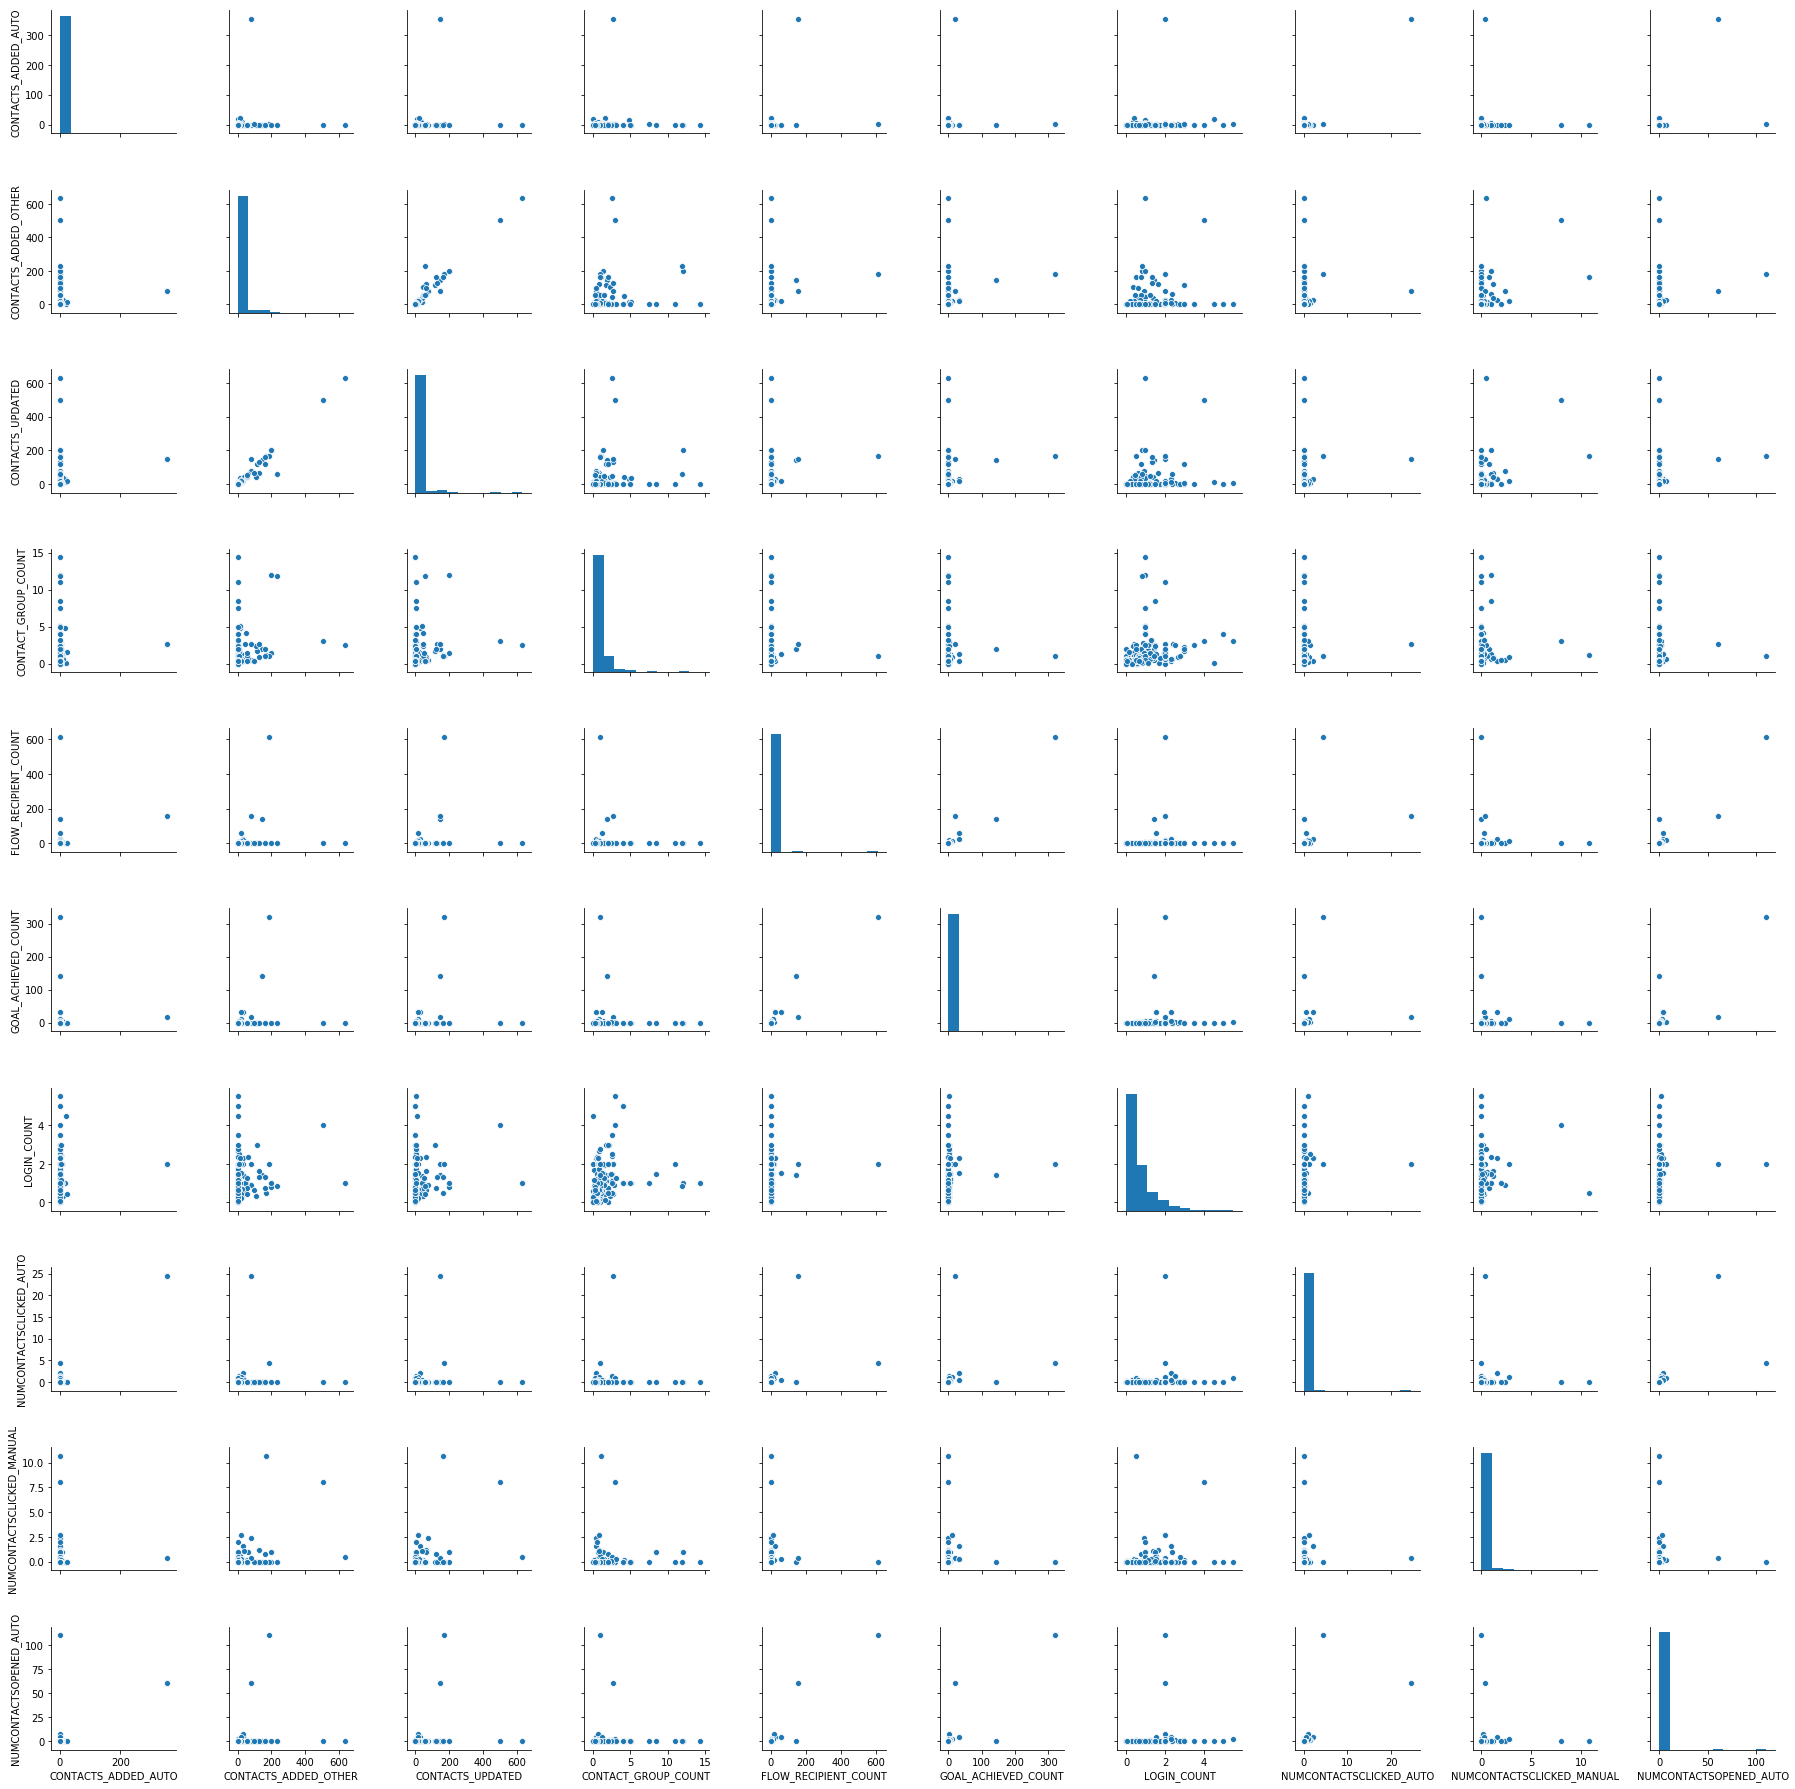

In [61]:

plt.figure(figsize=(20,20))
sns.pairplot(tdata[numeric[0:10]])

/Users/shravanamee/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3267: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  exec(code_obj, self.user_global_ns, self.user_ns)


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a721b2a90>,
      dtype=object)

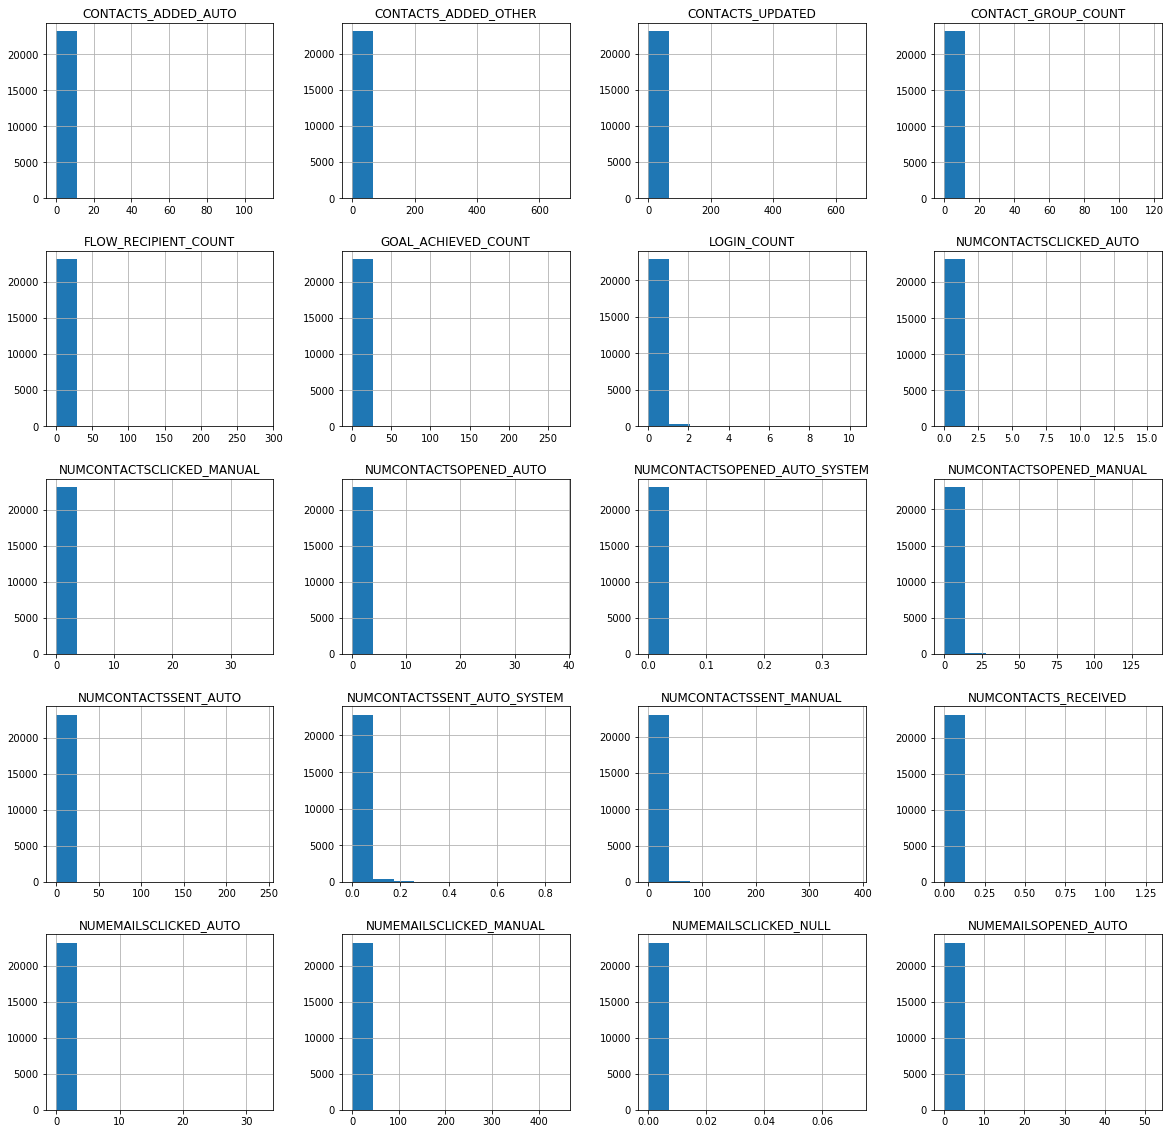

In [62]:
fig = plt.figure(figsize = (20,20))
ax2 = fig.gca()
ndata=mergedata2[mergedata2['Target']==0]
ndata[numeric[0:20]].hist(ax = ax2)

<Figure size 1440x1440 with 0 Axes>

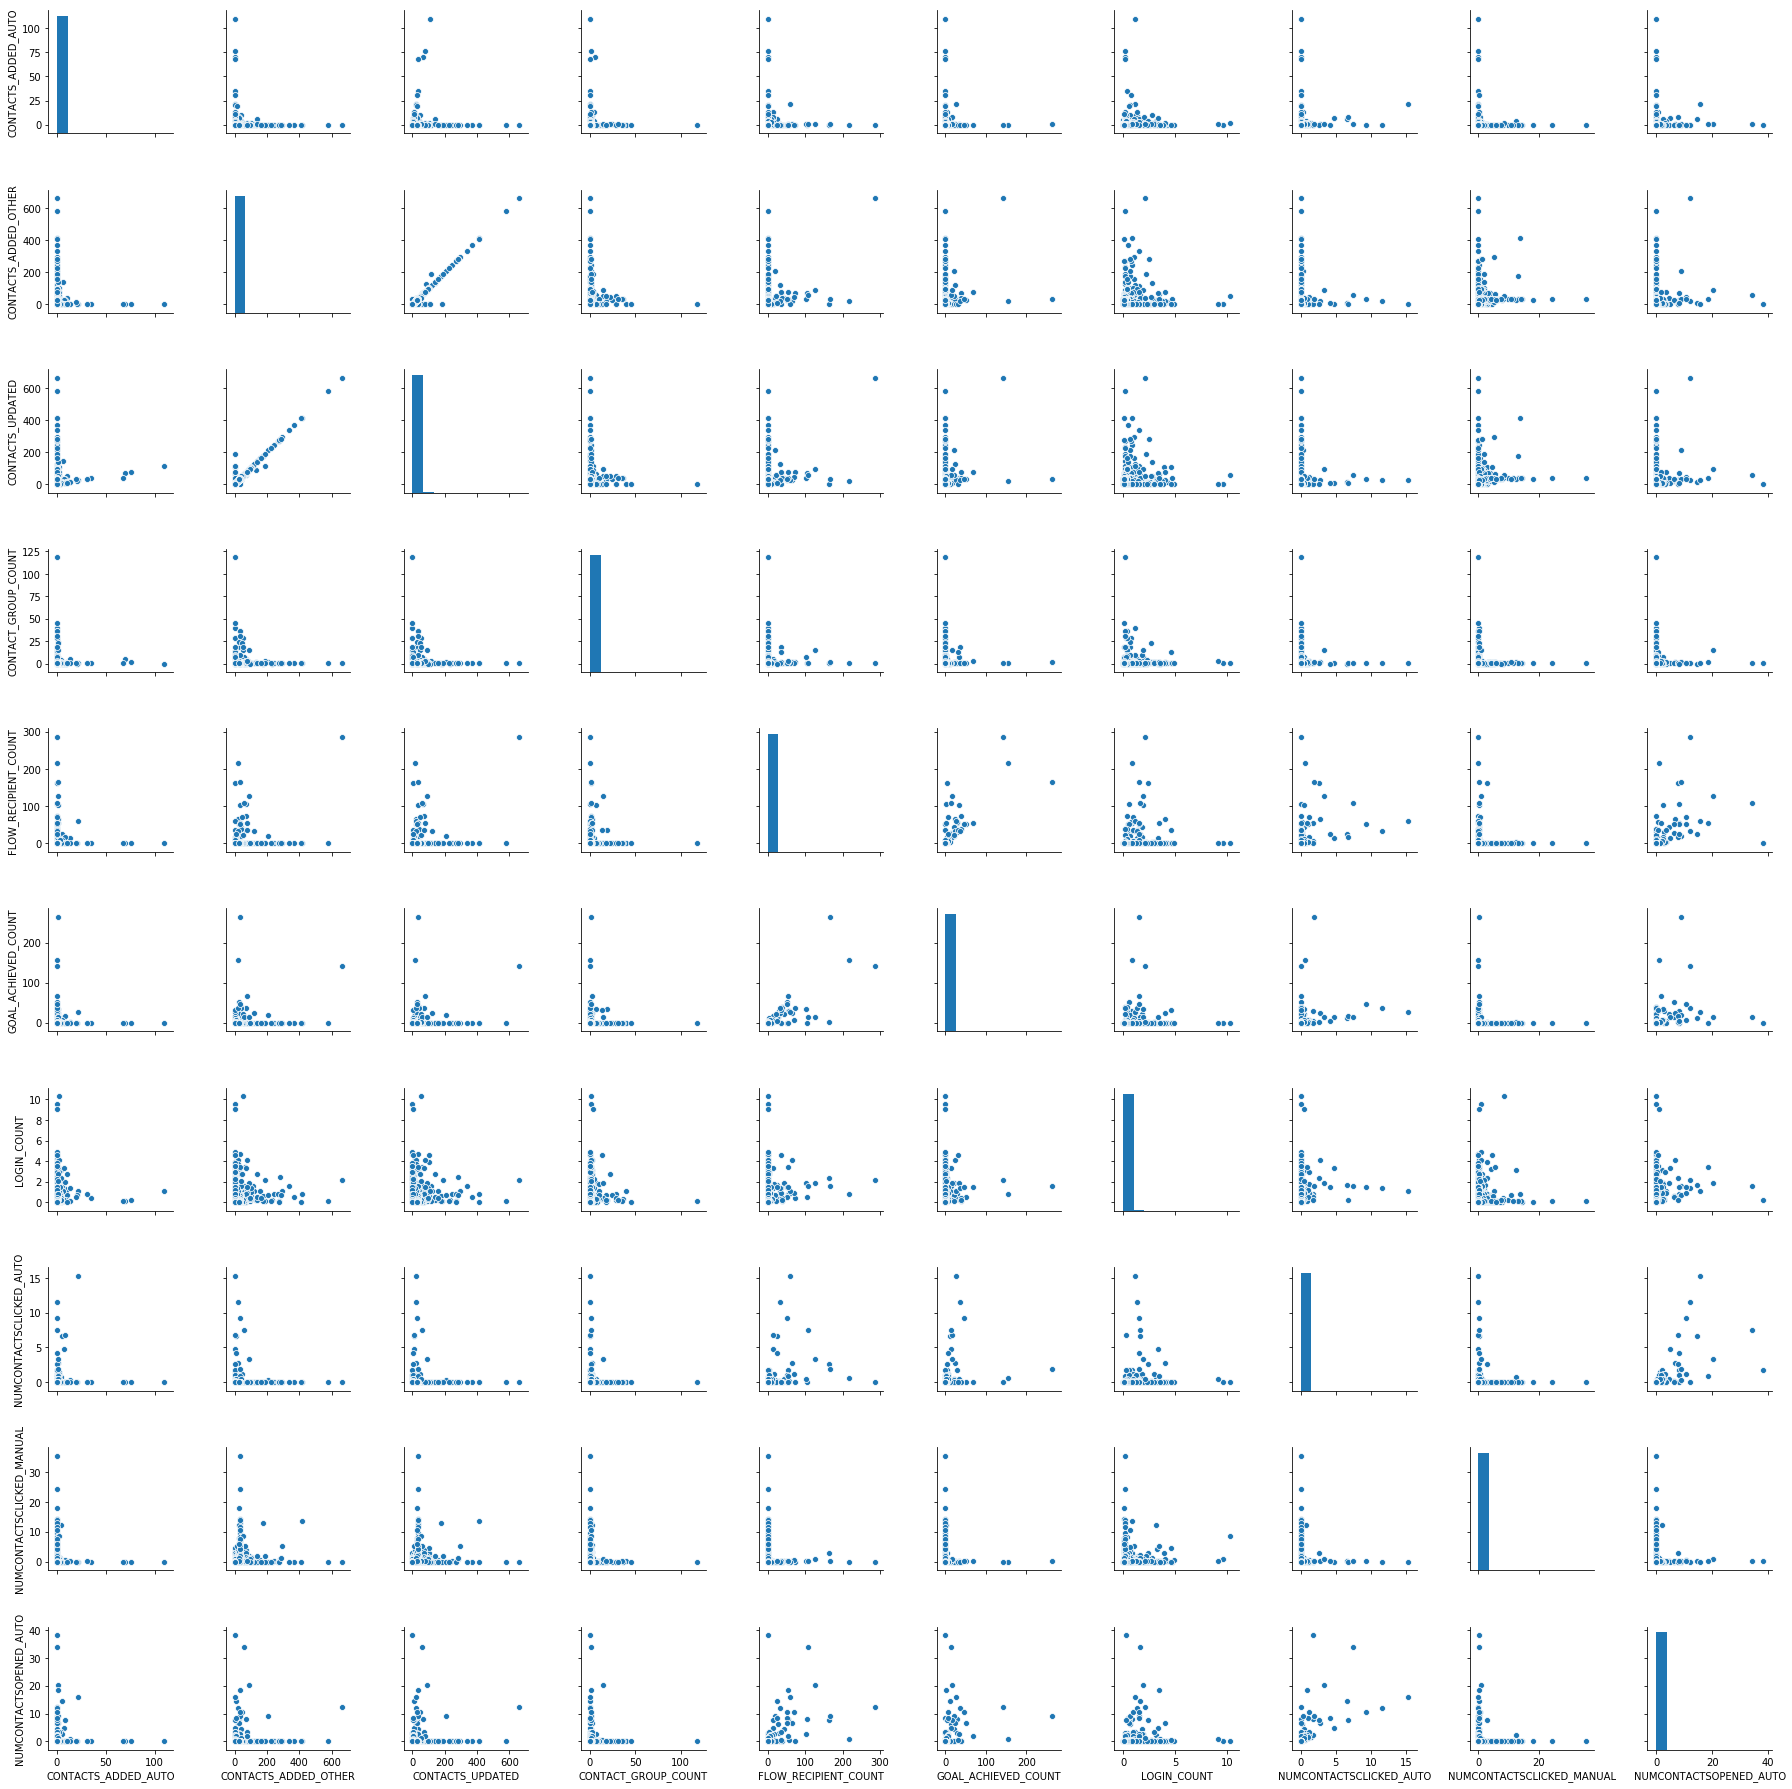

In [63]:
plt.figure(figsize=(20,20))
sns.pairplot(ndata[numeric[0:10]])

/Users/shravanamee/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3267: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  exec(code_obj, self.user_global_ns, self.user_ns)


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a6a2ae438>,
      dtype=object)

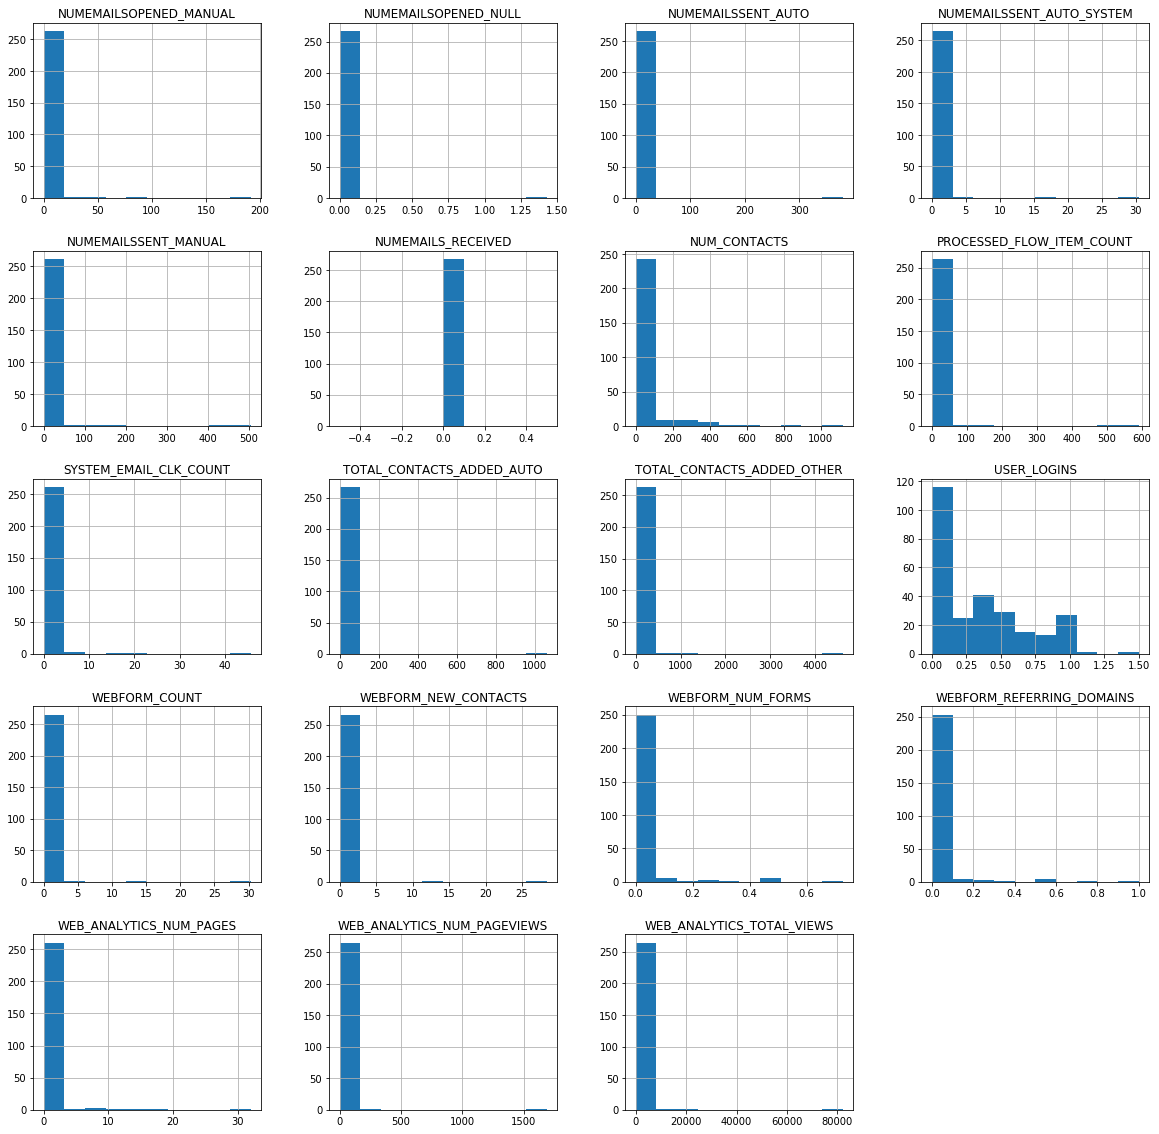

In [64]:
fig = plt.figure(figsize = (20,20))
ax2 = fig.gca()
tdata=mergedata[mergedata['Target']==1]
tdata[numeric[21:40]].hist(ax = ax2)

/Users/shravanamee/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3267: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  exec(code_obj, self.user_global_ns, self.user_ns)


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a6b7eab70>,
      dtype=object)

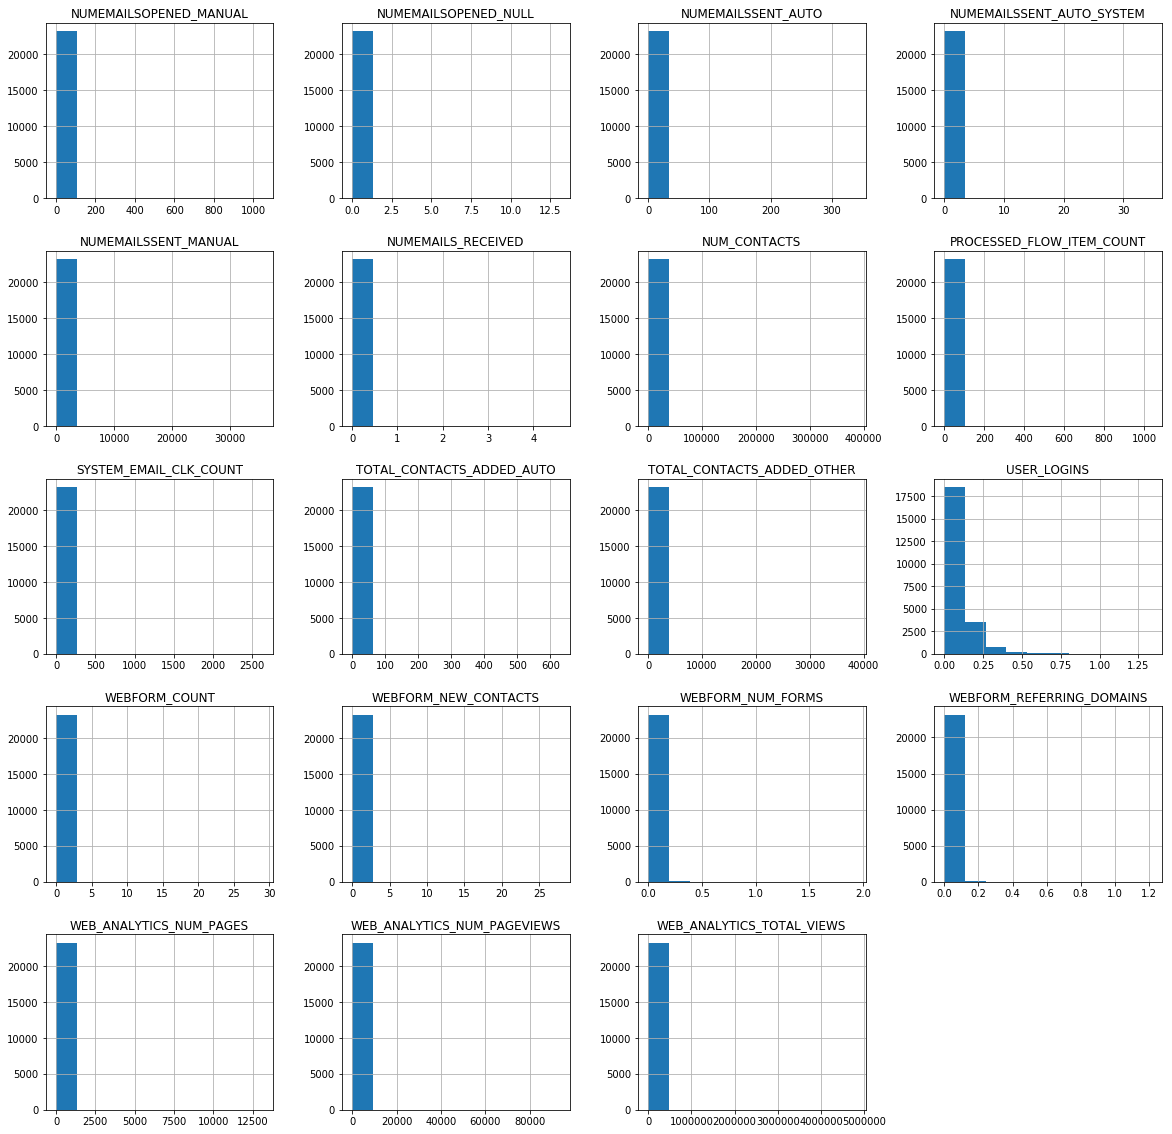

In [65]:
fig = plt.figure(figsize = (20,20))
ax2 = fig.gca()
ndata=mergedata[mergedata['Target']==0]
ndata[numeric[21:40]].hist(ax = ax2)

/Users/shravanamee/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3267: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  exec(code_obj, self.user_global_ns, self.user_ns)


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a68633fd0>,
      dtype=object)

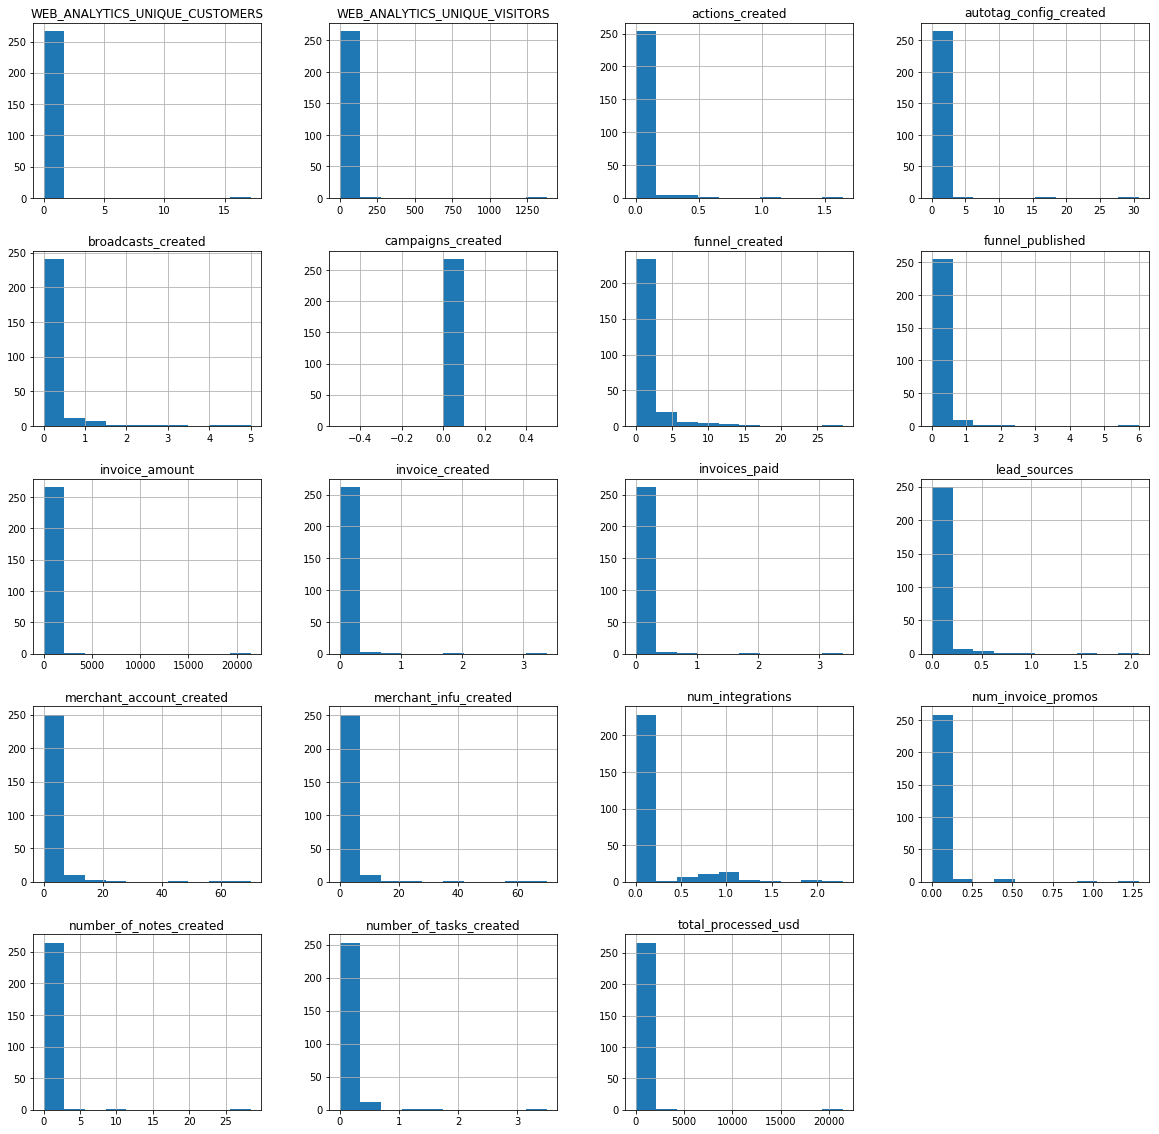

In [67]:
fig = plt.figure(figsize = (20,20))
ax2 = fig.gca()
tdata=mergedata[mergedata['Target']==1]
tdata[numeric[41:60]].hist(ax = ax2)

/Users/shravanamee/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3267: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  exec(code_obj, self.user_global_ns, self.user_ns)


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a693cd518>,
      dtype=object)

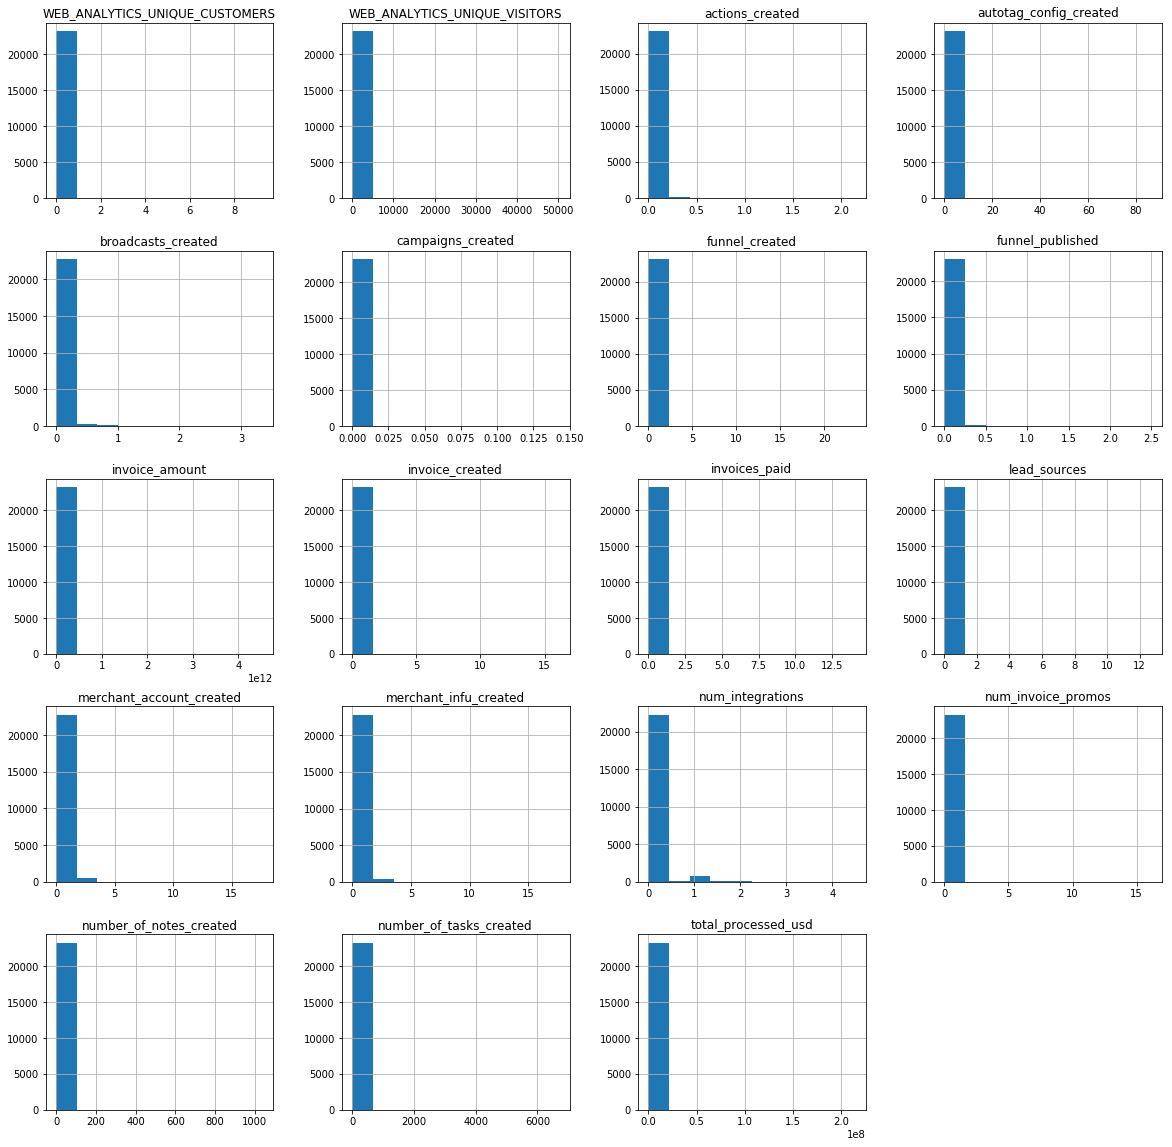

In [68]:
fig = plt.figure(figsize = (20,20))
ax2 = fig.gca()
ndata=mergedata[mergedata['Target']==0]
ndata[numeric[41:60]].hist(ax = ax2)

/Users/shravanamee/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3267: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  exec(code_obj, self.user_global_ns, self.user_ns)


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a694b5668>,
      dtype=object)

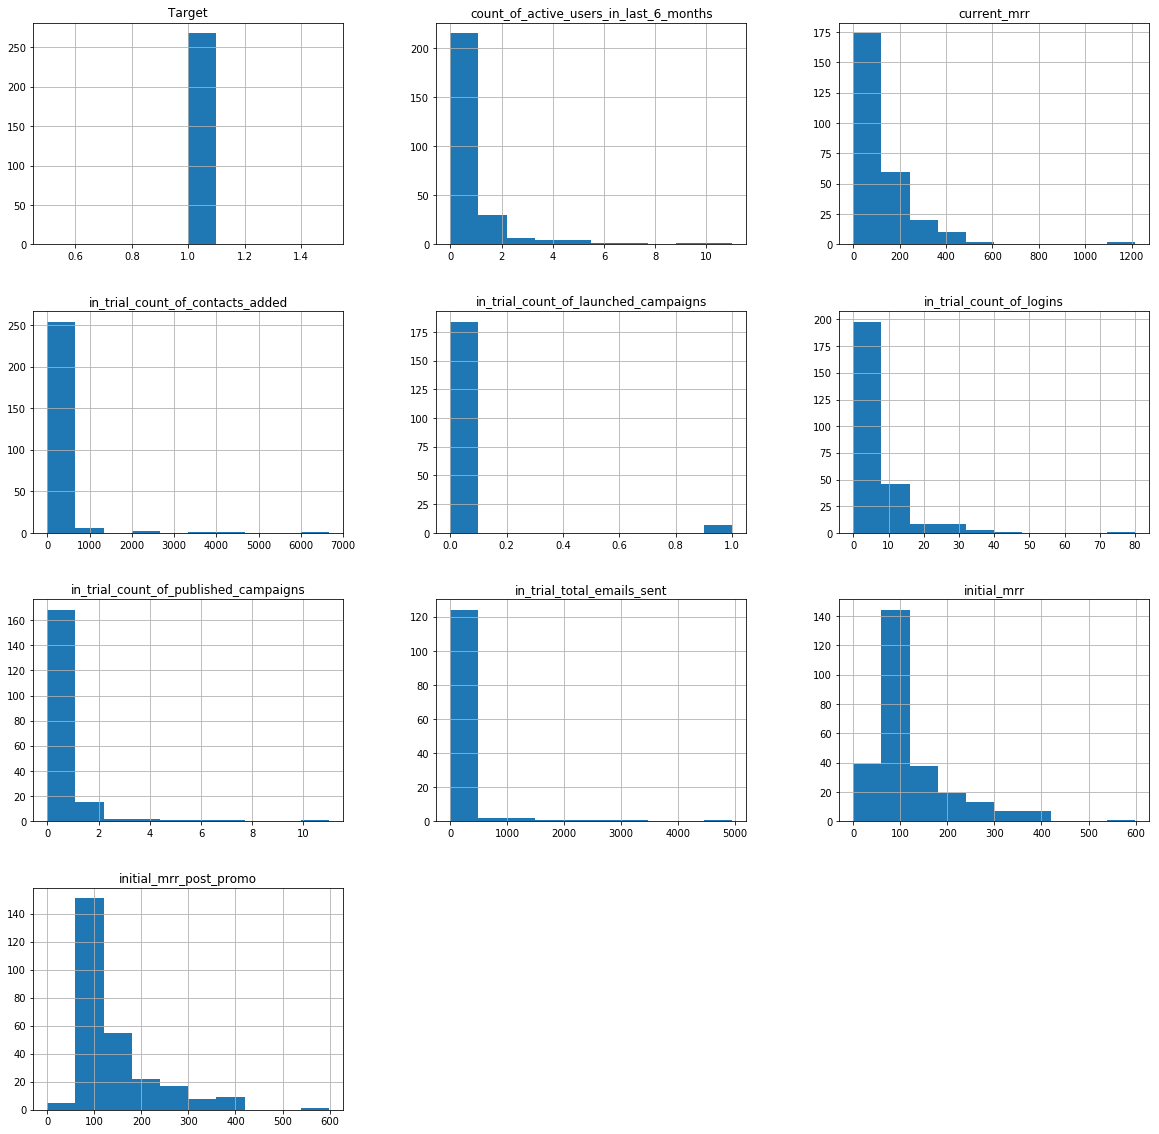

In [69]:
fig = plt.figure(figsize = (20,20))
ax2 = fig.gca()
tdata[numeric[61:71]].hist(ax = ax2)

/Users/shravanamee/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3267: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  exec(code_obj, self.user_global_ns, self.user_ns)


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a6ac2d208>,
      dtype=object)

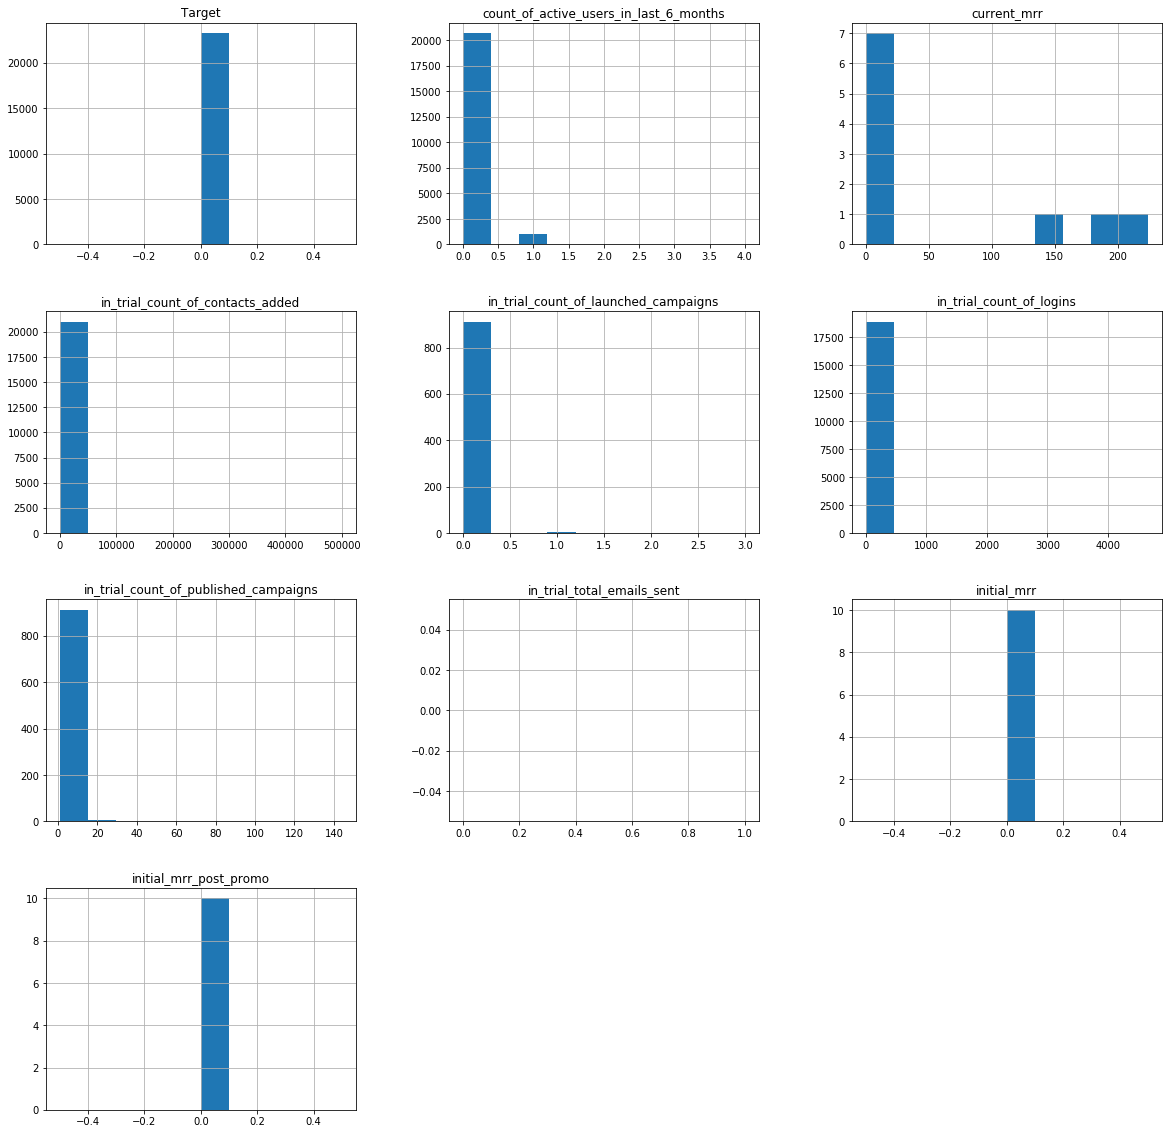

In [70]:
fig = plt.figure(figsize = (20,20))
ax2 = fig.gca()
ndata[numeric[61:71]].hist(ax = ax2)

In [71]:
mergedata['Target'].value_counts()

0    23237
1      268
Name: Target, dtype: int64

In [77]:
numeric

array(['CONTACTS_ADDED_AUTO', 'CONTACTS_ADDED_OTHER', 'CONTACTS_UPDATED',
       'CONTACT_GROUP_COUNT', 'FLOW_RECIPIENT_COUNT',
       'GOAL_ACHIEVED_COUNT', 'LOGIN_COUNT', 'NUMCONTACTSCLICKED_AUTO',
       'NUMCONTACTSCLICKED_MANUAL', 'NUMCONTACTSOPENED_AUTO',
       'NUMCONTACTSOPENED_AUTO_SYSTEM', 'NUMCONTACTSOPENED_MANUAL',
       'NUMCONTACTSSENT_AUTO', 'NUMCONTACTSSENT_AUTO_SYSTEM',
       'NUMCONTACTSSENT_MANUAL', 'NUMCONTACTS_RECEIVED',
       'NUMEMAILSCLICKED_AUTO', 'NUMEMAILSCLICKED_MANUAL',
       'NUMEMAILSCLICKED_NULL', 'NUMEMAILSOPENED_AUTO',
       'NUMEMAILSOPENED_AUTO_SYSTEM', 'NUMEMAILSOPENED_MANUAL',
       'NUMEMAILSOPENED_NULL', 'NUMEMAILSSENT_AUTO',
       'NUMEMAILSSENT_AUTO_SYSTEM', 'NUMEMAILSSENT_MANUAL',
       'NUMEMAILS_RECEIVED', 'NUM_CONTACTS', 'PROCESSED_FLOW_ITEM_COUNT',
       'SYSTEM_EMAIL_CLK_COUNT', 'TOTAL_CONTACTS_ADDED_AUTO',
       'TOTAL_CONTACTS_ADDED_OTHER', 'USER_LOGINS', 'WEBFORM_COUNT',
       'WEBFORM_NEW_CONTACTS', 'WEBFORM_NUM_FORMS',
  

In [81]:
mergedata.drop(['Unnamed: 0_y','initial_mrr_post_promo','current_mrr', 'initial_mrr'],axis=1,inplace=True)

In [94]:
categorical

array(['appname', 'free_email', 'app_name', 'account_id',
       'opportunity_id', 'opportunity_stage_name',
       'opportunity_owner_name', 'opportunity_demo_date',
       'is_free_trial_initiated', 'trial_date', 'contact_id',
       'contact_lead_source', 'contact_phase', 'lead_lead_source',
       'lead_converted_date', 'initial_edition', 'current_edition_type',
       'new_customer_date', 'start_date', 'kickstart_owner_name',
       'kickstart_owner_role', 'kickstart_type', 'cancel_eligible',
       'sales_cohort_date', 'paying_customer_date', 'contract_status',
       'edition_category', 'promo_customer', 'lost_revenue_date',
       'in_trial_first_email_date', 'in_trial_last_email_date',
       'first_login_on', 'second_login', 'first_contact_on',
       'last_contact_on', 'in_trial_first_campaign_published_on',
       'in_trial_last_campaign_published_on',
       'in_trial_first_campaign_launched_on',
       'in_trial_last_campaign_launched_on', 'trial_end_date'],
      dtype=o

In [95]:
mergedata.drop(['appname','app_name','account_id','initial_edition', 'current_edition_type','kickstart_owner_name',
       'kickstart_owner_role', 'kickstart_type','lost_revenue_date'],axis=1,inplace=True)

In [111]:
mergedata.drop(['contact_id','opportunity_id'],axis=1,inplace=True)

In [112]:
y=mergedata['Target']
X=mergedata.drop('Target',axis=1)



In [113]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1,test_size=.2)
X_train = X_train.copy()
X_test = X_test.copy()
y_train = y_train.copy()
y_test = y_test.copy()

In [114]:
X_train.head()

free_email  CONTACTS_ADDED_AUTO  CONTACTS_ADDED_OTHER  \
7892        False                  0.0              0.071429   
15543        True                  0.0              0.142857   
21525        True                  0.0              0.000000   
16593        True                  0.0              0.071429   
8544        False                  0.0              0.461538   

       CONTACTS_UPDATED  CONTACT_GROUP_COUNT  FLOW_RECIPIENT_COUNT  \
7892           0.142857             0.357143                   0.0   
15543          0.214286             0.071429                   0.0   
21525          0.142857             0.071429                   0.0   
16593          0.142857             0.357143                   0.0   
8544           0.384615             0.230769                   0.0   

       GOAL_ACHIEVED_COUNT  LOGIN_COUNT  NUMCONTACTSCLICKED_AUTO  \
7892                   0.0     0.071429                      0.0   
15543                  0.0     0.142857                      0.0   
21525                  0.0     0.071429                      0.0   
16593                  0.0     0.071429                      0.0   
8544                   0.0     0.230769                      0.0   

       NUMCONTACTSCLICKED_MANUAL         ...           \
7892                         0.0         ...            
15543                        0.0         ...            
21525                        0.0         ...            
16593                        0.0         ...            
8544                         0.0         ...            

       in_trial_count_of_contacts_added         first_contact_on  \
7892                                2.0  2018-09-08 06:37:07 UTC   
15543                               3.0  2018-07-02 11:12:01 UTC   
21525                               NaN                      NaN   
16593                               2.0  2018-11-14 16:21:55 UTC   
8544                                3.0  2018-06-05 12:29:47 UTC   

               last_contact_on  in_trial_first_campaign_published_on  \
7892   2018-09-08 06:37:07 UTC                                   NaN   
15543  2018-07-12 06:53:04 UTC                                   NaN   
21525                      NaN                                   NaN   
16593  2018-11-14 16:21:55 UTC                                   NaN   
8544   2018-06-05 12:30:24 UTC                                   NaN   

       in_trial_last_campaign_published_on  \
7892                                   NaN   
15543                                  NaN   
21525                                  NaN   
16593                                  NaN   
8544                                   NaN   

       in_trial_count_of_published_campaigns  \
7892                                     NaN   
15543                                    NaN   
21525                                    NaN   
16593                                    NaN   
8544                                     NaN   

       in_trial_first_campaign_launched_on  \
7892                                   NaN   
15543                                  NaN   
21525                                  NaN   
16593                                  NaN   
8544                                   NaN   

       in_trial_last_campaign_launched_on  \
7892                                  NaN   
15543                                 NaN   
21525                                 NaN   
16593                                 NaN   
8544                                  NaN   

       in_trial_count_of_launched_campaigns       trial_end_date  
7892                                    NaN  2018-09-21 06:37:20  
15543                                   NaN  2018-07-15 11:12:12  
21525                                   NaN  2017-10-10 09:51:39  
16593                                   NaN  2018-11-27 16:22:33  
8544                                    NaN  2018-06-18 12:29:56  

[5 rows x 95 columns]

In [115]:
X_train.describe()

CONTACTS_ADDED_AUTO  CONTACTS_ADDED_OTHER  CONTACTS_UPDATED  \
count         18804.000000          18804.000000      18804.000000   
mean              0.088399              8.461484          8.736342   
std               1.346219            316.451569        317.206790   
min               0.000000              0.000000          0.000000   
25%               0.000000              0.071429          0.142857   
50%               0.000000              0.071429          0.214286   
75%               0.000000              0.285714          0.357143   
max             109.785714          38461.538462      38461.615385   

       CONTACT_GROUP_COUNT  FLOW_RECIPIENT_COUNT  GOAL_ACHIEVED_COUNT  \
count         18804.000000          18804.000000         18804.000000   
mean              0.290487              0.215327             0.148989   
std               0.906596              8.601482             8.106573   
min               0.000000              0.000000             0.000000   
25%               0.071429              0.000000             0.000000   
50%               0.285714              0.000000             0.000000   
75%               0.357143              0.000000             0.000000   
max              44.785714           1036.357143          1036.642857   

        LOGIN_COUNT  NUMCONTACTSCLICKED_AUTO  NUMCONTACTSCLICKED_MANUAL  \
count  18804.000000             18804.000000               18804.000000   
mean       0.148580                 0.005635                   0.081638   
std        0.280428                 0.157683                   1.652680   
min        0.000000                 0.000000                   0.000000   
25%        0.071429                 0.000000                   0.000000   
50%        0.071429                 0.000000                   0.000000   
75%        0.142857                 0.000000                   0.000000   
max        9.571429                15.285714                 194.142857   

       NUMCONTACTSOPENED_AUTO                  ...                   \
count            18804.000000                  ...                    
mean                 0.020250                  ...                    
std                  0.509247                  ...                    
min                  0.000000                  ...                    
25%                  0.000000                  ...                    
50%                  0.000000                  ...                    
75%                  0.000000                  ...                    
max                 38.214286                  ...                    

       num_invoice_promos  number_of_notes_created  number_of_tasks_created  \
count        18804.000000             18804.000000             18804.000000   
mean             0.012468                 0.090995                 0.398806   
std              0.149916                 7.635218                48.916368   
min              0.000000                 0.000000                 0.000000   
25%              0.000000                 0.000000                 0.000000   
50%              0.000000                 0.000000                 0.000000   
75%              0.000000                 0.000000                 0.000000   
max             16.142857              1041.285714              6707.785714   

       total_processed_usd  count_of_active_users_in_last_6_months  \
count         1.880400e+04                            17566.000000   
mean          1.161311e+04                                0.057497   
std           1.562751e+06                                0.274126   
min           0.000000e+00                                0.000000   
25%           0.000000e+00                                0.000000   
50%           0.000000e+00                                0.000000   
75%           0.000000e+00                                0.000000   
max           2.142857e+08                                9.000000   

       in_trial_total_emails_sent  in_trial_count_of_logins

In [116]:
dtypes = pd.DataFrame(X_train.dtypes.rename('type')).reset_index().astype('str')

numeric = dtypes[(dtypes.type.isin(['int64', 'float64']))]['index'].values
categorical = dtypes[~(dtypes['index'].isin(numeric))]['index'].values

print(len(numeric),len(categorical))

66 29


In [117]:
categorical

array(['free_email', 'opportunity_stage_name', 'opportunity_owner_name',
       'opportunity_demo_date', 'is_free_trial_initiated', 'trial_date',
       'contact_lead_source', 'contact_phase', 'lead_lead_source',
       'lead_converted_date', 'new_customer_date', 'start_date',
       'cancel_eligible', 'sales_cohort_date', 'paying_customer_date',
       'contract_status', 'edition_category', 'promo_customer',
       'in_trial_first_email_date', 'in_trial_last_email_date',
       'first_login_on', 'second_login', 'first_contact_on',
       'last_contact_on', 'in_trial_first_campaign_published_on',
       'in_trial_last_campaign_published_on',
       'in_trial_first_campaign_launched_on',
       'in_trial_last_campaign_launched_on', 'trial_end_date'],
      dtype=object)

In [118]:

catfreatures= ['free_email','opportunity_stage_name','opportunity_owner_name','is_free_trial_initiated','contact_lead_source',
               'contact_phase','lead_lead_source','cancel_eligible','contract_status','edition_category','promo_customer']

datefeatures = ['opportunity_demo_date','trial_date','lead_converted_date','new_customer_date','start_date','sales_cohort_date','paying_customer_date',
                'in_trial_first_email_date','in_trial_last_email_date','first_login_on','second_login','first_contact_on','last_contact_on',
                'in_trial_first_campaign_published_on','in_trial_last_campaign_published_on','in_trial_first_campaign_launched_on','in_trial_last_campaign_launched_on',
                'trial_end_date']


In [119]:
len(catfreatures)

11

In [120]:

for c in catfreatures:
    print("----------")
    print(c,"----",X_train[c].nunique())

----------
free_email ---- 2
----------
opportunity_stage_name ---- 2
----------
opportunity_owner_name ---- 32
----------
is_free_trial_initiated ---- 2
----------
contact_lead_source ---- 248
----------
contact_phase ---- 15
----------
lead_lead_source ---- 986
----------
cancel_eligible ---- 2
----------
contract_status ---- 3
----------
edition_category ---- 9
----------
promo_customer ---- 1


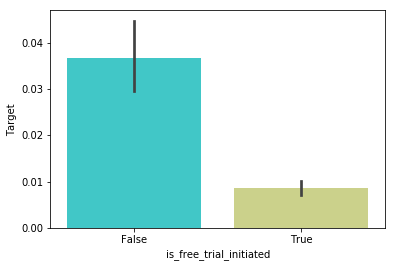

In [88]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
sns.barplot(x='is_free_trial_initiated',y=y,data=X_train,palette='rainbow')

In [121]:
X_train['contact_lead_source'].value_counts()  #Marketo Campaign,Salesforce Import,Paid Lead Source,www.infusionsoft.com,Referral - Partner,https://www.google.com/ 

Marketo Campaign                                                                                                                                                                                                                                                   13364
Salesforce Import                                                                                                                                                                                                                                                   2199
Paid Lead Source                                                                                                                                                                                                                                                    1124
www.infusionsoft.com                                                                                                                                                                                         

In [122]:
contact_lead_sourcelist=list(X_train['contact_lead_source'].unique())
contact_lead_sourcelist

['Marketo Campaign',
 'Drift',
 'www.infusionsoft.com',
 'Salesforce Import',
 'Referral - Partner',
 'display_google_freetrial~display-google-freetrial-sus-us~2018_smart-freetrial',
 'Paid Lead Source',
 'cpc_capterra_demo~capterra~2015-09-23_nb_',
 nan,
 'https://www.google.com/',
 'doubleyoursales.com',
 'https://www.google.it/',
 'Referral – Partner',
 'cpc_google_freetrial~brand-us~2017-07-24__infusion soft',
 'https://www.google.co.za/',
 'https://www.google.co.in/',
 'http://m.facebook.com',
 'https://www.infusionsoft.com/',
 'https://g46.infusiontest.com/app/base',
 'Free Trial',
 'https://www.google.ca/',
 'https://www.google.co.uk/',
 'http://www.growmycleaningcompany.com/how-to-market-a-cleaning-business/',
 'https://www.google.co.jp/',
 'Offline Chat',
 'display_google~display-google-freetrial-sus-us~2018',
 'Online Chat',
 'https://www.google.com.au/',
 'https://www.google.com.ph/',
 'Free Trial MMC Learning',
 'http://mailserver.infusionsoft.com/a0311l02gC0F00zBOLDXEHv',


In [123]:
len(contact_lead_sourcelist)

249

In [124]:
X_train['promo_customer']=X_train['promo_customer'].fillna("False")

X_train[catfreatures]=X_train[catfreatures].apply(lambda x:x.fillna('missing'))

X_train['contact_lead_source'].isna().sum()

0

In [125]:


# import re
# for each in X_train[['contact_lead_source']]:
#     each = each.lower()
#     if  each.find("demo") >0:
#          each = "demo"
def formatstringvalues(col):
    if col != "kickstart_owner_role":
        for idx, row in X_train.iterrows():
            value = str(X_train.loc[idx,col]).lower().strip()
            if (value.find("marketo") >=0) or (value.find("emailfooter") >=0):
                X_train.loc[idx,col] = "Marketo"

            elif (value.find("salesforce") >=0) or (value.find("paid lead source") >=0) or (value.find("drift") >=0) or (value.find("missing")>=0):
                continue
            elif (value.find("facebook")>=0) or (value.find("social")>=0):   
                X_train.loc[idx,col] = "social media"

            elif (value.find("infusionsoft")>=0) or  (value.find("demo")>=0) or (value.find("free")>=0) or (value.find("chat")>=0):
                X_train.loc[idx,col] = "infusionsoft"

            elif (value.find("google")>=0) or (value.find("bing")>=0) or (value.find("yahoo")>=0):
                X_train.loc[idx,col] = "searchengine"  

            elif (value.find("referral")>=0) or (value.find("partner")>=0):   
                X_train.loc[idx,col] = "referral"
            
            
            else:
                X_train.loc[idx,col] = "others"
    else:
        for idx, row in X_train.iterrows():
            value = str(X_train.loc[idx,col]).lower().strip()
            if (value.find("manager") >=0):
                X_train.loc[idx,col] = "Manager"
            elif (value.find("user") >=0):
                X_train.loc[idx,col] = "User"
            elif (value.find("consultant") >=0) or (value.find("coach")>=0):
                X_train.loc[idx,col] = "others"
                

In [126]:
formatstringvalues('contact_lead_source')


X_train['contact_lead_source'].value_counts()

Marketo              13373
Salesforce Import     2199
Paid Lead Source      1124
infusionsoft           724
searchengine           472
missing                379
referral               220
Drift                  143
social media            99
others                  71
Name: contact_lead_source, dtype: int64

In [127]:
formatstringvalues('lead_lead_source')

X_train['lead_lead_source'].value_counts()

infusionsoft    12713
missing          2551
Marketo          2280
social media      552
searchengine      333
others            264
referral          111
Name: lead_lead_source, dtype: int64

In [129]:
X_train.head()

free_email  CONTACTS_ADDED_AUTO  CONTACTS_ADDED_OTHER  \
7892        False                  0.0              0.071429   
15543        True                  0.0              0.142857   
21525        True                  0.0              0.000000   
16593        True                  0.0              0.071429   
8544        False                  0.0              0.461538   

       CONTACTS_UPDATED  CONTACT_GROUP_COUNT  FLOW_RECIPIENT_COUNT  \
7892           0.142857             0.357143                   0.0   
15543          0.214286             0.071429                   0.0   
21525          0.142857             0.071429                   0.0   
16593          0.142857             0.357143                   0.0   
8544           0.384615             0.230769                   0.0   

       GOAL_ACHIEVED_COUNT  LOGIN_COUNT  NUMCONTACTSCLICKED_AUTO  \
7892                   0.0     0.071429                      0.0   
15543                  0.0     0.142857                      0.0   
21525                  0.0     0.071429                      0.0   
16593                  0.0     0.071429                      0.0   
8544                   0.0     0.230769                      0.0   

       NUMCONTACTSCLICKED_MANUAL         ...           \
7892                         0.0         ...            
15543                        0.0         ...            
21525                        0.0         ...            
16593                        0.0         ...            
8544                         0.0         ...            

       in_trial_count_of_contacts_added         first_contact_on  \
7892                                2.0  2018-09-08 06:37:07 UTC   
15543                               3.0  2018-07-02 11:12:01 UTC   
21525                               NaN                      NaN   
16593                               2.0  2018-11-14 16:21:55 UTC   
8544                                3.0  2018-06-05 12:29:47 UTC   

               last_contact_on  in_trial_first_campaign_published_on  \
7892   2018-09-08 06:37:07 UTC                                   NaN   
15543  2018-07-12 06:53:04 UTC                                   NaN   
21525                      NaN                                   NaN   
16593  2018-11-14 16:21:55 UTC                                   NaN   
8544   2018-06-05 12:30:24 UTC                                   NaN   

       in_trial_last_campaign_published_on  \
7892                                   NaN   
15543                                  NaN   
21525                                  NaN   
16593                                  NaN   
8544                                   NaN   

       in_trial_count_of_published_campaigns  \
7892                                     NaN   
15543                                    NaN   
21525                                    NaN   
16593                                    NaN   
8544                                     NaN   

       in_trial_first_campaign_launched_on  \
7892                                   NaN   
15543                                  NaN   
21525                                  NaN   
16593                                  NaN   
8544                                   NaN   

       in_trial_last_campaign_launched_on  \
7892                                  NaN   
15543                                 NaN   
21525                                 NaN   
16593                                 NaN   
8544                                  NaN   

       in_trial_count_of_launched_campaigns       trial_end_date  
7892                                    NaN  2018-09-21 06:37:20  
15543                                   NaN  2018-07-15 11:12:12  
21525                                   NaN  2017-10-10 09:51:39  
16593                                   NaN  2018-11-27 16:22:33  
8544                                    NaN  2018-06-18 12:29:56  

[5 rows x 95 columns]

In [98]:
#X_train['kickstart_owner_role'].value_counts()

missing    18744
Manager       29
User          29
others         2
Name: kickstart_owner_role, dtype: int64

In [130]:

for c in catfreatures:
    print("----------")
    print(c,"----",X_train[c].nunique())

----------
free_email ---- 2
----------
opportunity_stage_name ---- 3
----------
opportunity_owner_name ---- 33
----------
is_free_trial_initiated ---- 2
----------
contact_lead_source ---- 10
----------
contact_phase ---- 16
----------
lead_lead_source ---- 7
----------
cancel_eligible ---- 3
----------
contract_status ---- 4
----------
edition_category ---- 10
----------
promo_customer ---- 2


In [131]:
X_train.isna().sum()*100/X_train.shape[0]

free_email                                 0.000000
CONTACTS_ADDED_AUTO                        0.000000
CONTACTS_ADDED_OTHER                       0.000000
CONTACTS_UPDATED                           0.000000
CONTACT_GROUP_COUNT                        0.000000
FLOW_RECIPIENT_COUNT                       0.000000
GOAL_ACHIEVED_COUNT                        0.000000
LOGIN_COUNT                                0.000000
NUMCONTACTSCLICKED_AUTO                    0.000000
NUMCONTACTSCLICKED_MANUAL                  0.000000
NUMCONTACTSOPENED_AUTO                     0.000000
NUMCONTACTSOPENED_AUTO_SYSTEM              0.000000
NUMCONTACTSOPENED_MANUAL                   0.000000
NUMCONTACTSSENT_AUTO                       0.000000
NUMCONTACTSSENT_AUTO_SYSTEM                0.000000
NUMCONTACTSSENT_MANUAL                     0.000000
NUMCONTACTS_RECEIVED                       0.000000
NUMEMAILSCLICKED_AUTO                      0.000000
NUMEMAILSCLICKED_MANUAL                    0.000000
NUMEMAILSCLI

In [132]:
columns = X_train.columns
percent_missing = X_train.isna().sum() * 100 / len(X_train)
missing_value_X_train = pd.DataFrame({'column_name': columns,
                                 'percent_missing': percent_missing})

In [133]:
missing_value_X_train[missing_value_X_train['percent_missing']>90.0]

column_name  \
opportunity_demo_date                                  opportunity_demo_date   
new_customer_date                                          new_customer_date   
start_date                                                        start_date   
sales_cohort_date                                          sales_cohort_date   
paying_customer_date                                    paying_customer_date   
in_trial_total_emails_sent                        in_trial_total_emails_sent   
in_trial_first_campaign_published_on    in_trial_first_campaign_published_on   
in_trial_last_campaign_published_on      in_trial_last_campaign_published_on   
in_trial_count_of_published_campaigns  in_trial_count_of_published_campaigns   
in_trial_first_campaign_launched_on      in_trial_first_campaign_launched_on   
in_trial_last_campaign_launched_on        in_trial_last_campaign_launched_on   
in_trial_count_of_launched_campaigns    in_trial_count_of_launched_campaigns   

                                       percent_missing  
opportunity_demo_date                        99.888322  
new_customer_date                            98.830036  
start_date                                   98.830036  
sales_cohort_date                            98.782174  
paying_customer_date                         98.782174  
in_trial_total_emails_sent                   99.452244  
in_trial_first_campaign_published_on         95.756222  
in_trial_last_campaign_published_on          95.756222  
in_trial_count_of_published_campaigns        95.240374  
in_trial_first_campaign_launched_on          99.936184  
in_trial_last_campaign_launched_on           99.936184  
in_trial_count_of_launched_campaigns         95.240374

In [134]:
X_train['edition_category'].value_counts()

missing         18575
New UI            146
Starter            36
Classic UI         19
Complete           10
Essentials          8
Plus                5
Standard            2
New 2019            2
Deluxe Sales        1
Name: edition_category, dtype: int64

In [137]:
X_train['opportunity_owner_name'].value_counts()

missing                 18690
Ryan Vincent               17
April Branger              12
Marc Weitzell              10
Colin Neal                  7
Amanda Purcell              6
Jonathan Trigg              4
Joe Turney                  4
Michael Rogan               4
Frank Gittens               4
Dudley Rolle                4
Krysti Morales              4
Emily Duffy                 3
Samantha Quimby             3
Greg Bird                   3
Shaun Sherrard              3
Bryan Hangartner            2
Eric Jacobs                 2
Jordan Smith                2
Stacy Cheney-Jamison        2
Sarah Kelley                2
Jeremiah Bishop             2
Jeremy Weber                2
Jesse Hallock               2
Brad Luna                   2
Carmen Campbell             1
James Allen                 1
Lindsey Kokosh              1
Tyler McCullen              1
Kofi Gyawu                  1
Tylor Tuttle                1
Scott Lougee                1
Jason Whisenhunt            1
Name: oppo

In [136]:
X_train[catfreatures].isna().sum()/X_train.shape[0]

free_email                 0.0
opportunity_stage_name     0.0
opportunity_owner_name     0.0
is_free_trial_initiated    0.0
contact_lead_source        0.0
contact_phase              0.0
lead_lead_source           0.0
cancel_eligible            0.0
contract_status            0.0
edition_category           0.0
promo_customer             0.0
dtype: float64

In [107]:

# for c in newcatfreatures:
#     print("----------")
#     print(c,"----",X_train[c].nunique())

In [139]:
datefeatures1=['opportunity_demo_date','trial_date','lead_converted_date','new_customer_date','start_date','sales_cohort_date','paying_customer_date','in_trial_first_email_date','in_trial_last_email_date','first_login_on','second_login','first_contact_on','last_contact_on',
                'in_trial_first_campaign_published_on','in_trial_last_campaign_published_on','in_trial_first_campaign_launched_on','in_trial_last_campaign_launched_on',
                'trial_end_date']
for c in datefeatures1:
    print("----------")
    print(c,"----",X_train[c].dtype)

----------
opportunity_demo_date ---- object
----------
trial_date ---- object
----------
lead_converted_date ---- object
----------
new_customer_date ---- object
----------
start_date ---- object
----------
sales_cohort_date ---- object
----------
paying_customer_date ---- object
----------
in_trial_first_email_date ---- object
----------
in_trial_last_email_date ---- object
----------
first_login_on ---- object
----------
second_login ---- object
----------
first_contact_on ---- object
----------
last_contact_on ---- object
----------
in_trial_first_campaign_published_on ---- object
----------
in_trial_last_campaign_published_on ---- object
----------
in_trial_first_campaign_launched_on ---- object
----------
in_trial_last_campaign_launched_on ---- object
----------
trial_end_date ---- object


In [140]:


X_train[datefeatures1].isna().sum()/X_train.shape[0]



opportunity_demo_date                   0.998883
trial_date                              0.000000
lead_converted_date                     0.011700
new_customer_date                       0.988300
start_date                              0.988300
sales_cohort_date                       0.987822
paying_customer_date                    0.987822
in_trial_first_email_date               0.641778
in_trial_last_email_date                0.641778
first_login_on                          0.184748
second_login                            0.692087
first_contact_on                        0.144810
last_contact_on                         0.144810
in_trial_first_campaign_published_on    0.957562
in_trial_last_campaign_published_on     0.957562
in_trial_first_campaign_launched_on     0.999362
in_trial_last_campaign_launched_on      0.999362
trial_end_date                          0.000000
dtype: float64

In [141]:
X_train[datefeatures1].head()

opportunity_demo_date           trial_date      lead_converted_date  \
7892                    NaN  2018-09-08 06:37:20  2018-09-07 00:00:00 UTC   
15543                   NaN  2018-07-02 11:12:12  2018-07-02 00:00:00 UTC   
21525                   NaN  2017-09-27 09:51:39  2017-09-27 00:00:00 UTC   
16593                   NaN  2018-11-14 16:22:33  2018-11-14 00:00:00 UTC   
8544                    NaN  2018-06-05 12:29:56  2018-06-05 00:00:00 UTC   

      new_customer_date start_date sales_cohort_date paying_customer_date  \
7892                NaN        NaN               NaN                  NaN   
15543               NaN        NaN               NaN                  NaN   
21525               NaN        NaN               NaN                  NaN   
16593               NaN        NaN               NaN                  NaN   
8544                NaN        NaN               NaN                  NaN   

      in_trial_first_email_date in_trial_last_email_date  \
7892                        NaN                      NaN   
15543                       NaN                      NaN   
21525                       NaN                      NaN   
16593                       NaN                      NaN   
8544                        NaN                      NaN   

                first_login_on             second_login  \
7892   2018-09-08 06:37:22 UTC                      NaN   
15543  2018-07-02 11:12:22 UTC                      NaN   
21525  2017-09-27 09:53:30 UTC                      NaN   
16593  2018-11-14 16:25:55 UTC                      NaN   
8544   2018-06-05 12:30:02 UTC  2018-06-08 07:55:32 UTC   

              first_contact_on          last_contact_on  \
7892   2018-09-08 06:37:07 UTC  2018-09-08 06:37:07 UTC   
15543  2018-07-02 11:12:01 UTC  2018-07-12 06:53:04 UTC   
21525                      NaN                      NaN   
16593  2018-11-14 16:21:55 UTC  2018-11-14 16:21:55 UTC   
8544   2018-06-05 12:29:47 UTC  2018-06-05 12:30:24 UTC   

      in_trial_first_campaign_published_on  \
7892                                   NaN   
15543                                  NaN   
21525                                  NaN   
16593                                  NaN   
8544                                   NaN   

      in_trial_last_campaign_published_on in_trial_first_campaign_launched_on  \
7892                                  NaN                                 NaN   
15543                                 NaN                                 NaN   
21525                                 NaN                                 NaN   
16593                                 NaN                                 NaN   
8544                                  NaN                                 NaN   

      in_trial_last_campaign_launched_on       trial_end_date  
7892                                 NaN  2018-09-21 06:37:20  
15543                                NaN  2018-07-15 11:12:12  
21525                                NaN  2017-10-10 09:51:39  
16593                                NaN  2018-11-27 16:22:33  
8544                                 NaN  2018-06-18 12:29:56

In [142]:

from datetime import datetime

#X_train[datefeatures].apply(pd.to_datetime())
date_format = "%m/%d/%Y"
for c in datefeatures1:
    print("----------")
    X_train[c] = pd.to_datetime(X_train[c])
    #X_train[c] = datetime.strptime(X_train[c], date_format)
    #X_train[c] =  X_train[c].apply(lambda x: datetime.strptime(x, date_format))


----------
----------
----------
----------
----------
----------
----------
----------
----------
----------
----------
----------
----------
----------
----------
----------
----------
----------


In [143]:
X_train[datefeatures1]

opportunity_demo_date          trial_date lead_converted_date  \
7892                    NaT 2018-09-08 06:37:20          2018-09-07   
15543                   NaT 2018-07-02 11:12:12          2018-07-02   
21525                   NaT 2017-09-27 09:51:39          2017-09-27   
16593                   NaT 2018-11-14 16:22:33          2018-11-14   
8544                    NaT 2018-06-05 12:29:56          2018-06-05   
3573                    NaT 2018-01-13 05:08:48          2018-01-13   
16242                   NaT 2018-11-30 16:51:14          2018-11-30   
20772                   NaT 2018-05-17 16:03:58          2018-05-17   
22492                   NaT 2018-10-06 09:22:02          2018-07-18   
17455                   NaT 2018-03-19 17:01:34          2018-03-19   
10048                   NaT 2018-10-08 21:26:37          2018-10-08   
8277                    NaT 2018-08-23 23:16:35          2018-08-23   
17668                   NaT 2018-12-02 17:35:10          2018-12-02   
7926                    NaT 2018-08-06 11:38:34          2018-08-06   
6958                    NaT 2018-06-26 18:26:53          2018-06-26   
8755                    NaT 2018-09-26 16:45:34          2018-09-26   
13302                   NaT 2018-03-16 00:54:26          2018-03-16   
14747                   NaT 2018-09-18 08:00:53          2018-09-18   
20873                   NaT 2018-08-12 22:26:21          2018-08-12   
6788                    NaT 2018-08-07 23:59:22          2018-08-07   
7377                    NaT 2018-07-05 23:38:02          2018-07-05   
23105                   NaT 2018-05-22 11:21:58          2018-05-22   
14638                   NaT 2018-10-21 17:14:32          2018-10-21   
22356                   NaT 2018-11-09 19:34:10          2018-11-09   
1366                    NaT 2018-05-28 17:17:30          2018-05-28   
10106                   NaT 2018-07-26 10:51:06          2018-07-26   
15679                   NaT 2017-10-26 20:20:56          2017-10-26   
17109                   NaT 2018-11-07 00:23:20          2018-11-06   
22361                   NaT 2018-12-02 16:39:19          2018-12-02   
11316                   NaT 2018-08-31 07:43:18          2018-08-31   
...                     ...                 ...                 ...   
6285                    NaT 2017-08-06 20:53:04          2017-08-06   
1110                    NaT 2018-08-10 23:54:49          2018-08-10   
18272                   NaT 2018-05-21 16:55:59          2018-05-21   
11742                   NaT 2018-09-20 00:21:14          2018-09-19   
17137                   NaT 2018-10-30 15:49:14          2018-10-30   
19433                   NaT 2018-08-24 08:29:28          2018-08-24   
16946                   NaT 2018-03-06 17:00:26          2018-03-06   
22926                   NaT 2018-04-04 11:39:56          2018-04-04   
4764                    NaT 2018-04-23 09:22:56          2018-04-23   
19946                   NaT 2018-05-18 00:31:24          2017-06-12   
8444                    NaT 2018-07-16 12:52:57          2018-07-16   
18900                   NaT 2018-11-18 15:14:55          2018-11-18   
2962                    NaT 2018-09-07 10:07:29          2018-09-07   
12645                   NaT 2018-03-18 02:46:34          2018-03-18   
21758                   NaT 2018-12-02 11:33:46          2018-12-02   
21780                   NaT 2018-09-19 13:40:19          2018-09-19   
3462                    NaT 2017-12-12 12:11:09          2017-12-12   
10989                   NaT 2018-08-18 13:39:10          2018-08-18   
7751                    NaT 2018-04-26 18:12:22          2018-04-26   
16332                   NaT 2018-06-05 00:59:31          2018-06-05   
20609                   NaT 2017-08-01 13:16:58          2017-08-03   
144                     NaT 2018-09-26 19:19:31          2018-09-26   
21440                   NaT 2018-05-30 10:24:29          2018-05-30   
19279                   NaT 2018-09-08 00:14:23          2018-09-07   
7813                    NaT 20

In [144]:
def calnumberofdays(datevalue):
    return (X_train[datevalue].dt.date-X_train['trial_date'].dt.date).dt.days


X_train['ndays_convert']=calnumberofdays('lead_converted_date')

X_train['ndays_first_email']=calnumberofdays('in_trial_first_email_date')

X_train['ndays_last_email'] = calnumberofdays('in_trial_last_email_date')

X_train['ndays_first_login'] =calnumberofdays('first_login_on')

X_train['ndays_second_login'] = calnumberofdays('second_login')

X_train['ndays_firstcontact']= calnumberofdays('first_contact_on')

X_train['ndays_lastcontacton'] = calnumberofdays('last_contact_on')

X_train['ndays_first_campaign_pub'] = calnumberofdays('in_trial_first_campaign_published_on')

X_train['ndays_last_campaign_pub'] = calnumberofdays('in_trial_last_campaign_published_on')

X_train['ndays_first_campaign_launch'] = calnumberofdays('in_trial_first_campaign_launched_on')

X_train['ndays_last_campaign_launch'] = calnumberofdays('in_trial_last_campaign_launched_on')


In [145]:
datefeatures = ['opportunity_demo_date','trial_date','lead_converted_date','new_customer_date','start_date','sales_cohort_date','paying_customer_date',
                'in_trial_first_email_date','in_trial_last_email_date','first_login_on','second_login','first_contact_on','last_contact_on',
                'in_trial_first_campaign_published_on','in_trial_last_campaign_published_on','in_trial_first_campaign_launched_on','in_trial_last_campaign_launched_on',
                'trial_end_date','ndays_convert','ndays_first_email','ndays_last_email','ndays_first_login','ndays_second_login',
               'ndays_firstcontact','ndays_lastcontacton','ndays_first_campaign_pub','ndays_last_campaign_pub','ndays_first_campaign_launch',
               'ndays_last_campaign_launch']

X_train[datefeatures]

opportunity_demo_date          trial_date lead_converted_date  \
7892                    NaT 2018-09-08 06:37:20          2018-09-07   
15543                   NaT 2018-07-02 11:12:12          2018-07-02   
21525                   NaT 2017-09-27 09:51:39          2017-09-27   
16593                   NaT 2018-11-14 16:22:33          2018-11-14   
8544                    NaT 2018-06-05 12:29:56          2018-06-05   
3573                    NaT 2018-01-13 05:08:48          2018-01-13   
16242                   NaT 2018-11-30 16:51:14          2018-11-30   
20772                   NaT 2018-05-17 16:03:58          2018-05-17   
22492                   NaT 2018-10-06 09:22:02          2018-07-18   
17455                   NaT 2018-03-19 17:01:34          2018-03-19   
10048                   NaT 2018-10-08 21:26:37          2018-10-08   
8277                    NaT 2018-08-23 23:16:35          2018-08-23   
17668                   NaT 2018-12-02 17:35:10          2018-12-02   
7926                    NaT 2018-08-06 11:38:34          2018-08-06   
6958                    NaT 2018-06-26 18:26:53          2018-06-26   
8755                    NaT 2018-09-26 16:45:34          2018-09-26   
13302                   NaT 2018-03-16 00:54:26          2018-03-16   
14747                   NaT 2018-09-18 08:00:53          2018-09-18   
20873                   NaT 2018-08-12 22:26:21          2018-08-12   
6788                    NaT 2018-08-07 23:59:22          2018-08-07   
7377                    NaT 2018-07-05 23:38:02          2018-07-05   
23105                   NaT 2018-05-22 11:21:58          2018-05-22   
14638                   NaT 2018-10-21 17:14:32          2018-10-21   
22356                   NaT 2018-11-09 19:34:10          2018-11-09   
1366                    NaT 2018-05-28 17:17:30          2018-05-28   
10106                   NaT 2018-07-26 10:51:06          2018-07-26   
15679                   NaT 2017-10-26 20:20:56          2017-10-26   
17109                   NaT 2018-11-07 00:23:20          2018-11-06   
22361                   NaT 2018-12-02 16:39:19          2018-12-02   
11316                   NaT 2018-08-31 07:43:18          2018-08-31   
...                     ...                 ...                 ...   
6285                    NaT 2017-08-06 20:53:04          2017-08-06   
1110                    NaT 2018-08-10 23:54:49          2018-08-10   
18272                   NaT 2018-05-21 16:55:59          2018-05-21   
11742                   NaT 2018-09-20 00:21:14          2018-09-19   
17137                   NaT 2018-10-30 15:49:14          2018-10-30   
19433                   NaT 2018-08-24 08:29:28          2018-08-24   
16946                   NaT 2018-03-06 17:00:26          2018-03-06   
22926                   NaT 2018-04-04 11:39:56          2018-04-04   
4764                    NaT 2018-04-23 09:22:56          2018-04-23   
19946                   NaT 2018-05-18 00:31:24          2017-06-12   
8444                    NaT 2018-07-16 12:52:57          2018-07-16   
18900                   NaT 2018-11-18 15:14:55          2018-11-18   
2962                    NaT 2018-09-07 10:07:29          2018-09-07   
12645                   NaT 2018-03-18 02:46:34          2018-03-18   
21758                   NaT 2018-12-02 11:33:46          2018-12-02   
21780                   NaT 2018-09-19 13:40:19          2018-09-19   
3462                    NaT 2017-12-12 12:11:09          2017-12-12   
10989                   NaT 2018-08-18 13:39:10          2018-08-18   
7751                    NaT 2018-04-26 18:12:22          2018-04-26   
16332                   NaT 2018-06-05 00:59:31          2018-06-05   
20609                   NaT 2017-08-01 13:16:58          2017-08-03   
144                     NaT 2018-09-26 19:19:31          2018-09-26   
21440                   NaT 2018-05-30 10:24:29          2018-05-30   
19279                   NaT 2018-09-08 00:14:23          2018-09-07   
7813                    NaT 20

In [146]:


X_train.drop(['opportunity_demo_date','lead_converted_date','new_customer_date','start_date','sales_cohort_date','paying_customer_date',
             'in_trial_first_email_date','in_trial_last_email_date','first_login_on','second_login','first_contact_on','last_contact_on',
                'in_trial_first_campaign_published_on','in_trial_last_campaign_published_on','in_trial_first_campaign_launched_on','in_trial_last_campaign_launched_on'],axis=1,inplace=True)





In [147]:

newdatefeatures= ['ndays_convert','ndays_first_email','ndays_last_email','ndays_first_login','ndays_second_login',
               'ndays_firstcontact','ndays_lastcontacton','ndays_first_campaign_pub','ndays_last_campaign_pub','ndays_first_campaign_launch',
               'ndays_last_campaign_launch']

X_train[newdatefeatures]

ndays_convert  ndays_first_email  ndays_last_email  ndays_first_login  \
7892            -1.0                NaN               NaN                0.0   
15543            0.0                NaN               NaN                0.0   
21525            0.0                NaN               NaN                0.0   
16593            0.0                NaN               NaN                0.0   
8544             0.0                NaN               NaN                0.0   
3573             0.0                NaN               NaN                0.0   
16242            0.0                NaN               NaN                NaN   
20772            0.0                0.0               0.0                NaN   
22492          -80.0                0.0               0.0                0.0   
17455            0.0                NaN               NaN                NaN   
10048            0.0                0.0               0.0                0.0   
8277             0.0                NaN               NaN                0.0   
17668            0.0                NaN               NaN                NaN   
7926             0.0                NaN               NaN                0.0   
6958             0.0                NaN               NaN                0.0   
8755             0.0                0.0               0.0                0.0   
13302            0.0                NaN               NaN                0.0   
14747            0.0                0.0               0.0                0.0   
20873            0.0                NaN               NaN                0.0   
6788             0.0                NaN               NaN                0.0   
7377             0.0                NaN               NaN                0.0   
23105            0.0                0.0               0.0                0.0   
14638            0.0                NaN               NaN                0.0   
22356            0.0                NaN               NaN                0.0   
1366             0.0                NaN               NaN                0.0   
10106            0.0                NaN               NaN                0.0   
15679            0.0                NaN               NaN                0.0   
17109           -1.0               -1.0              12.0                0.0   
22361            0.0                NaN               NaN                NaN   
11316            0.0                NaN               NaN                0.0   
...              ...                ...               ...                ...   
6285             0.0                NaN               NaN                NaN   
1110             0.0                NaN               NaN                0.0   
18272            0.0                0.0               0.0                0.0   
11742           -1.0                0.0               0.0                0.0   
17137            0.0                NaN               NaN                0.0   
19433            0.0                0.0               0.0                0.0   
16946            0.0                NaN               NaN                0.0   
22926            0.0                0.0               0.0                0.0   
4764             0.0                0.0               8.0                0.0   
19946         -340.0               -1.0              -1.0                0.0   
8444             0.0                NaN               NaN                0.0   
18900            0.0                NaN               NaN                NaN   
2962             0.0                NaN               NaN                0.0   
12645            0.0                NaN               NaN                0.0   
21758            0.0                NaN               NaN                NaN   
21780            0.0                NaN               NaN                0.0   
3462             0.0                NaN               NaN                0.0   
10989            0.0                NaN               NaN                0.0   
7751   

In [151]:
X_train[X_train['ndays_first_email']<0] ##-- returning customer

free_email  CONTACTS_ADDED_AUTO  CONTACTS_ADDED_OTHER  \
17109       False             0.000000              5.642857   
7122        False             0.076923              0.538462   
23298        True             0.142857              0.000000   
19769       False             0.000000              0.071429   
12186       False             0.000000              0.000000   
7832         True             0.000000              0.000000   
11792        True             0.000000              1.428571   
16329        True             0.500000              0.142857   
14303        True             0.214286              0.285714   
11343        True             7.000000             26.642857   
12827       False             0.071429              0.071429   
6560         True             0.000000              0.214286   
14823       False             0.000000              0.142857   
20470        True             0.000000              0.142857   
21229        True             0.000000              0.214286   
14500       False             0.000000              0.071429   
23349        True             0.000000              0.571429   
23114       False             0.214286           1751.857143   
4530        False             0.000000              0.142857   
12355       False             0.000000              0.071429   
15599       False             0.142857              0.071429   
13086        True             0.000000              0.357143   
13888       False             0.000000              0.071429   
6631         True             0.000000              0.357143   
3656         True             0.000000              0.285714   
18291       False             0.000000              0.071429   
764          True             0.000000              0.142857   
5567        False             0.000000              0.142857   
2577         True             0.000000              0.571429   
4180         True             0.142857              0.214286   
...           ...                  ...                   ...   
13810        True             0.357143              0.071429   
8694         True             0.000000              0.071429   
723          True             0.000000              0.285714   
8235        False             0.000000              0.214286   
20800       False             0.000000              0.071429   
13656       False             0.000000              0.142857   
10975        True             0.000000              0.071429   
6942        False             0.000000              0.000000   
61           True             0.000000              0.071429   
4456        False             0.000000              0.071429   
2180         True             0.285714              0.071429   
13882        True             0.000000             28.000000   
17042       False             0.285714              0.071429   
6151        False             0.000000              0.285714   
4763         True             0.000000              0.142857   
16903       False             0.000000              0.000000   
20118       False             0.214286              0.000000   
4946         True             0.000000              0.142857   
15868        True             0.000000             12.076923   
10921       False             0.214286              0.000000   
2499         True             4.357143             28.928571   
12578        True             0.000000              0.214286   
13448       False             0.000000              0.142857   
17227       False             0.000000              0.214286   
14178       False             0.071429              0.142857   
5848        False             0.071429              0.285714   
431         False             0.000000              0.142857   
6771         True             0.000000              0.500000   
22505       False             0.000000             24.357143   
19946       False             0.000000              0.214286   

       CONTACTS_UPDATED  CONTACT_GROUP

In [152]:
X_train['trial_qtr']=X_train['trial_date'].dt.quarter

# import calendar
# X_train['trial_month'] = X_train['trial_month'].apply(lambda x: calendar.month_abbr[x])



In [153]:
X_train['trial_weekday'] = X_train['trial_date'].dt.weekday_name

In [154]:
X_train['ndays_intrial'] = calnumberofdays('trial_end_date')

newdatefeatures= ['ndays_convert','ndays_first_email','ndays_last_email','ndays_first_login','ndays_second_login',
               'ndays_firstcontact','ndays_lastcontacton','ndays_first_campaign_pub','ndays_last_campaign_pub','ndays_first_campaign_launch',
               'ndays_last_campaign_launch','trial_weekday','ndays_intrial','trial_qtr']

X_train[newdatefeatures]

ndays_convert  ndays_first_email  ndays_last_email  ndays_first_login  \
7892            -1.0                NaN               NaN                0.0   
15543            0.0                NaN               NaN                0.0   
21525            0.0                NaN               NaN                0.0   
16593            0.0                NaN               NaN                0.0   
8544             0.0                NaN               NaN                0.0   
3573             0.0                NaN               NaN                0.0   
16242            0.0                NaN               NaN                NaN   
20772            0.0                0.0               0.0                NaN   
22492          -80.0                0.0               0.0                0.0   
17455            0.0                NaN               NaN                NaN   
10048            0.0                0.0               0.0                0.0   
8277             0.0                NaN               NaN                0.0   
17668            0.0                NaN               NaN                NaN   
7926             0.0                NaN               NaN                0.0   
6958             0.0                NaN               NaN                0.0   
8755             0.0                0.0               0.0                0.0   
13302            0.0                NaN               NaN                0.0   
14747            0.0                0.0               0.0                0.0   
20873            0.0                NaN               NaN                0.0   
6788             0.0                NaN               NaN                0.0   
7377             0.0                NaN               NaN                0.0   
23105            0.0                0.0               0.0                0.0   
14638            0.0                NaN               NaN                0.0   
22356            0.0                NaN               NaN                0.0   
1366             0.0                NaN               NaN                0.0   
10106            0.0                NaN               NaN                0.0   
15679            0.0                NaN               NaN                0.0   
17109           -1.0               -1.0              12.0                0.0   
22361            0.0                NaN               NaN                NaN   
11316            0.0                NaN               NaN                0.0   
...              ...                ...               ...                ...   
6285             0.0                NaN               NaN                NaN   
1110             0.0                NaN               NaN                0.0   
18272            0.0                0.0               0.0                0.0   
11742           -1.0                0.0               0.0                0.0   
17137            0.0                NaN               NaN                0.0   
19433            0.0                0.0               0.0                0.0   
16946            0.0                NaN               NaN                0.0   
22926            0.0                0.0               0.0                0.0   
4764             0.0                0.0               8.0                0.0   
19946         -340.0               -1.0              -1.0                0.0   
8444             0.0                NaN               NaN                0.0   
18900            0.0                NaN               NaN                NaN   
2962             0.0                NaN               NaN                0.0   
12645            0.0                NaN               NaN                0.0   
21758            0.0                NaN               NaN                NaN   
21780            0.0                NaN               NaN                0.0   
3462             0.0                NaN               NaN                0.0   
10989            0.0                NaN               NaN                0.0   
7751   

In [155]:
X_train.head()

free_email  CONTACTS_ADDED_AUTO  CONTACTS_ADDED_OTHER  \
7892        False                  0.0              0.071429   
15543        True                  0.0              0.142857   
21525        True                  0.0              0.000000   
16593        True                  0.0              0.071429   
8544        False                  0.0              0.461538   

       CONTACTS_UPDATED  CONTACT_GROUP_COUNT  FLOW_RECIPIENT_COUNT  \
7892           0.142857             0.357143                   0.0   
15543          0.214286             0.071429                   0.0   
21525          0.142857             0.071429                   0.0   
16593          0.142857             0.357143                   0.0   
8544           0.384615             0.230769                   0.0   

       GOAL_ACHIEVED_COUNT  LOGIN_COUNT  NUMCONTACTSCLICKED_AUTO  \
7892                   0.0     0.071429                      0.0   
15543                  0.0     0.142857                      0.0   
21525                  0.0     0.071429                      0.0   
16593                  0.0     0.071429                      0.0   
8544                   0.0     0.230769                      0.0   

       NUMCONTACTSCLICKED_MANUAL      ...        ndays_second_login  \
7892                         0.0      ...                       NaN   
15543                        0.0      ...                       NaN   
21525                        0.0      ...                       NaN   
16593                        0.0      ...                       NaN   
8544                         0.0      ...                       3.0   

       ndays_firstcontact  ndays_lastcontacton  ndays_first_campaign_pub  \
7892                  0.0                  0.0                       NaN   
15543                 0.0                 10.0                       NaN   
21525                 NaN                  NaN                       NaN   
16593                 0.0                  0.0                       NaN   
8544                  0.0                  0.0                       NaN   

       ndays_last_campaign_pub  ndays_first_campaign_launch  \
7892                       NaN                          NaN   
15543                      NaN                          NaN   
21525                      NaN                          NaN   
16593                      NaN                          NaN   
8544                       NaN                          NaN   

       ndays_last_campaign_launch  trial_qtr  trial_weekday  ndays_intrial  
7892                          NaN          3       Saturday             13  
15543                         NaN          3         Monday             13  
21525                         NaN          3      Wednesday             13  
16593                         NaN          4      Wednesday             13  
8544                          NaN          2        Tuesday             13  

[5 rows x 93 columns]

In [156]:
X_train.drop(['trial_date','trial_end_date'],axis=1,inplace=True)

In [157]:
X_train.columns

Index(['free_email', 'CONTACTS_ADDED_AUTO', 'CONTACTS_ADDED_OTHER',
       'CONTACTS_UPDATED', 'CONTACT_GROUP_COUNT', 'FLOW_RECIPIENT_COUNT',
       'GOAL_ACHIEVED_COUNT', 'LOGIN_COUNT', 'NUMCONTACTSCLICKED_AUTO',
       'NUMCONTACTSCLICKED_MANUAL', 'NUMCONTACTSOPENED_AUTO',
       'NUMCONTACTSOPENED_AUTO_SYSTEM', 'NUMCONTACTSOPENED_MANUAL',
       'NUMCONTACTSSENT_AUTO', 'NUMCONTACTSSENT_AUTO_SYSTEM',
       'NUMCONTACTSSENT_MANUAL', 'NUMCONTACTS_RECEIVED',
       'NUMEMAILSCLICKED_AUTO', 'NUMEMAILSCLICKED_MANUAL',
       'NUMEMAILSCLICKED_NULL', 'NUMEMAILSOPENED_AUTO',
       'NUMEMAILSOPENED_AUTO_SYSTEM', 'NUMEMAILSOPENED_MANUAL',
       'NUMEMAILSOPENED_NULL', 'NUMEMAILSSENT_AUTO',
       'NUMEMAILSSENT_AUTO_SYSTEM', 'NUMEMAILSSENT_MANUAL',
       'NUMEMAILS_RECEIVED', 'NUM_CONTACTS', 'PROCESSED_FLOW_ITEM_COUNT',
       'SYSTEM_EMAIL_CLK_COUNT', 'TOTAL_CONTACTS_ADDED_AUTO',
       'TOTAL_CONTACTS_ADDED_OTHER', 'USER_LOGINS', 'WEBFORM_COUNT',
       'WEBFORM_NEW_CONTACTS', 'WEBFORM_

In [158]:
X_train.head()

free_email  CONTACTS_ADDED_AUTO  CONTACTS_ADDED_OTHER  \
7892        False                  0.0              0.071429   
15543        True                  0.0              0.142857   
21525        True                  0.0              0.000000   
16593        True                  0.0              0.071429   
8544        False                  0.0              0.461538   

       CONTACTS_UPDATED  CONTACT_GROUP_COUNT  FLOW_RECIPIENT_COUNT  \
7892           0.142857             0.357143                   0.0   
15543          0.214286             0.071429                   0.0   
21525          0.142857             0.071429                   0.0   
16593          0.142857             0.357143                   0.0   
8544           0.384615             0.230769                   0.0   

       GOAL_ACHIEVED_COUNT  LOGIN_COUNT  NUMCONTACTSCLICKED_AUTO  \
7892                   0.0     0.071429                      0.0   
15543                  0.0     0.142857                      0.0   
21525                  0.0     0.071429                      0.0   
16593                  0.0     0.071429                      0.0   
8544                   0.0     0.230769                      0.0   

       NUMCONTACTSCLICKED_MANUAL      ...        ndays_second_login  \
7892                         0.0      ...                       NaN   
15543                        0.0      ...                       NaN   
21525                        0.0      ...                       NaN   
16593                        0.0      ...                       NaN   
8544                         0.0      ...                       3.0   

       ndays_firstcontact  ndays_lastcontacton  ndays_first_campaign_pub  \
7892                  0.0                  0.0                       NaN   
15543                 0.0                 10.0                       NaN   
21525                 NaN                  NaN                       NaN   
16593                 0.0                  0.0                       NaN   
8544                  0.0                  0.0                       NaN   

       ndays_last_campaign_pub  ndays_first_campaign_launch  \
7892                       NaN                          NaN   
15543                      NaN                          NaN   
21525                      NaN                          NaN   
16593                      NaN                          NaN   
8544                       NaN                          NaN   

       ndays_last_campaign_launch  trial_qtr  trial_weekday  ndays_intrial  
7892                          NaN          3       Saturday             13  
15543                         NaN          3         Monday             13  
21525                         NaN          3      Wednesday             13  
16593                         NaN          4      Wednesday             13  
8544                          NaN          2        Tuesday             13  

[5 rows x 91 columns]

In [159]:
X_train.dtypes.groupby(X_train.dtypes).size()

bool        2
int64       2
float64    77
object     10
dtype: int64

In [160]:
dtypes = pd.DataFrame(X_train.dtypes.rename('type')).reset_index().astype('str')

numeric = dtypes[(dtypes.type.isin(['int64', 'float64']))]['index'].values
categorical = dtypes[~(dtypes['index'].isin(numeric))]['index'].values

In [161]:
print('Numeric:\n', numeric)
print('Categorical:\n', categorical)

Numeric:
 ['CONTACTS_ADDED_AUTO' 'CONTACTS_ADDED_OTHER' 'CONTACTS_UPDATED'
 'CONTACT_GROUP_COUNT' 'FLOW_RECIPIENT_COUNT' 'GOAL_ACHIEVED_COUNT'
 'LOGIN_COUNT' 'NUMCONTACTSCLICKED_AUTO' 'NUMCONTACTSCLICKED_MANUAL'
 'NUMCONTACTSOPENED_AUTO' 'NUMCONTACTSOPENED_AUTO_SYSTEM'
 'NUMCONTACTSOPENED_MANUAL' 'NUMCONTACTSSENT_AUTO'
 'NUMCONTACTSSENT_AUTO_SYSTEM' 'NUMCONTACTSSENT_MANUAL'
 'NUMCONTACTS_RECEIVED' 'NUMEMAILSCLICKED_AUTO' 'NUMEMAILSCLICKED_MANUAL'
 'NUMEMAILSCLICKED_NULL' 'NUMEMAILSOPENED_AUTO'
 'NUMEMAILSOPENED_AUTO_SYSTEM' 'NUMEMAILSOPENED_MANUAL'
 'NUMEMAILSOPENED_NULL' 'NUMEMAILSSENT_AUTO' 'NUMEMAILSSENT_AUTO_SYSTEM'
 'NUMEMAILSSENT_MANUAL' 'NUMEMAILS_RECEIVED' 'NUM_CONTACTS'
 'PROCESSED_FLOW_ITEM_COUNT' 'SYSTEM_EMAIL_CLK_COUNT'
 'TOTAL_CONTACTS_ADDED_AUTO' 'TOTAL_CONTACTS_ADDED_OTHER' 'USER_LOGINS'
 'WEBFORM_COUNT' 'WEBFORM_NEW_CONTACTS' 'WEBFORM_NUM_FORMS'
 'WEBFORM_REFERRING_DOMAINS' 'WEB_ANALYTICS_NUM_PAGES'
 'WEB_ANALYTICS_NUM_PAGEVIEWS' 'WEB_ANALYTICS_TOTAL_VIEWS'
 'WEB_ANALYT

In [162]:
print(len(numeric))
print(len(categorical))

79
12


In [163]:
X_train[['free_email','is_free_trial_initiated']] =X_train[['free_email','is_free_trial_initiated']].astype('str')

In [164]:
for each in categorical:
    print(type(each))
    #print(each,"----",len(X_train[X_train[each]=='missing'])/X_train.shape[0])

<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>


In [165]:
X_train[categorical].isna().sum()

free_email                 0
opportunity_stage_name     0
opportunity_owner_name     0
is_free_trial_initiated    0
contact_lead_source        0
contact_phase              0
lead_lead_source           0
cancel_eligible            0
contract_status            0
edition_category           0
promo_customer             0
trial_weekday              0
dtype: int64

In [166]:
for col in categorical:
    if col not in ['appname']:
        print(col,"---",X_train[col].value_counts())

free_email --- True     10864
False     7940
Name: free_email, dtype: int64
opportunity_stage_name --- missing        18690
Closed Won       110
Closed Lost        4
Name: opportunity_stage_name, dtype: int64
opportunity_owner_name --- missing                 18690
Ryan Vincent               17
April Branger              12
Marc Weitzell              10
Colin Neal                  7
Amanda Purcell              6
Jonathan Trigg              4
Joe Turney                  4
Michael Rogan               4
Frank Gittens               4
Dudley Rolle                4
Krysti Morales              4
Emily Duffy                 3
Samantha Quimby             3
Greg Bird                   3
Shaun Sherrard              3
Bryan Hangartner            2
Eric Jacobs                 2
Jordan Smith                2
Stacy Cheney-Jamison        2
Sarah Kelley                2
Jeremiah Bishop             2
Jeremy Weber                2
Jesse Hallock               2
Brad Luna                   2
Carmen Campbel

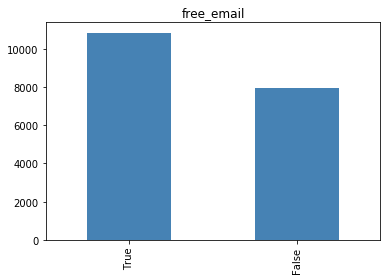

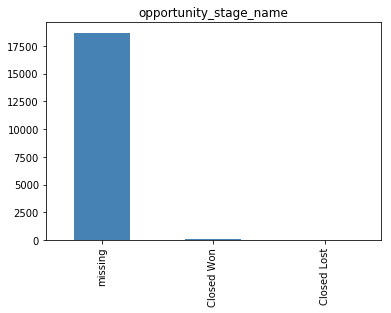

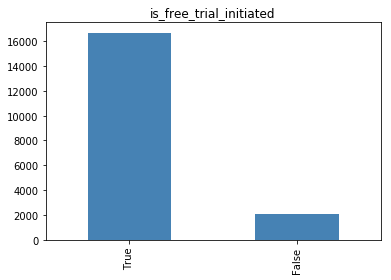

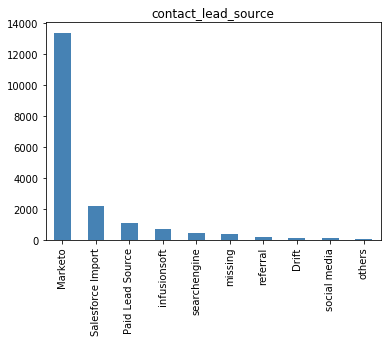

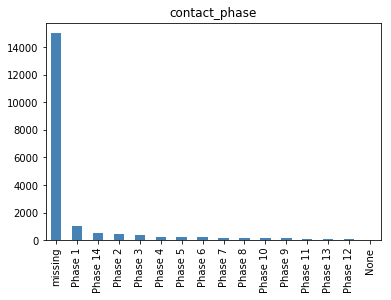

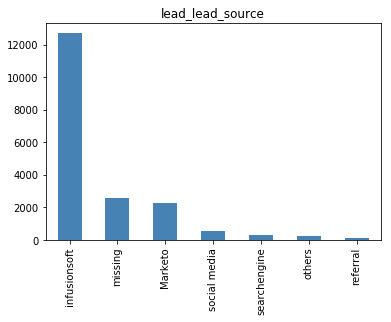

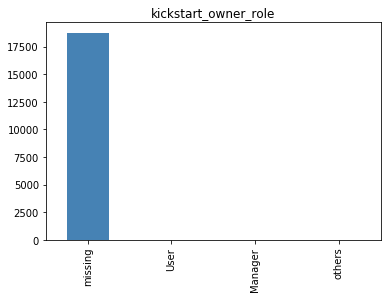

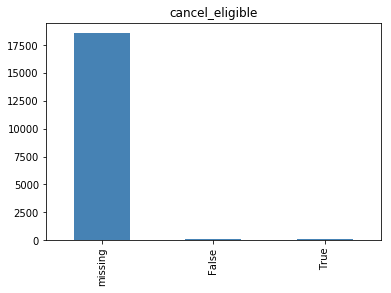

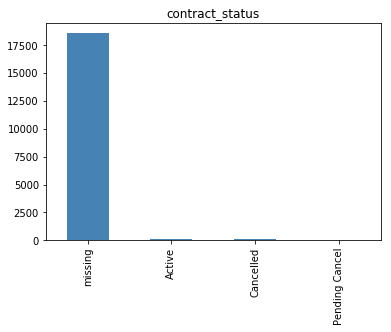

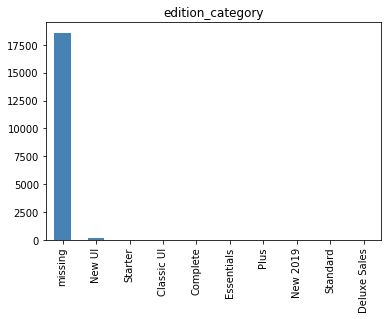

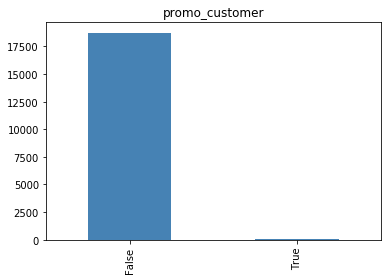

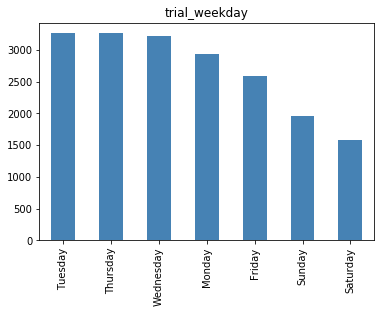

In [746]:
for attr in categorical:
    if attr not in ['appname']:
      plt.figure()
      X_train[attr].value_counts().plot(kind='bar', color='steelblue');
      plt.title(attr);

In [167]:
X_train.head()

free_email  CONTACTS_ADDED_AUTO  CONTACTS_ADDED_OTHER  CONTACTS_UPDATED  \
7892       False                  0.0              0.071429          0.142857   
15543       True                  0.0              0.142857          0.214286   
21525       True                  0.0              0.000000          0.142857   
16593       True                  0.0              0.071429          0.142857   
8544       False                  0.0              0.461538          0.384615   

       CONTACT_GROUP_COUNT  FLOW_RECIPIENT_COUNT  GOAL_ACHIEVED_COUNT  \
7892              0.357143                   0.0                  0.0   
15543             0.071429                   0.0                  0.0   
21525             0.071429                   0.0                  0.0   
16593             0.357143                   0.0                  0.0   
8544              0.230769                   0.0                  0.0   

       LOGIN_COUNT  NUMCONTACTSCLICKED_AUTO  NUMCONTACTSCLICKED_MANUAL  \
7892      0.071429                      0.0                        0.0   
15543     0.142857                      0.0                        0.0   
21525     0.071429                      0.0                        0.0   
16593     0.071429                      0.0                        0.0   
8544      0.230769                      0.0                        0.0   

           ...        ndays_second_login  ndays_firstcontact  \
7892       ...                       NaN                 0.0   
15543      ...                       NaN                 0.0   
21525      ...                       NaN                 NaN   
16593      ...                       NaN                 0.0   
8544       ...                       3.0                 0.0   

       ndays_lastcontacton  ndays_first_campaign_pub  ndays_last_campaign_pub  \
7892                   0.0                       NaN                      NaN   
15543                 10.0                       NaN                      NaN   
21525                  NaN                       NaN                      NaN   
16593                  0.0                       NaN                      NaN   
8544                   0.0                       NaN                      NaN   

       ndays_first_campaign_launch  ndays_last_campaign_launch  trial_qtr  \
7892                           NaN                         NaN          3   
15543                          NaN                         NaN          3   
21525                          NaN                         NaN          3   
16593                          NaN                         NaN          4   
8544                           NaN                         NaN          2   

       trial_weekday  ndays_intrial  
7892        Saturday             13  
15543         Monday             13  
21525      Wednesday             13  
16593      Wednesday             13  
8544         Tuesday             13  

[5 rows x 91 columns]

In [168]:
print("numeric--",numeric)
print("categorical----",categorical)

numeric-- ['CONTACTS_ADDED_AUTO' 'CONTACTS_ADDED_OTHER' 'CONTACTS_UPDATED'
 'CONTACT_GROUP_COUNT' 'FLOW_RECIPIENT_COUNT' 'GOAL_ACHIEVED_COUNT'
 'LOGIN_COUNT' 'NUMCONTACTSCLICKED_AUTO' 'NUMCONTACTSCLICKED_MANUAL'
 'NUMCONTACTSOPENED_AUTO' 'NUMCONTACTSOPENED_AUTO_SYSTEM'
 'NUMCONTACTSOPENED_MANUAL' 'NUMCONTACTSSENT_AUTO'
 'NUMCONTACTSSENT_AUTO_SYSTEM' 'NUMCONTACTSSENT_MANUAL'
 'NUMCONTACTS_RECEIVED' 'NUMEMAILSCLICKED_AUTO' 'NUMEMAILSCLICKED_MANUAL'
 'NUMEMAILSCLICKED_NULL' 'NUMEMAILSOPENED_AUTO'
 'NUMEMAILSOPENED_AUTO_SYSTEM' 'NUMEMAILSOPENED_MANUAL'
 'NUMEMAILSOPENED_NULL' 'NUMEMAILSSENT_AUTO' 'NUMEMAILSSENT_AUTO_SYSTEM'
 'NUMEMAILSSENT_MANUAL' 'NUMEMAILS_RECEIVED' 'NUM_CONTACTS'
 'PROCESSED_FLOW_ITEM_COUNT' 'SYSTEM_EMAIL_CLK_COUNT'
 'TOTAL_CONTACTS_ADDED_AUTO' 'TOTAL_CONTACTS_ADDED_OTHER' 'USER_LOGINS'
 'WEBFORM_COUNT' 'WEBFORM_NEW_CONTACTS' 'WEBFORM_NUM_FORMS'
 'WEBFORM_REFERRING_DOMAINS' 'WEB_ANALYTICS_NUM_PAGES'
 'WEB_ANALYTICS_NUM_PAGEVIEWS' 'WEB_ANALYTICS_TOTAL_VIEWS'
 'WEB_ANALYT

In [169]:
X_train[categorical] = X_train[categorical].fillna("missing")

In [170]:
X_train[numeric] =X_train[numeric].fillna(0)

In [171]:
def get_redundant_pairs(df):
    '''Get diagonal and lower triangular pairs of correlation matrix'''
    pairs_to_drop = set()
    cols = df.columns
    for i in range(0, df.shape[1]):
        for j in range(0, i+1):
            pairs_to_drop.add((cols[i], cols[j]))
    return pairs_to_drop

def get_top_abs_correlations(df, n):
    au_corr = df.corr().abs().unstack()
    labels_to_drop = get_redundant_pairs(df)
    au_corr = au_corr.drop(labels=labels_to_drop).sort_values(ascending=False)
    return au_corr[0:n]

print("Top Absolute Correlations")
print(get_top_abs_correlations(X_train[numeric], 10))

Top Absolute Correlations
WEB_ANALYTICS_NUM_PAGEVIEWS  WEB_ANALYTICS_TOTAL_VIEWS        0.999973
                             WEB_ANALYTICS_UNIQUE_VISITORS    0.999948
NUMEMAILSCLICKED_MANUAL      SYSTEM_EMAIL_CLK_COUNT           0.999922
WEB_ANALYTICS_TOTAL_VIEWS    WEB_ANALYTICS_UNIQUE_VISITORS    0.999905
WEB_ANALYTICS_NUM_PAGES      WEB_ANALYTICS_NUM_PAGEVIEWS      0.999852
                             WEB_ANALYTICS_TOTAL_VIEWS        0.999829
ndays_first_campaign_launch  ndays_last_campaign_launch       0.999770
WEB_ANALYTICS_NUM_PAGES      WEB_ANALYTICS_UNIQUE_VISITORS    0.999678
CONTACTS_ADDED_OTHER         CONTACTS_UPDATED                 0.999172
invoice_created              invoices_paid                    0.994591
dtype: float64


In [172]:
targetcorr={}
for each in numeric:
    targetcorr[each]=X_train[each].corr(y_train)
targetcorr 

{'CONTACTS_ADDED_AUTO': 0.04255080675905161,
 'CONTACTS_ADDED_OTHER': 0.0007847593597917319,
 'CONTACTS_UPDATED': 0.0002447336977591242,
 'CONTACT_GROUP_COUNT': 0.07357649195951395,
 'FLOW_RECIPIENT_COUNT': 0.01345127324692736,
 'GOAL_ACHIEVED_COUNT': 0.01393434836799426,
 'LOGIN_COUNT': 0.19504513247880823,
 'NUMCONTACTSCLICKED_AUTO': 0.023386256810626622,
 'NUMCONTACTSCLICKED_MANUAL': 0.00266808138735587,
 'NUMCONTACTSOPENED_AUTO': 0.022001892582196085,
 'NUMCONTACTSOPENED_AUTO_SYSTEM': -0.0026755098291721268,
 'NUMCONTACTSOPENED_MANUAL': 0.014626741739558791,
 'NUMCONTACTSSENT_AUTO': 0.009761706131763696,
 'NUMCONTACTSSENT_AUTO_SYSTEM': 0.14110035102927873,
 'NUMCONTACTSSENT_MANUAL': -0.0005524071628772102,
 'NUMCONTACTS_RECEIVED': -0.001596177815035248,
 'NUMEMAILSCLICKED_AUTO': 0.021834859737024204,
 'NUMEMAILSCLICKED_MANUAL': -0.0019745372311176924,
 'NUMEMAILSCLICKED_NULL': -0.0008146144430429922,
 'NUMEMAILSOPENED_AUTO': 0.022052550846655077,
 'NUMEMAILSOPENED_AUTO_SYSTEM': -0.

In [173]:
len(numeric)

79

In [143]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler(with_mean=True, with_std=True)
X_trainnumss = pd.DataFrame(ss.fit_transform(X_train[numeric]), columns=['ss_'+x for x in numeric],index=X_train.index)
X_trainnumss = pd.concat([X_train, X_trainnumss], axis=1)
X_trainnumss = X_trainnumss.drop(numeric, axis=1)
X_trainnumss.head()

/Users/shravanamee/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Users/shravanamee/anaconda3/lib/python3.6/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


free_email opportunity_stage_name opportunity_owner_name  \
7892       False                missing                missing   
15543       True                missing                missing   
21525       True                missing                missing   
16593       True                missing                missing   
8544       False                missing                missing   

      is_free_trial_initiated contact_lead_source contact_phase  \
7892                     True             Marketo       Phase 1   
15543                    True             Marketo       missing   
21525                    True             Marketo       missing   
16593                    True             Marketo       Phase 2   
8544                    False               Drift       missing   

      lead_lead_source kickstart_owner_role cancel_eligible contract_status  \
7892      infusionsoft              missing         missing         missing   
15543     infusionsoft              missing         missing         missing   
21525          missing              missing         missing         missing   
16593     infusionsoft              missing         missing         missing   
8544      infusionsoft              missing         missing         missing   

             ...        ss_ndays_first_login ss_ndays_second_login  \
7892         ...                   -0.000226             -0.013589   
15543        ...                   -0.000226             -0.013589   
21525        ...                   -0.000226             -0.013589   
16593        ...                   -0.000226             -0.013589   
8544         ...                   -0.000226              0.064465   

      ss_ndays_firstcontact  ss_ndays_lastcontacton  \
7892               0.008681               -0.119118   
15543              0.008681                0.200507   
21525              0.008681               -0.119118   
16593              0.008681               -0.119118   
8544               0.008681               -0.119118   

       ss_ndays_first_campaign_pub  ss_ndays_last_campaign_pub  \
7892                      0.016779                   -0.012163   
15543                     0.016779                   -0.012163   
21525                     0.016779                   -0.012163   
16593                     0.016779                   -0.012163   
8544                      0.016779                   -0.012163   

       ss_ndays_first_campaign_launch  ss_ndays_last_campaign_launch  \
7892                        -0.008122                      -0.007816   
15543                       -0.008122                      -0.007816   
21525                       -0.008122                      -0.007816   
16593                       -0.008122                      -0.007816   
8544                        -0.008122                      -0.007816   

       ss_trial_qtr  ss_ndays_intrial  
7892       0.049472          0.061917  
15543      0.049472          0.061917  
21525      0.049472          0.061917  
16593      1.119970          0.061917  
8544      -1.021027          0.061917  

[5 rows x 92 columns]

In [145]:
X_train = X_trainnumss

In [146]:
dtypes = pd.DataFrame(X_train.dtypes.rename('type')).reset_index().astype('str')

numeric = dtypes[(dtypes.type.isin(['int64', 'float64']))]['index'].values
categorical = dtypes[~(dtypes['index'].isin(numeric))]['index'].values

print("numeric--",numeric)
print("categorical----",categorical)

numeric-- ['ss_CONTACTS_ADDED_AUTO' 'ss_CONTACTS_ADDED_OTHER' 'ss_CONTACTS_UPDATED'
 'ss_CONTACT_GROUP_COUNT' 'ss_FLOW_RECIPIENT_COUNT'
 'ss_GOAL_ACHIEVED_COUNT' 'ss_LOGIN_COUNT' 'ss_NUMCONTACTSCLICKED_AUTO'
 'ss_NUMCONTACTSCLICKED_MANUAL' 'ss_NUMCONTACTSOPENED_AUTO'
 'ss_NUMCONTACTSOPENED_AUTO_SYSTEM' 'ss_NUMCONTACTSOPENED_MANUAL'
 'ss_NUMCONTACTSSENT_AUTO' 'ss_NUMCONTACTSSENT_AUTO_SYSTEM'
 'ss_NUMCONTACTSSENT_MANUAL' 'ss_NUMCONTACTS_RECEIVED'
 'ss_NUMEMAILSCLICKED_AUTO' 'ss_NUMEMAILSCLICKED_MANUAL'
 'ss_NUMEMAILSCLICKED_NULL' 'ss_NUMEMAILSOPENED_AUTO'
 'ss_NUMEMAILSOPENED_AUTO_SYSTEM' 'ss_NUMEMAILSOPENED_MANUAL'
 'ss_NUMEMAILSOPENED_NULL' 'ss_NUMEMAILSSENT_AUTO'
 'ss_NUMEMAILSSENT_AUTO_SYSTEM' 'ss_NUMEMAILSSENT_MANUAL'
 'ss_NUMEMAILS_RECEIVED' 'ss_NUM_CONTACTS' 'ss_PROCESSED_FLOW_ITEM_COUNT'
 'ss_SYSTEM_EMAIL_CLK_COUNT' 'ss_TOTAL_CONTACTS_ADDED_AUTO'
 'ss_TOTAL_CONTACTS_ADDED_OTHER' 'ss_USER_LOGINS' 'ss_WEBFORM_COUNT'
 'ss_WEBFORM_NEW_CONTACTS' 'ss_WEBFORM_NUM_FORMS'
 'ss_WEBFORM_REF

In [147]:
len(numeric)

79

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18]), <a list of 19 Text xticklabel objects>)

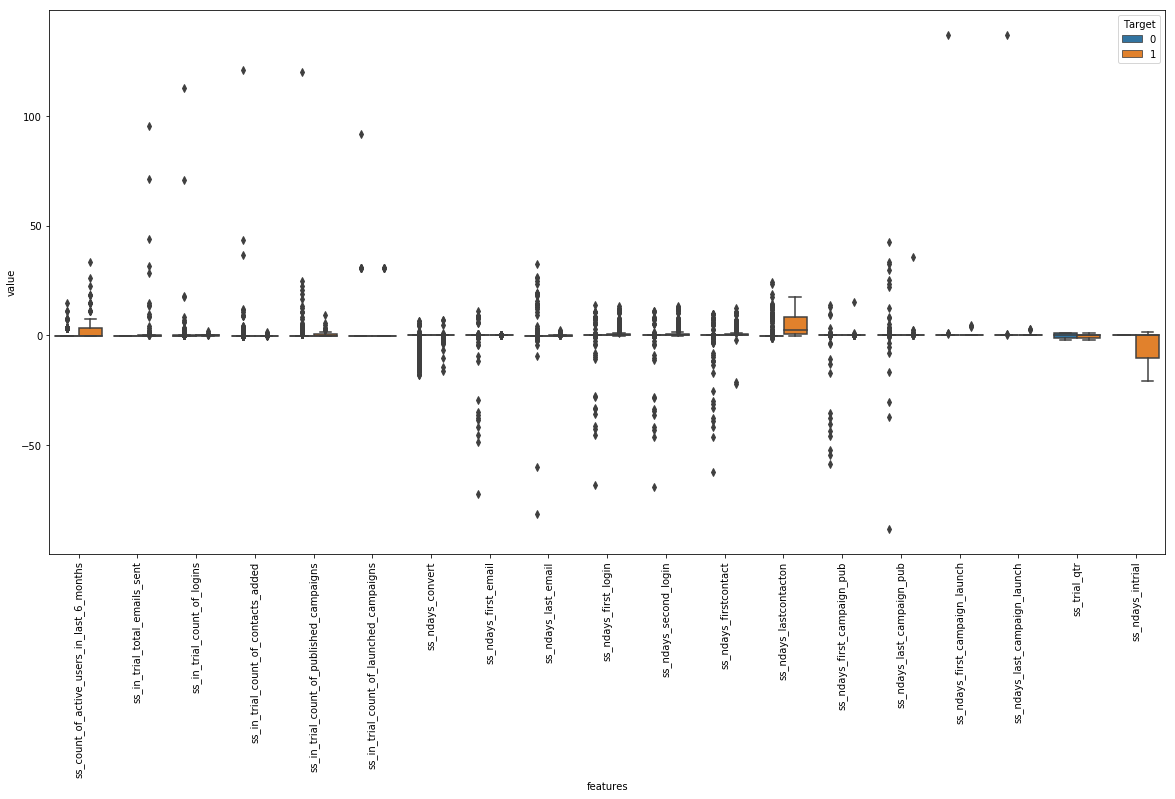

In [154]:
# third twenty features
data_dia = y_train
data = X_train[numeric]
data = pd.concat([data_dia,data.iloc[:,60:79]],axis=1)
data = pd.melt(data,id_vars="Target",
                    var_name="features",
                    value_name='value')
plt.figure(figsize=(20,10))
sns.boxplot(x="features", y="value", hue="Target", data=data)
plt.xticks(rotation=90)

/Users/shravanamee/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Users/shravanamee/anaconda3/lib/python3.6/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


free_email opportunity_stage_name is_free_trial_initiated  \
7892       False                missing                    True   
15543       True                missing                    True   
21525       True                missing                    True   
16593       True                missing                    True   
8544       False                missing                   False   

      contact_lead_source contact_phase lead_lead_source kickstart_owner_role  \
7892              Marketo       Phase 1     infusionsoft              missing   
15543             Marketo       missing     infusionsoft              missing   
21525             Marketo       missing          missing              missing   
16593             Marketo       Phase 2     infusionsoft              missing   
8544                Drift       missing     infusionsoft              missing   

      cancel_eligible contract_status edition_category        ...         \
7892          missing         missing          missing        ...          
15543         missing         missing          missing        ...          
21525         missing         missing          missing        ...          
16593         missing         missing          missing        ...          
8544          missing         missing          missing        ...          

      ss_ndays_first_login ss_ndays_second_login  ss_ndays_firstcontact  \
7892             -0.000226             -0.013589               0.008681   
15543            -0.000226             -0.013589               0.008681   
21525            -0.000226             -0.013589               0.008681   
16593            -0.000226             -0.013589               0.008681   
8544             -0.000226              0.064465               0.008681   

       ss_ndays_lastcontacton  ss_ndays_first_campaign_pub  \
7892                -0.119118                     0.016779   
15543                0.200507                     0.016779   
21525               -0.119118                     0.016779   
16593               -0.119118                     0.016779   
8544                -0.119118                     0.016779   

       ss_ndays_last_campaign_pub  ss_ndays_first_campaign_launch  \
7892                    -0.012163                       -0.008122   
15543                   -0.012163                       -0.008122   
21525                   -0.012163                       -0.008122   
16593                   -0.012163                       -0.008122   
8544                    -0.012163                       -0.008122   

       ss_ndays_last_campaign_launch  ss_trial_qtr  ss_ndays_intrial  
7892                       -0.007816      0.049472          0.061917  
15543                      -0.007816      0.049472          0.061917  
21525                      -0.007816      0.049472          0.061917  
16593                      -0.007816      1.119970          0.061917  
8544                       -0.007816     -1.021027          0.061917  

[5 rows x 91 columns]

In [755]:
X_train=X_trainnumss

In [427]:
#X_train.drop(droplist,axis=1,inplace=True)

In [756]:
X_train.shape

(18804, 91)

numeric-- ['ss_CONTACTS_ADDED_AUTO' 'ss_CONTACTS_ADDED_OTHER' 'ss_CONTACTS_UPDATED'
 'ss_CONTACT_GROUP_COUNT' 'ss_FLOW_RECIPIENT_COUNT'
 'ss_GOAL_ACHIEVED_COUNT' 'ss_LOGIN_COUNT' 'ss_NUMCONTACTSCLICKED_AUTO'
 'ss_NUMCONTACTSCLICKED_MANUAL' 'ss_NUMCONTACTSOPENED_AUTO'
 'ss_NUMCONTACTSOPENED_AUTO_SYSTEM' 'ss_NUMCONTACTSOPENED_MANUAL'
 'ss_NUMCONTACTSSENT_AUTO' 'ss_NUMCONTACTSSENT_AUTO_SYSTEM'
 'ss_NUMCONTACTSSENT_MANUAL' 'ss_NUMCONTACTS_RECEIVED'
 'ss_NUMEMAILSCLICKED_AUTO' 'ss_NUMEMAILSCLICKED_MANUAL'
 'ss_NUMEMAILSCLICKED_NULL' 'ss_NUMEMAILSOPENED_AUTO'
 'ss_NUMEMAILSOPENED_AUTO_SYSTEM' 'ss_NUMEMAILSOPENED_MANUAL'
 'ss_NUMEMAILSOPENED_NULL' 'ss_NUMEMAILSSENT_AUTO'
 'ss_NUMEMAILSSENT_AUTO_SYSTEM' 'ss_NUMEMAILSSENT_MANUAL'
 'ss_NUMEMAILS_RECEIVED' 'ss_NUM_CONTACTS' 'ss_PROCESSED_FLOW_ITEM_COUNT'
 'ss_SYSTEM_EMAIL_CLK_COUNT' 'ss_TOTAL_CONTACTS_ADDED_AUTO'
 'ss_TOTAL_CONTACTS_ADDED_OTHER' 'ss_USER_LOGINS' 'ss_WEBFORM_COUNT'
 'ss_WEBFORM_NEW_CONTACTS' 'ss_WEBFORM_NUM_FORMS'
 'ss_WEBFORM_REF

In [758]:
Xcat = pd.get_dummies(X_train[categorical], prefix_sep='_', drop_first=True) # dummy_na=True
X_train = pd.concat([X_train, Xcat], axis=1)
X_train = X_train.drop(categorical, axis=1)
X_train.head()

ss_CONTACTS_ADDED_AUTO  ss_CONTACTS_ADDED_OTHER  ss_CONTACTS_UPDATED  \
7892                -0.065666                -0.026514            -0.027092   
15543               -0.065666                -0.026288            -0.026867   
21525               -0.065666                -0.026739            -0.027092   
16593               -0.065666                -0.026514            -0.027092   
8544                -0.065666                -0.025281            -0.026330   

       ss_CONTACT_GROUP_COUNT  ss_FLOW_RECIPIENT_COUNT  \
7892                 0.073525                -0.025034   
15543               -0.241634                -0.025034   
21525               -0.241634                -0.025034   
16593                0.073525                -0.025034   
8544                -0.065872                -0.025034   

       ss_GOAL_ACHIEVED_COUNT  ss_LOGIN_COUNT  ss_NUMCONTACTSCLICKED_AUTO  \
7892                -0.018379       -0.275128                    -0.03574   
15543               -0.018379       -0.020408                    -0.03574   
21525               -0.018379       -0.275128                    -0.03574   
16593               -0.018379       -0.275128                    -0.03574   
8544                -0.018379        0.293093                    -0.03574   

       ss_NUMCONTACTSCLICKED_MANUAL  ss_NUMCONTACTSOPENED_AUTO  \
7892                      -0.049399                  -0.039766   
15543                     -0.049399                  -0.039766   
21525                     -0.049399                  -0.039766   
16593                     -0.049399                  -0.039766   
8544                      -0.049399                  -0.039766   

                ...             edition_category_Standard  \
7892            ...                                     0   
15543           ...                                     0   
21525           ...                                     0   
16593           ...                                     0   
8544            ...                                     0   

       edition_category_Starter  edition_category_missing  \
7892                          0                         1   
15543                         0                         1   
21525                         0                         1   
16593                         0                         1   
8544                          0                         1   

       promo_customer_False  trial_weekday_Monday  trial_weekday_Saturday  \
7892                      1                     0                       1   
15543                     1                     1                       0   
21525                     1                     0                       0   
16593                     1                     0                       0   
8544                      1                     0                       0   

       trial_weekday_Sunday  trial_weekday_Thursday  trial_weekday_Tuesday  \
7892                      0                       0                      0   
15543                     0                       0                      0   
21525                     0                       0                      0   
16593                     0                       0                      0   
8544                      0                       0                      1   

       trial_weekday_Wednesday  
7892                         0  
15543                        0  
21525                        1  
16593                        1  
8544                         0  

[5 rows x 137 columns]

In [759]:
X_train.dtypes.groupby(X_train.dtypes).size()

uint8      58
float64    79
dtype: int64

In [760]:
dtypes = pd.DataFrame(X_train.dtypes.rename('type')).reset_index().astype('str')

numeric = dtypes[(dtypes.type.isin(['int64', 'float64']))]['index'].values
categorical = dtypes[~(dtypes['index'].isin(numeric))]['index'].values

print("numeric--",numeric)
print("categorical----",categorical)

numeric-- ['ss_CONTACTS_ADDED_AUTO' 'ss_CONTACTS_ADDED_OTHER' 'ss_CONTACTS_UPDATED'
 'ss_CONTACT_GROUP_COUNT' 'ss_FLOW_RECIPIENT_COUNT'
 'ss_GOAL_ACHIEVED_COUNT' 'ss_LOGIN_COUNT' 'ss_NUMCONTACTSCLICKED_AUTO'
 'ss_NUMCONTACTSCLICKED_MANUAL' 'ss_NUMCONTACTSOPENED_AUTO'
 'ss_NUMCONTACTSOPENED_AUTO_SYSTEM' 'ss_NUMCONTACTSOPENED_MANUAL'
 'ss_NUMCONTACTSSENT_AUTO' 'ss_NUMCONTACTSSENT_AUTO_SYSTEM'
 'ss_NUMCONTACTSSENT_MANUAL' 'ss_NUMCONTACTS_RECEIVED'
 'ss_NUMEMAILSCLICKED_AUTO' 'ss_NUMEMAILSCLICKED_MANUAL'
 'ss_NUMEMAILSCLICKED_NULL' 'ss_NUMEMAILSOPENED_AUTO'
 'ss_NUMEMAILSOPENED_AUTO_SYSTEM' 'ss_NUMEMAILSOPENED_MANUAL'
 'ss_NUMEMAILSOPENED_NULL' 'ss_NUMEMAILSSENT_AUTO'
 'ss_NUMEMAILSSENT_AUTO_SYSTEM' 'ss_NUMEMAILSSENT_MANUAL'
 'ss_NUMEMAILS_RECEIVED' 'ss_NUM_CONTACTS' 'ss_PROCESSED_FLOW_ITEM_COUNT'
 'ss_SYSTEM_EMAIL_CLK_COUNT' 'ss_TOTAL_CONTACTS_ADDED_AUTO'
 'ss_TOTAL_CONTACTS_ADDED_OTHER' 'ss_USER_LOGINS' 'ss_WEBFORM_COUNT'
 'ss_WEBFORM_NEW_CONTACTS' 'ss_WEBFORM_NUM_FORMS'
 'ss_WEBFORM_REF

([<matplotlib.axis.YTick at 0x1a6a947d30>,
 <a list of 79 Text yticklabel objects>)

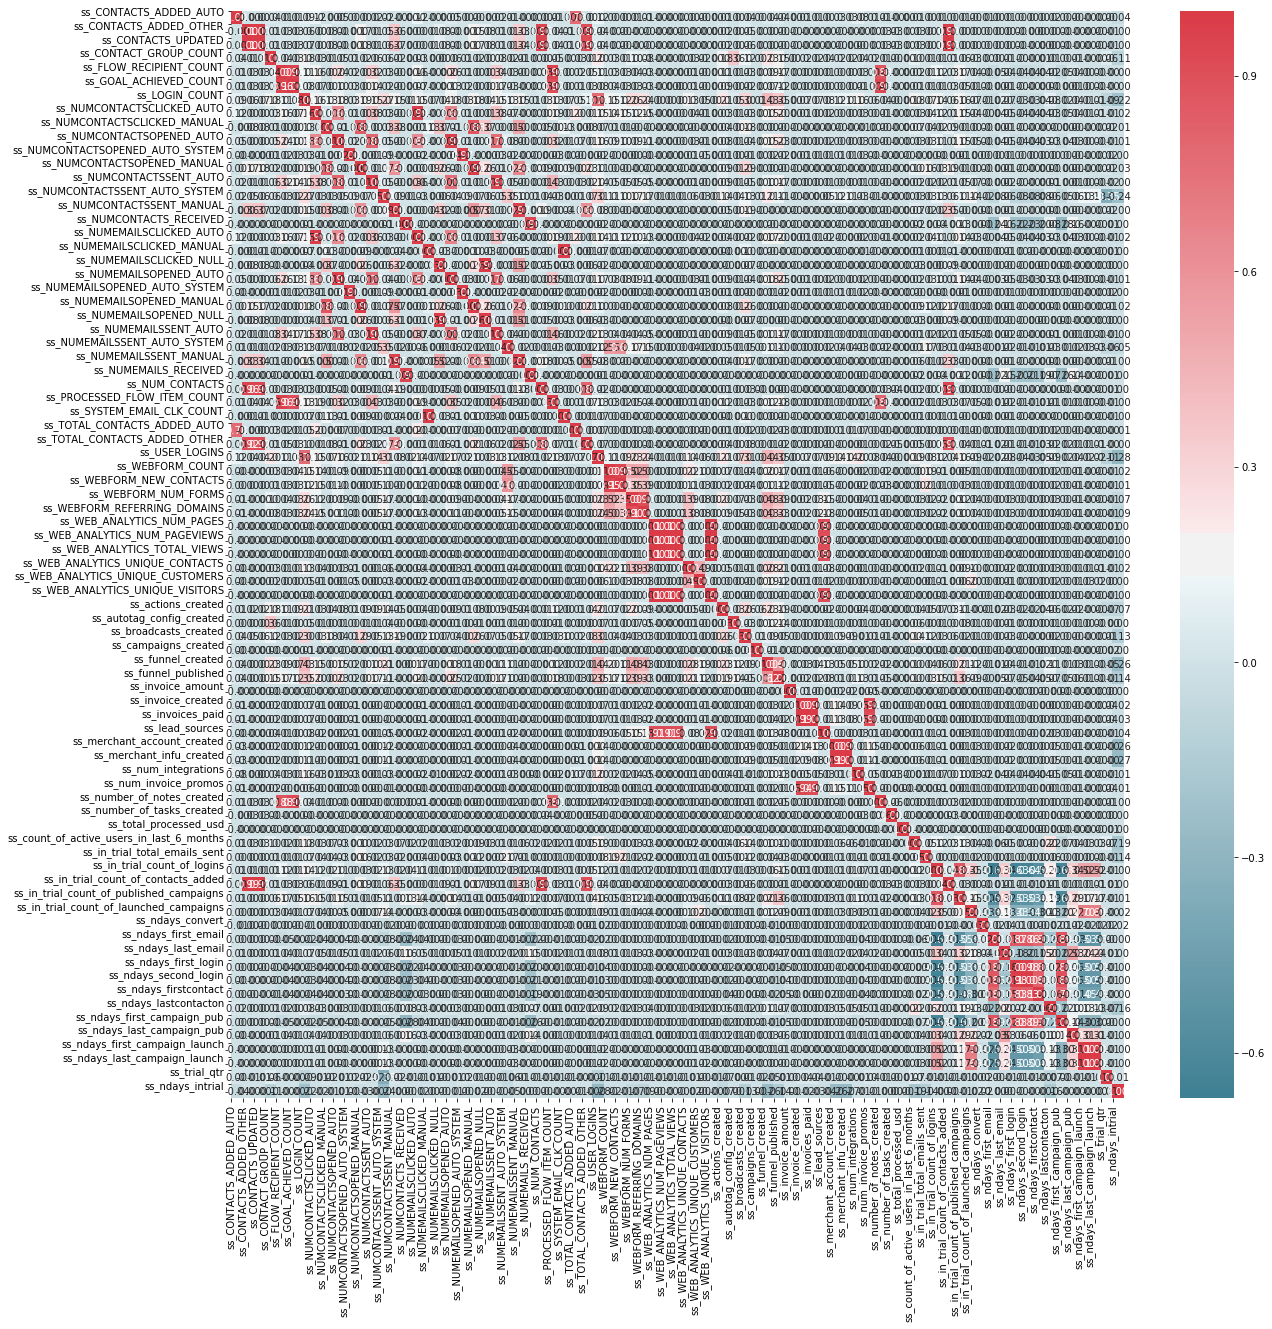

In [761]:
ncorr=X_train[numeric].corr()
import seaborn as sn

fig, ax = plt.subplots(figsize=(20, 20))
colormap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(ncorr,cmap=colormap, annot=True, fmt=".2f")
plt.xticks(range(len(ncorr.columns)), ncorr.columns)
plt.yticks(range(len(ncorr.columns)), ncorr.columns)

Top Absolute Correlations
contract_status_missing            edition_category_missing                    1.000000
cancel_eligible_missing            edition_category_missing                    1.000000
                                   contract_status_missing                     1.000000
ss_WEB_ANALYTICS_NUM_PAGEVIEWS     ss_WEB_ANALYTICS_TOTAL_VIEWS                0.999973
                                   ss_WEB_ANALYTICS_UNIQUE_VISITORS            0.999948
ss_NUMEMAILSCLICKED_MANUAL         ss_SYSTEM_EMAIL_CLK_COUNT                   0.999922
ss_WEB_ANALYTICS_TOTAL_VIEWS       ss_WEB_ANALYTICS_UNIQUE_VISITORS            0.999905
ss_WEB_ANALYTICS_NUM_PAGES         ss_WEB_ANALYTICS_NUM_PAGEVIEWS              0.999852
                                   ss_WEB_ANALYTICS_TOTAL_VIEWS                0.999829
ss_ndays_first_campaign_launch     ss_ndays_last_campaign_launch               0.999770
ss_WEB_ANALYTICS_NUM_PAGES         ss_WEB_ANALYTICS_UNIQUE_VISITORS            0.999678
ss_CON

{'ss_CONTACTS_ADDED_AUTO': 0.042550806759051533,
 'ss_CONTACTS_ADDED_OTHER': 0.000784759359791728,
 'ss_CONTACTS_UPDATED': 0.00024473369775912204,
 'ss_CONTACT_GROUP_COUNT': 0.07357649195951396,
 'ss_FLOW_RECIPIENT_COUNT': 0.013451273246927273,
 'ss_GOAL_ACHIEVED_COUNT': 0.013934348367994315,
 'ss_LOGIN_COUNT': 0.19504513247880884,
 'ss_NUMCONTACTSCLICKED_AUTO': 0.023386256810626668,
 'ss_NUMCONTACTSCLICKED_MANUAL': 0.002668081387355881,
 'ss_NUMCONTACTSOPENED_AUTO': 0.022001892582196307,
 'ss_NUMCONTACTSOPENED_AUTO_SYSTEM': -0.002675509829172128,
 'ss_NUMCONTACTSOPENED_MANUAL': 0.014626741739558894,
 'ss_NUMCONTACTSSENT_AUTO': 0.009761706131763628,
 'ss_NUMCONTACTSSENT_AUTO_SYSTEM': 0.141100351029279,
 'ss_NUMCONTACTSSENT_MANUAL': -0.0005524071628772249,
 'ss_NUMCONTACTS_RECEIVED': -0.0015961778150352485,
 'ss_NUMEMAILSCLICKED_AUTO': 0.0218348597370244,
 'ss_NUMEMAILSCLICKED_MANUAL': -0.0019745372311176933,
 'ss_NUMEMAILSCLICKED_NULL': -0.0008146144430429914,
 'ss_NUMEMAILSOPENED_AUTO

In [782]:
corrdf =get_top_abs_correlations(X_train, 60)

In [ ]:
finalfeatures=[]
for each 

In [514]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [679]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(X_train,y_train)

scores = pd.DataFrame(model.feature_importances_)
columns = pd.DataFrame(X_train.columns)

featureScores = pd.concat([columns,scores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(50,'Score'))  


# print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
# #plot graph of feature importances for better visualization
# feat_importances = pd.Series(model.feature_importances_, index=X_train.columns)
# feat_importances.nlargest(50).plot(kind='barh')
# plt.show()

                                        Specs     Score
120                   contract_status_missing  0.287173
117                   cancel_eligible_missing  0.218727
125                   edition_category_New UI  0.178353
129                  edition_category_missing  0.137528
118                 contract_status_Cancelled  0.038131
80          opportunity_stage_name_Closed Won  0.035916
130                      promo_customer_False  0.030281
128                  edition_category_Starter  0.019546
114              kickstart_owner_role_missing  0.005964
72                     ss_ndays_lastcontacton  0.005838
116                      cancel_eligible_True  0.003437
127                 edition_category_Standard  0.002618
69                       ss_ndays_first_login  0.002257
70                      ss_ndays_second_login  0.002103
64   ss_in_trial_count_of_published_campaigns  0.001912
126                     edition_category_Plus  0.001737
73                ss_ndays_first_campaign_pub  0

/Users/shravanamee/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [680]:
selectedfeatures_ETC= list(featureScores.Specs)
selectedfeatures_ETC

['ss_CONTACTS_ADDED_AUTO',
 'ss_CONTACTS_ADDED_OTHER',
 'ss_CONTACTS_UPDATED',
 'ss_CONTACT_GROUP_COUNT',
 'ss_FLOW_RECIPIENT_COUNT',
 'ss_GOAL_ACHIEVED_COUNT',
 'ss_LOGIN_COUNT',
 'ss_NUMCONTACTSCLICKED_AUTO',
 'ss_NUMCONTACTSCLICKED_MANUAL',
 'ss_NUMCONTACTSOPENED_AUTO',
 'ss_NUMCONTACTSOPENED_AUTO_SYSTEM',
 'ss_NUMCONTACTSOPENED_MANUAL',
 'ss_NUMCONTACTSSENT_AUTO',
 'ss_NUMCONTACTSSENT_AUTO_SYSTEM',
 'ss_NUMCONTACTSSENT_MANUAL',
 'ss_NUMCONTACTS_RECEIVED',
 'ss_NUMEMAILSCLICKED_AUTO',
 'ss_NUMEMAILSCLICKED_MANUAL',
 'ss_NUMEMAILSCLICKED_NULL',
 'ss_NUMEMAILSOPENED_AUTO',
 'ss_NUMEMAILSOPENED_AUTO_SYSTEM',
 'ss_NUMEMAILSOPENED_MANUAL',
 'ss_NUMEMAILSOPENED_NULL',
 'ss_NUMEMAILSSENT_AUTO',
 'ss_NUMEMAILSSENT_AUTO_SYSTEM',
 'ss_NUMEMAILSSENT_MANUAL',
 'ss_NUMEMAILS_RECEIVED',
 'ss_NUM_CONTACTS',
 'ss_PROCESSED_FLOW_ITEM_COUNT',
 'ss_SYSTEM_EMAIL_CLK_COUNT',
 'ss_TOTAL_CONTACTS_ADDED_AUTO',
 'ss_TOTAL_CONTACTS_ADDED_OTHER',
 'ss_USER_LOGINS',
 'ss_WEBFORM_COUNT',
 'ss_WEBFORM_NEW_CONTAC

In [772]:
import statsmodels.api as sm
logit_model=sm.Logit(y_train,X_train)
result=logit_model.fit(method='bfgs')
print(result.summary2())

         Current function value: 0.001060
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37
                                  Results: Logit
Model:                    Logit                  Pseudo R-squared:       0.983    
Dependent Variable:       Target                 AIC:                    305.8795 
Date:                     2019-02-21 17:42       BIC:                    1348.8422
No. Observations:         18804                  Log-Likelihood:         -19.940  
Df Model:                 132                    LL-Null:                -1197.3  
Df Residuals:             18671                  LLR p-value:            0.0000   
Converged:                0.0000                 Scale:                  1.0000   
----------------------------------------------------------------------------------
                                           Coef.  Std.Err.  z  P>|z| [0.025 0.975]
----------------------------------------------------------------------

/Users/shravanamee/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/Users/shravanamee/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/Users/shravanamee/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:877: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/Users/shravanamee/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:877: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/Users/shravanamee/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1831: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


In [685]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
# Feature extraction
model = LogisticRegression()
rfe = RFE(model, 50)
fit = rfe.fit(X_train, y_train)
print("Num Features: %s" % (fit.n_features_))
print("Selected Features: %s" % (fit.support_))
print("Feature Ranking: %s" % (fit.ranking_))

/Users/shravanamee/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/shravanamee/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/shravanamee/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/shravanamee/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/shravanamee/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default so

/Users/shravanamee/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/shravanamee/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/shravanamee/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/shravanamee/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/shravanamee/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default so

/Users/shravanamee/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/shravanamee/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/shravanamee/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/shravanamee/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/shravanamee/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default so

Num Features: 50
Selected Features: [False False False False False False False False False False False  True
 False  True False False False False False False False  True False False
 False False False False False False False False  True False False False
 False False False False False False False False False False False False
 False False False False  True  True False False  True False False False
  True  True  True False False False False False False  True  True  True
  True False False False False  True  True  True  True  True  True  True
  True  True False  True  True  True False False  True False False  True
 False False False  True False  True False  True False False  True False
 False  True  True False False  True  True False  True  True  True False
  True  True False  True  True  True  True  True  True  True False False
 False False  True  True False]
Feature Ranking: [48 49 19 30 74 25 34 44 10 66 14  1 56  1 13 42 45 53 85 43 38  1 81  9
 11 47 64 39 24 46 84 18  1 59 70 37 65

In [55]:
date_corr=X_train[newdatefeatures].corr()

([<matplotlib.axis.YTick at 0x1a28936278>,
 <a list of 13 Text yticklabel objects>)

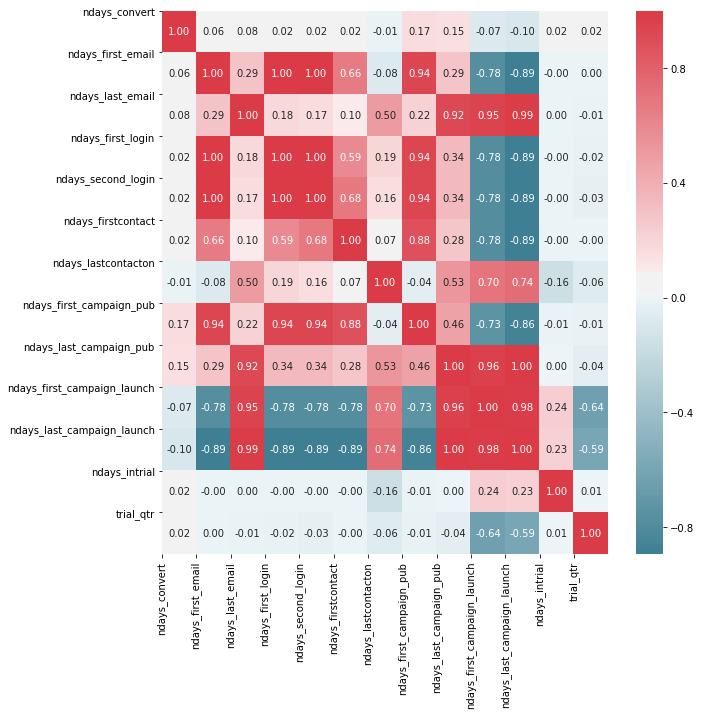

In [361]:
import seaborn as sn

fig, ax = plt.subplots(figsize=(10, 10))
colormap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(date_corr,cmap=colormap, annot=True, fmt=".2f")
plt.xticks(range(len(date_corr.columns)), date_corr.columns)
plt.yticks(range(len(date_corr.columns)), date_corr.columns)

([<matplotlib.axis.YTick at 0x1a28f8b240>,
 <a list of 9 Text yticklabel objects>)

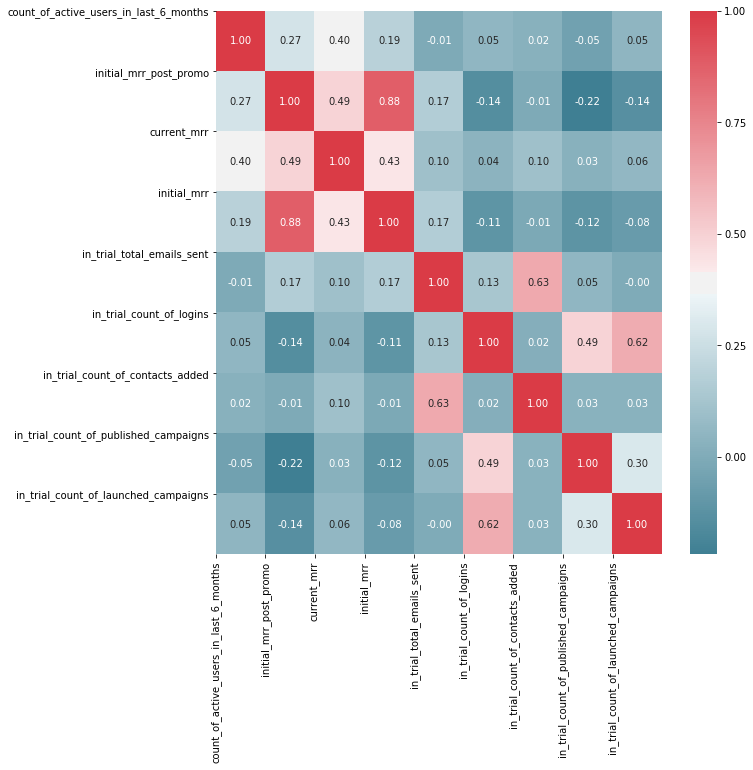

In [363]:
nu_corr=X_train[nufeatures].corr()

fig, ax = plt.subplots(figsize=(10, 10))
colormap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(nu_corr,cmap=colormap, annot=True, fmt=".2f")
plt.xticks(range(len(nu_corr.columns)), nu_corr.columns)
plt.yticks(range(len(nu_corr.columns)), nu_corr.columns)

In [364]:
X_train.drop(['initial_mrr_post_promo','current_mrr','initial_mrr'],axis=1,inplace=True)

In [365]:
newnufeatures = ['count_of_active_users_in_last_6_months','in_trial_total_emails_sent',
              'in_trial_count_of_logins','in_trial_count_of_contacts_added','in_trial_count_of_published_campaigns','in_trial_count_of_launched_campaigns']

([<matplotlib.axis.YTick at 0x1a282cbf60>,
 <a list of 6 Text yticklabel objects>)

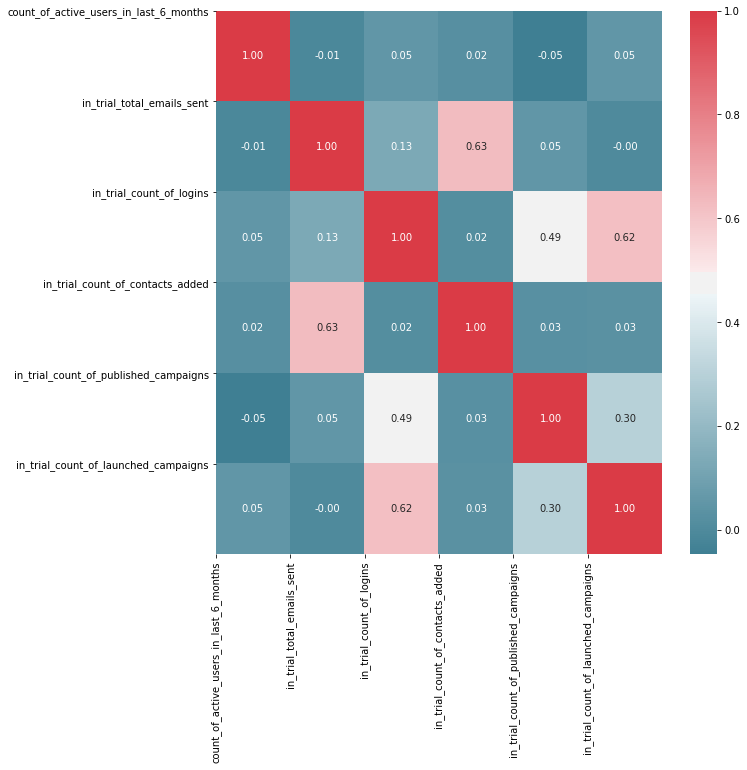

In [366]:
nu_corr=X_train[newnufeatures].corr()

fig, ax = plt.subplots(figsize=(10, 10))
colormap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(nu_corr,cmap=colormap, annot=True, fmt=".2f")
plt.xticks(range(len(nu_corr.columns)), nu_corr.columns)
plt.yticks(range(len(nu_corr.columns)), nu_corr.columns)

In [ ]:
X_train.head()

In [368]:
numericfeatures = newnufeatures+newdatefeatures+newcatfreatures
numericfeatures


['count_of_active_users_in_last_6_months',
 'in_trial_total_emails_sent',
 'in_trial_count_of_logins',
 'in_trial_count_of_contacts_added',
 'in_trial_count_of_published_campaigns',
 'in_trial_count_of_launched_campaigns',
 'ndays_convert',
 'ndays_first_email',
 'ndays_last_email',
 'ndays_first_login',
 'ndays_second_login',
 'ndays_firstcontact',
 'ndays_lastcontacton',
 'ndays_first_campaign_pub',
 'ndays_last_campaign_pub',
 'ndays_first_campaign_launch',
 'ndays_last_campaign_launch',
 'trial_weekday',
 'ndays_intrial',
 'trial_qtr',
 'opportunity_stage_name',
 'is_free_trial_initiated',
 'contact_lead_source',
 'contact_phase',
 'lead_lead_source',
 'kickstart_owner_role',
 'cancel_eligible',
 'contract_status',
 'edition_category',
 'promo_customer']

([<matplotlib.axis.YTick at 0x1a3b07e400>,
 <a list of 20 Text yticklabel objects>)

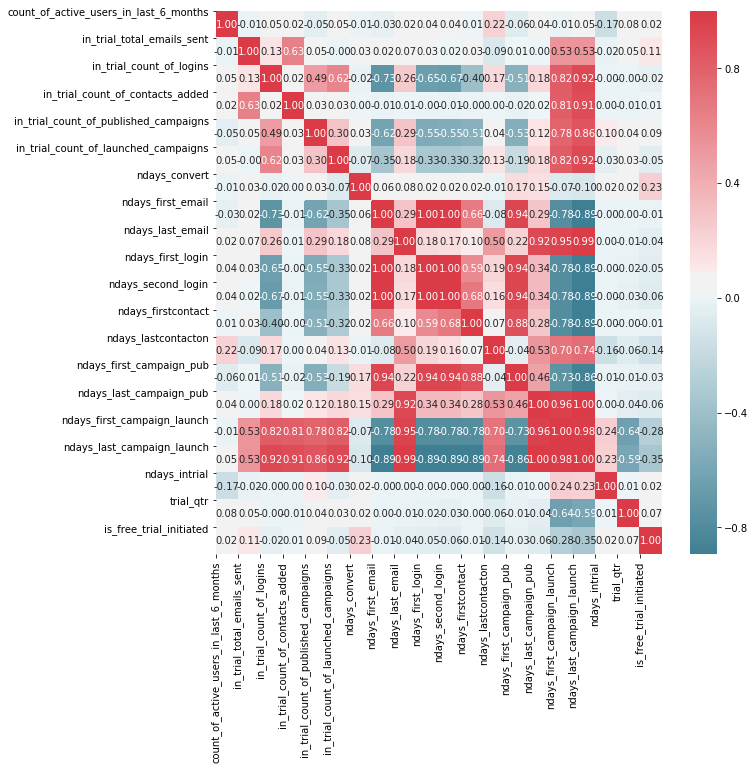

In [370]:
fnu_corr=X_train[numericfeatures].corr()

fig, ax = plt.subplots(figsize=(10, 10))
colormap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(fnu_corr,cmap=colormap, annot=True, fmt=".2f")
plt.xticks(range(len(fnu_corr.columns)), fnu_corr.columns)
plt.yticks(range(len(fnu_corr.columns)), fnu_corr.columns)